### Импортируем нужные для исследования библиотеки

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from bs4 import BeautifulSoup as bs
import requests

In [2]:
#base = 'https://github.com'
#url = 'https://github.com/owid'
#pages = requests.get(url)
#soup = bs(pages.text, 'lxml')
#soup

In [3]:
#link1 = base + soup.find('a', class_= 'mr-1 text-bold wb-break-word').get('href')
#link1

In [4]:
#pages = requests.get(link1)
#soup = bs(pages.text, 'lxml')
#soup

In [5]:
#link2 = base + soup.find('a', class_= 'js-navigation-open Link--primary',title = 'public').get('href')
#link2

In [6]:
#pages = requests.get(link2)
#soup = bs(pages.text, 'lxml')
#soup

In [7]:
#link3 = base + soup.find('a', class_= 'js-navigation-open Link--primary',title = 'data').get('href')
#link3

In [8]:
#pages = requests.get(link3)
#soup = bs(pages.text, 'lxml')
#soup

In [9]:
#link4 = base + soup.find('a', class_= 'js-navigation-open Link--primary',title = 'owid-covid-data.csv').get('href')
#link4

In [10]:
#pages = requests.get(link4)
#soup = bs(pages.text, 'lxml')
#soup

In [11]:
#for a in soup.find_all('a'):
#    if a.text == 'View raw':
#        link_end = base + a.get('href')

In [12]:
#link_end

# 1.1

### Читаем датасет с файла потому что на сайто-парсинг не хватило

## Вопрос 1 Где брать эти дополнительные данные в 1.1

In [13]:
df = pd.read_csv(r"C:\Users\USER\Desktop\datasets\owid-covid-data.csv",sep = ',').drop_duplicates() #Сразу выбрасываем дубликаты если есть
df #Проверяем загрузку датафрейма

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
229440      ZWE    Africa     Zimbabwe  2022-10-18     257893.0        0.0   
229441      ZWE    Africa     Zimbabwe  2022-10-19     257893.0        0.0   
229442      ZWE    Africa     Zimbabwe  2022-10-20     257893.0        0.0   
229443      ZWE    Africa     Zimbabwe  2022-10-21     257893.0        0.0   
229444      ZWE    Africa     Zimbabwe  2022-10-22     257893.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
229440              20.571        5606.0         0.0                0.286   
229441              13.571        5606.0         0.0                0.286   
229442               9.429        5606.0         0.0                0.143   
229443               9.429        5606.0         0.0                0.143   
229444               9.429        5606.0         0.0                0.143   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
229440  ...          30.7                  36.791                         1.7   
229441  ...          30.7                  36.791                         1.7   
229442  ...          30.7                  36.791                         1.7   
229443  ...          30.7                  36.791                         1.7   
229444  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  40099462.0   
1                 64.83                    0.511  40099462.0   
2                 64.83                    0.511  40099462.0   
3                 64.83                    0.511  40099462.0   
4                 64.83                    0.511  40099462.0   
...                 ...                      ...         ...   
229440            61.49                    0.571  15993524.0   
229441            61.49                    0.571  15993524.0   
229442            61.49                    0.571  15993524.0   
229443            61.49                    0.571  15993524.0   
229444            61.49                    0.571  15993524.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

# 1.2

### Делаем начальную проверку-просмотр на выбросы и nan значения

In [14]:
df.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.164590e+05  2.161760e+05        2.149800e+05  1.972670e+05   
mean   4.426263e+06  1.237994e+04        1.241878e+04  7.391781e+04   
std    2.767156e+07  8.533597e+04        8.339994e+04  3.801487e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    4.321000e+03  0.000000e+00        6.000000e+00  1.130000e+02   
50%    4.881000e+04  5.400000e+01        9.428600e+01  1.173000e+03   
75%    5.199745e+05  9.580000e+02        1.127857e+03  9.747000e+03   
max    6.273766e+08  4.081955e+06        3.436024e+06  6.577749e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  197198.000000        196018.000000            215470.000000   
mean      138.524240           139.205442             60019.985785   
std       730.406482           715.991391            106382.513384   
min         0.000000             0.000000                 0.001000   
25%         0.000000             0.000000              1086.070750   
50%         1.000000             1.571000             10303.296500   
75%        14.000000            15.714000             72424.344750   
max     17731.000000         14857.714000            665504.845000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count          215187.000000                   213996.000000   
mean              188.988604                      189.509797   
std              1050.134334                      667.034437   
min                 0.000000                        0.000000   
25%                 0.000000                        1.335000   
50%                 7.526000                       19.276500   
75%                97.052000                      135.609500   
max            195005.313000                    36401.607000   

       total_deaths_per_million  ...   male_smokers  handwashing_facilities  \
count             196291.000000  ...  138113.000000            91054.000000   
mean                 689.931225  ...      32.810126               50.925888   
std                  975.400348  ...      13.534874               31.881420   
min                    0.000000  ...       7.700000                1.188000   
25%                   29.353000  ...      21.600000               20.859000   
50%                  212.786000  ...      31.400000               49.839000   
75%                 1021.930000  ...      41.300000               83.241000   
max                 6432.566000  ...      78.100000              100.000000   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
count               164624.000000    210861.000000            180434.000000   
mean                     3.088982        73.617717                 0.724794   
std                      2.552267         7.446281                 0.149609   
min                      0.100000        53.280000                 0.394000   
25%                      1.300000        69.500000                 0.602000   
50%                      2.500000        75.050000                 0.742000   
75%                      4.200000        79.070000                 0.845000   
max                     13.800000        86.750000                 0.957000   

         population  excess_mortality_cumulative_absolute  \
count  2.284560e+05                          7.686000e+03   
mean   1.399608e+08                          4.785388e+04   
std    6.876120e+08                          1.325075e+05   
min    4.700000e+01                         -3.772610e+04   
25%    8.960070e+05                          3.152500e+01   
50%    6.885868e+06                          5.874900e+03   
75%    3.298164e+07                          3.451410e+04   
max    7.909295e+09                          1.224011e+06   

       excess_mortality_cumulative  excess_mortality  \
count                  7686.000000        7736.00000   
mean                      9.876106          14.34651   
std               

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229445 entries, 0 to 229444
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    229445 non-null  object 
 1   continent                                   216486 non-null  object 
 2   location                                    229445 non-null  object 
 3   date                                        229445 non-null  object 
 4   total_cases                                 216459 non-null  float64
 5   new_cases                                   216176 non-null  float64
 6   new_cases_smoothed                          214980 non-null  float64
 7   total_deaths                                197267 non-null  float64
 8   new_deaths                                  197198 non-null  float64
 9   new_deaths_smoothed                         196018 non-null  float64
 

<AxesSubplot:>

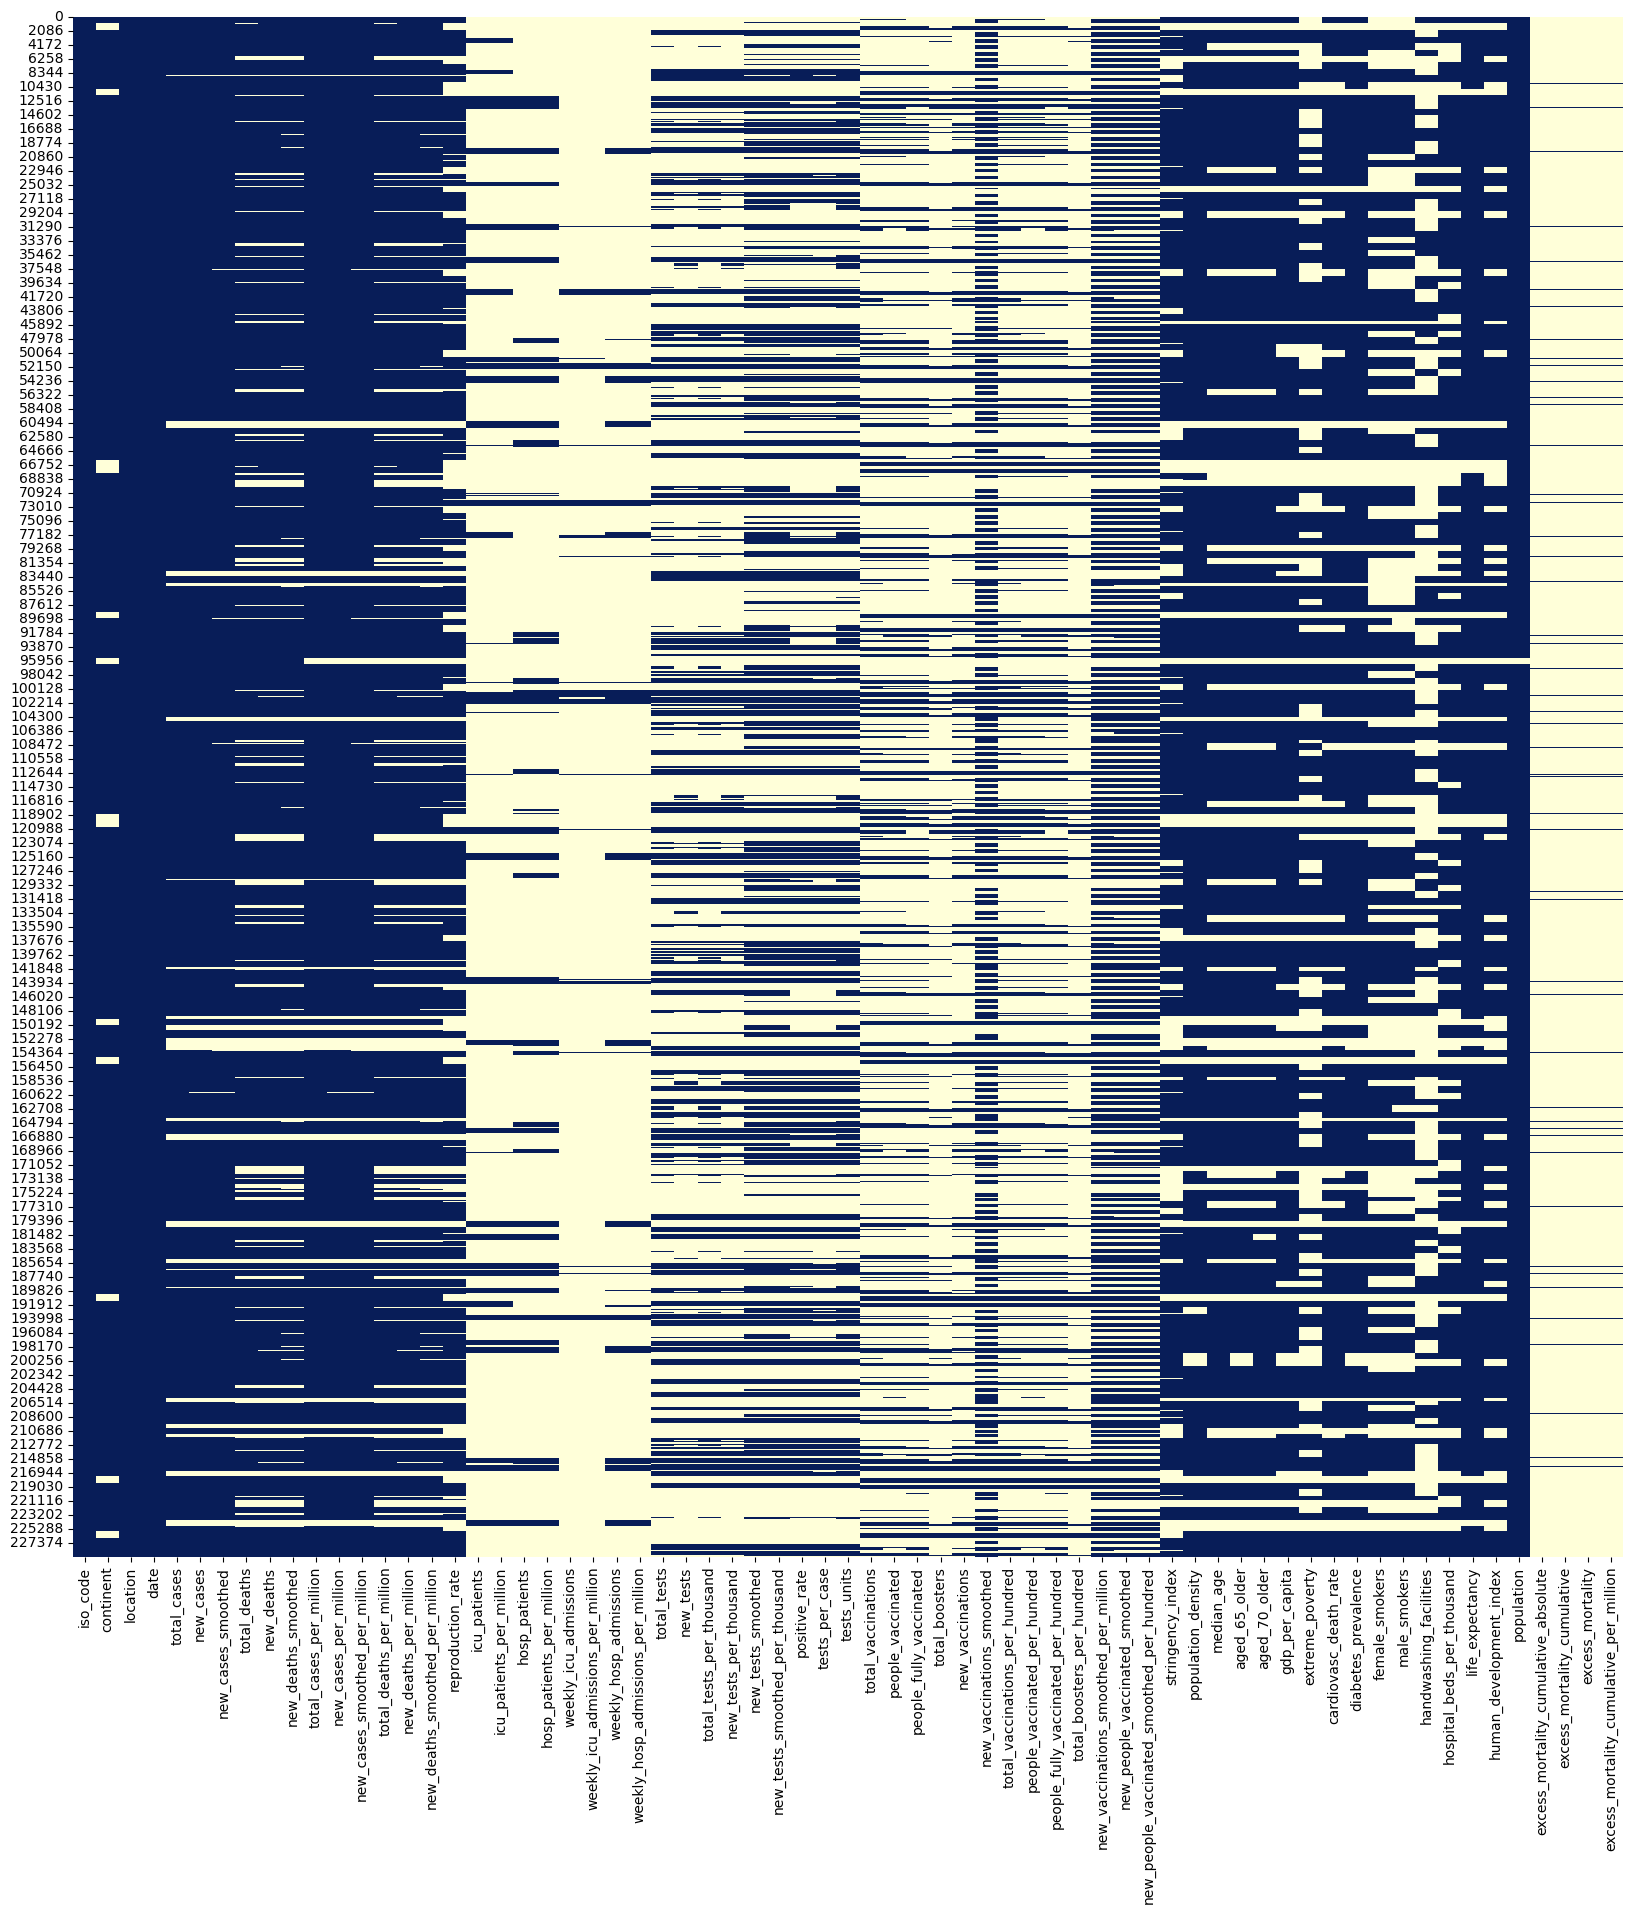

In [16]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

### Сразу видим что есть колонки которые больше чем на половину не заполнены

Их сразу можно удалить через цикл с фильтром, т.к. nan значения в них будут только мешать

In [17]:
for col in df.columns:
    if df[col].isna().sum() >= len(df[col])//2:
        df.drop(columns = col, inplace = True)

In [18]:
df.shape

(229445, 36)

<AxesSubplot:>

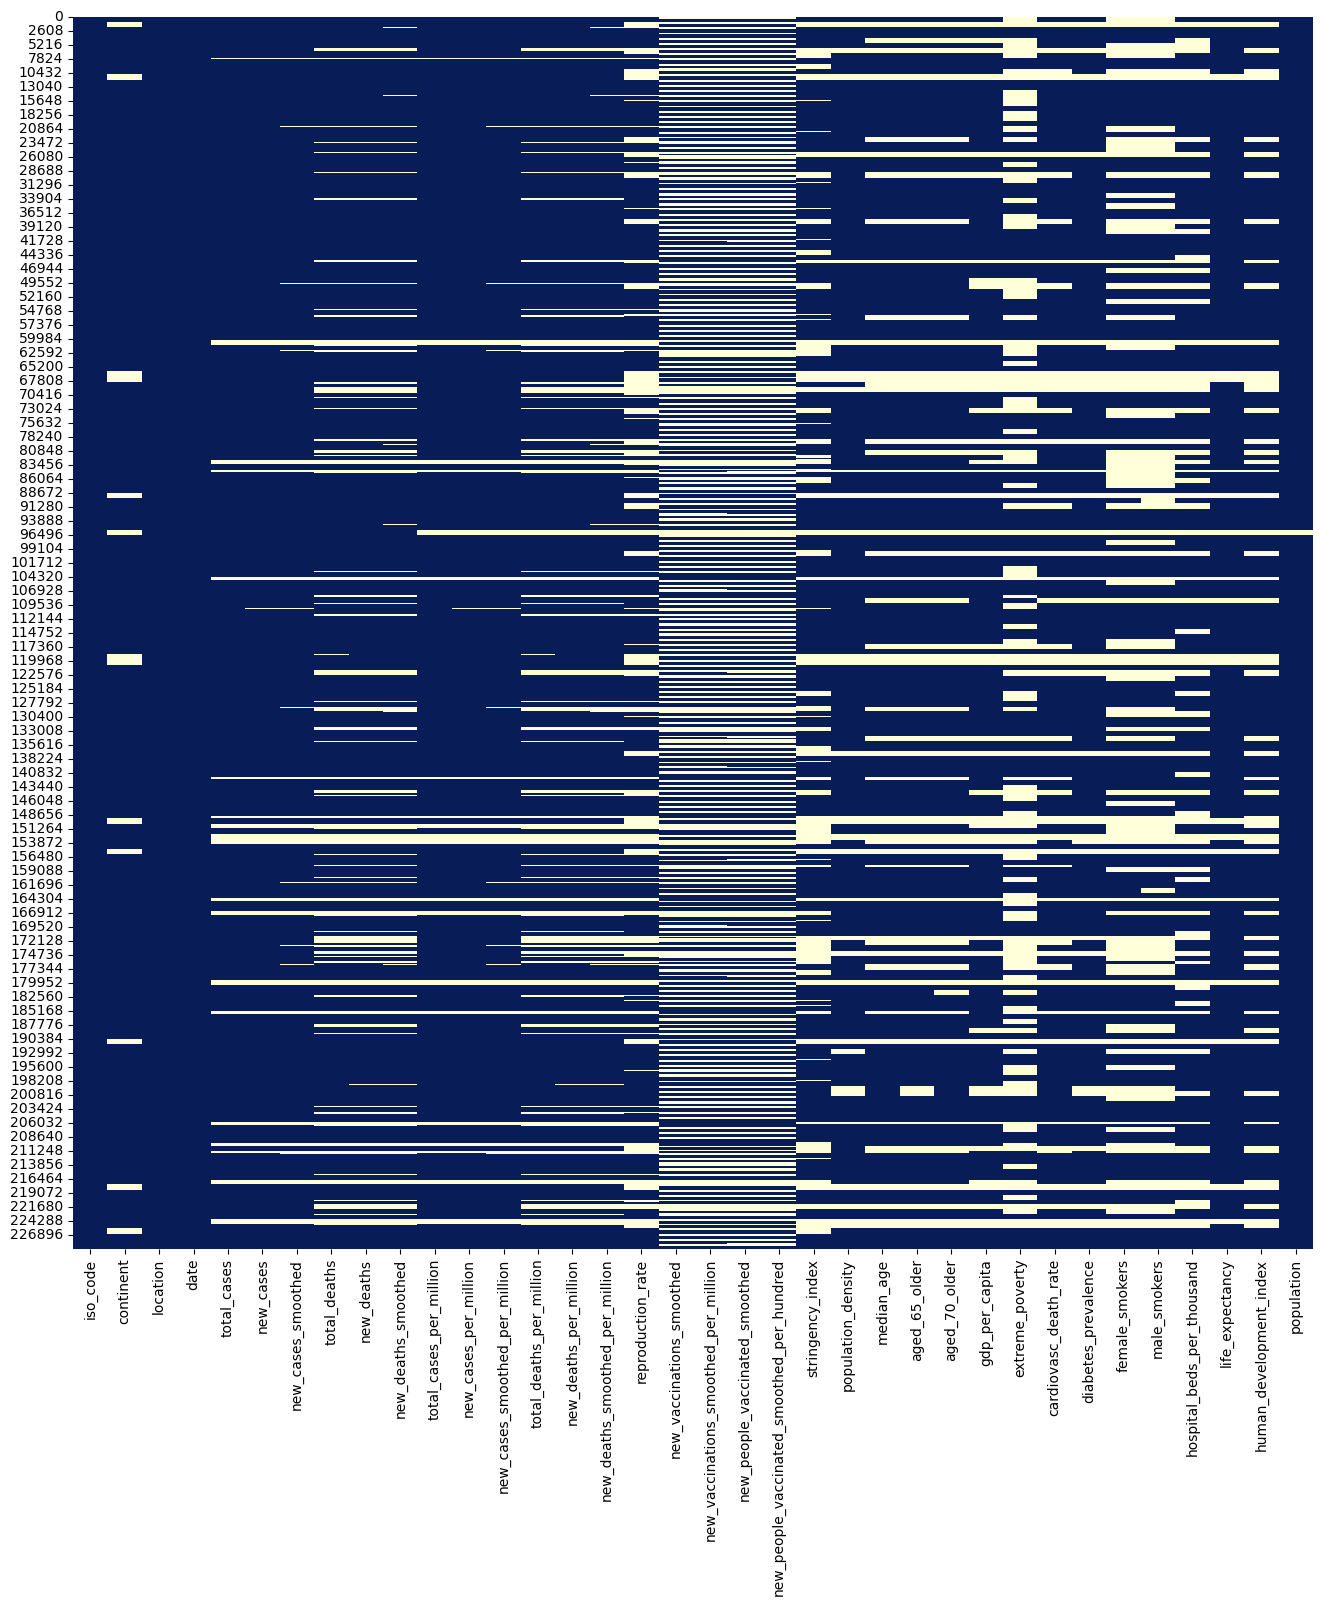

In [19]:
plt.figure(figsize = (16,16))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [20]:
df.reset_index(drop=True,inplace = True)

In [21]:
df_copy = df.copy(deep=True)

In [22]:
df_copy['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswat

In [23]:
df_copy['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

### Видим, что строчки континента не заполнены и по датафрейму смотрим что в тех самых строчках без континента колонка location и есть continent

Перезаписываем из одной строки в другую, чтобы не было nan значений

In [24]:
df_copy['continent'][df_copy['continent'].isnull()] = df_copy['location'][df_copy['continent'].isnull()]

In [25]:
df_copy['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'North America', 'South America',
       'Oceania', 'European Union', 'High income', 'International',
       'Low income', 'Lower middle income', 'Upper middle income',
       'World'], dtype=object)

Попутно удаляем странные строки записавшиеся в continent

In [26]:
df_copy.drop(index = df_copy[df_copy['continent'] == 'High income'].index.tolist(),axis = 0, inplace = True)
df_copy.drop(index = df_copy[df_copy['continent'] == 'Low income'].index.tolist(),axis = 0, inplace = True)
df_copy.drop(index = df_copy[df_copy['continent'] == 'Lower middle income'].index.tolist(),axis = 0, inplace = True)
df_copy.drop(index = df_copy[df_copy['continent'] == 'Upper middle income'].index.tolist(),axis = 0, inplace = True)
df_copy['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'North America', 'South America',
       'Oceania', 'European Union', 'International', 'World'],
      dtype=object)

При этом я считаю, что такие строки continent со значением World не нужны ведь по заданию мы должны будем составить уровни опастности для туриста в определённых странах а не в мире полностью, кроме того такие строки делают огромные выбросы 

In [27]:
df_copy.drop(index = df_copy[df_copy['continent'] == 'World'].index.tolist(),axis = 0, inplace = True)
df_copy.drop(index = df_copy[df_copy['continent'] == 'International'].index.tolist(),axis = 0, inplace = True)
df_copy.drop(index = df_copy[df_copy['continent'] == 'European Union'].index.tolist(),axis = 0, inplace = True)

In [28]:
df_copy.shape

(222459, 36)

In [29]:
df_copy['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'North America', 'South America',
       'Oceania'], dtype=object)

<AxesSubplot:>

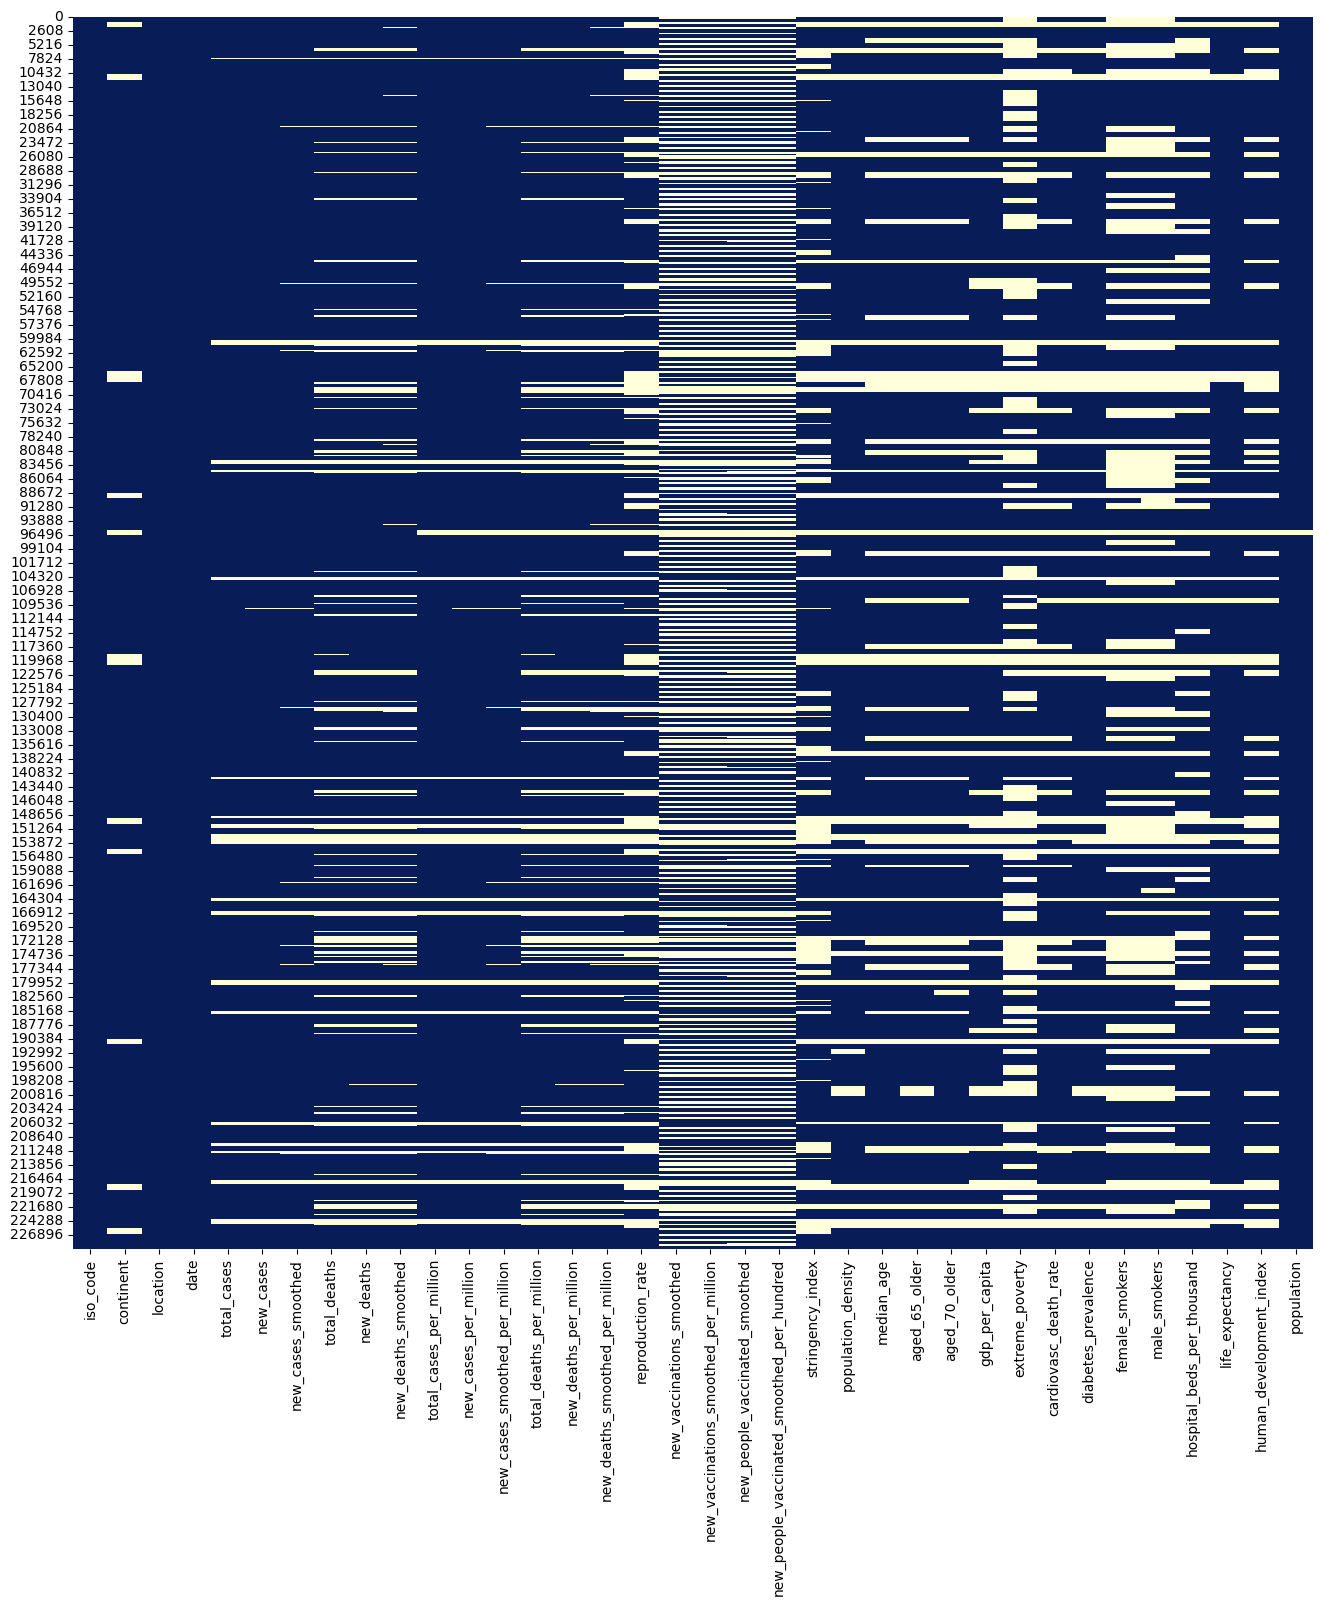

In [30]:
plt.figure(figsize = (16,16))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [31]:
df_copy.reset_index(drop = True,inplace = True)

In [32]:
df_copy

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
222454      ZWE    Africa     Zimbabwe  2022-10-18     257893.0        0.0   
222455      ZWE    Africa     Zimbabwe  2022-10-19     257893.0        0.0   
222456      ZWE    Africa     Zimbabwe  2022-10-20     257893.0        0.0   
222457      ZWE    Africa     Zimbabwe  2022-10-21     257893.0        0.0   
222458      ZWE    Africa     Zimbabwe  2022-10-22     257893.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
222454              20.571        5606.0         0.0                0.286   
222455              13.571        5606.0         0.0                0.286   
222456               9.429        5606.0         0.0                0.143   
222457               9.429        5606.0         0.0                0.143   
222458               9.429        5606.0         0.0                0.143   

        ...  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0       ...        1803.987              NaN                597.029   
1       ...        1803.987              NaN                597.029   
2       ...        1803.987              NaN                597.029   
3       ...        1803.987              NaN                597.029   
4       ...        1803.987              NaN                597.029   
...     ...             ...              ...                    ...   
222454  ...        1899.775             21.4                307.846   
222455  ...        1899.775             21.4                307.846   
222456  ...        1899.775             21.4                307.846   
222457  ...        1899.775             21.4                307.846   
222458  ...        1899.775             21.4                307.846   

        diabetes_prevalence  female_smokers  male_smokers  \
0                      9.59             NaN           NaN   
1                      9.59             NaN           NaN   
2                      9.59             NaN           NaN   
3                      9.59             NaN           NaN   
4                      9.59             NaN           NaN   
...                     ...             ...           ...   
222454                 1.82             1.6          30.7   
222455                 1.82             1.6          30.7   
222456                 1.82             1.6          30.7   
222457                 1.82             1.6          30.7   
222458                 1.82             1.6          30.7   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83                    0.511   
...                            ...              ...                      ...   

Просматриваем колонки и делаем окончательные выводы убирать ли их или нет

<AxesSubplot:>

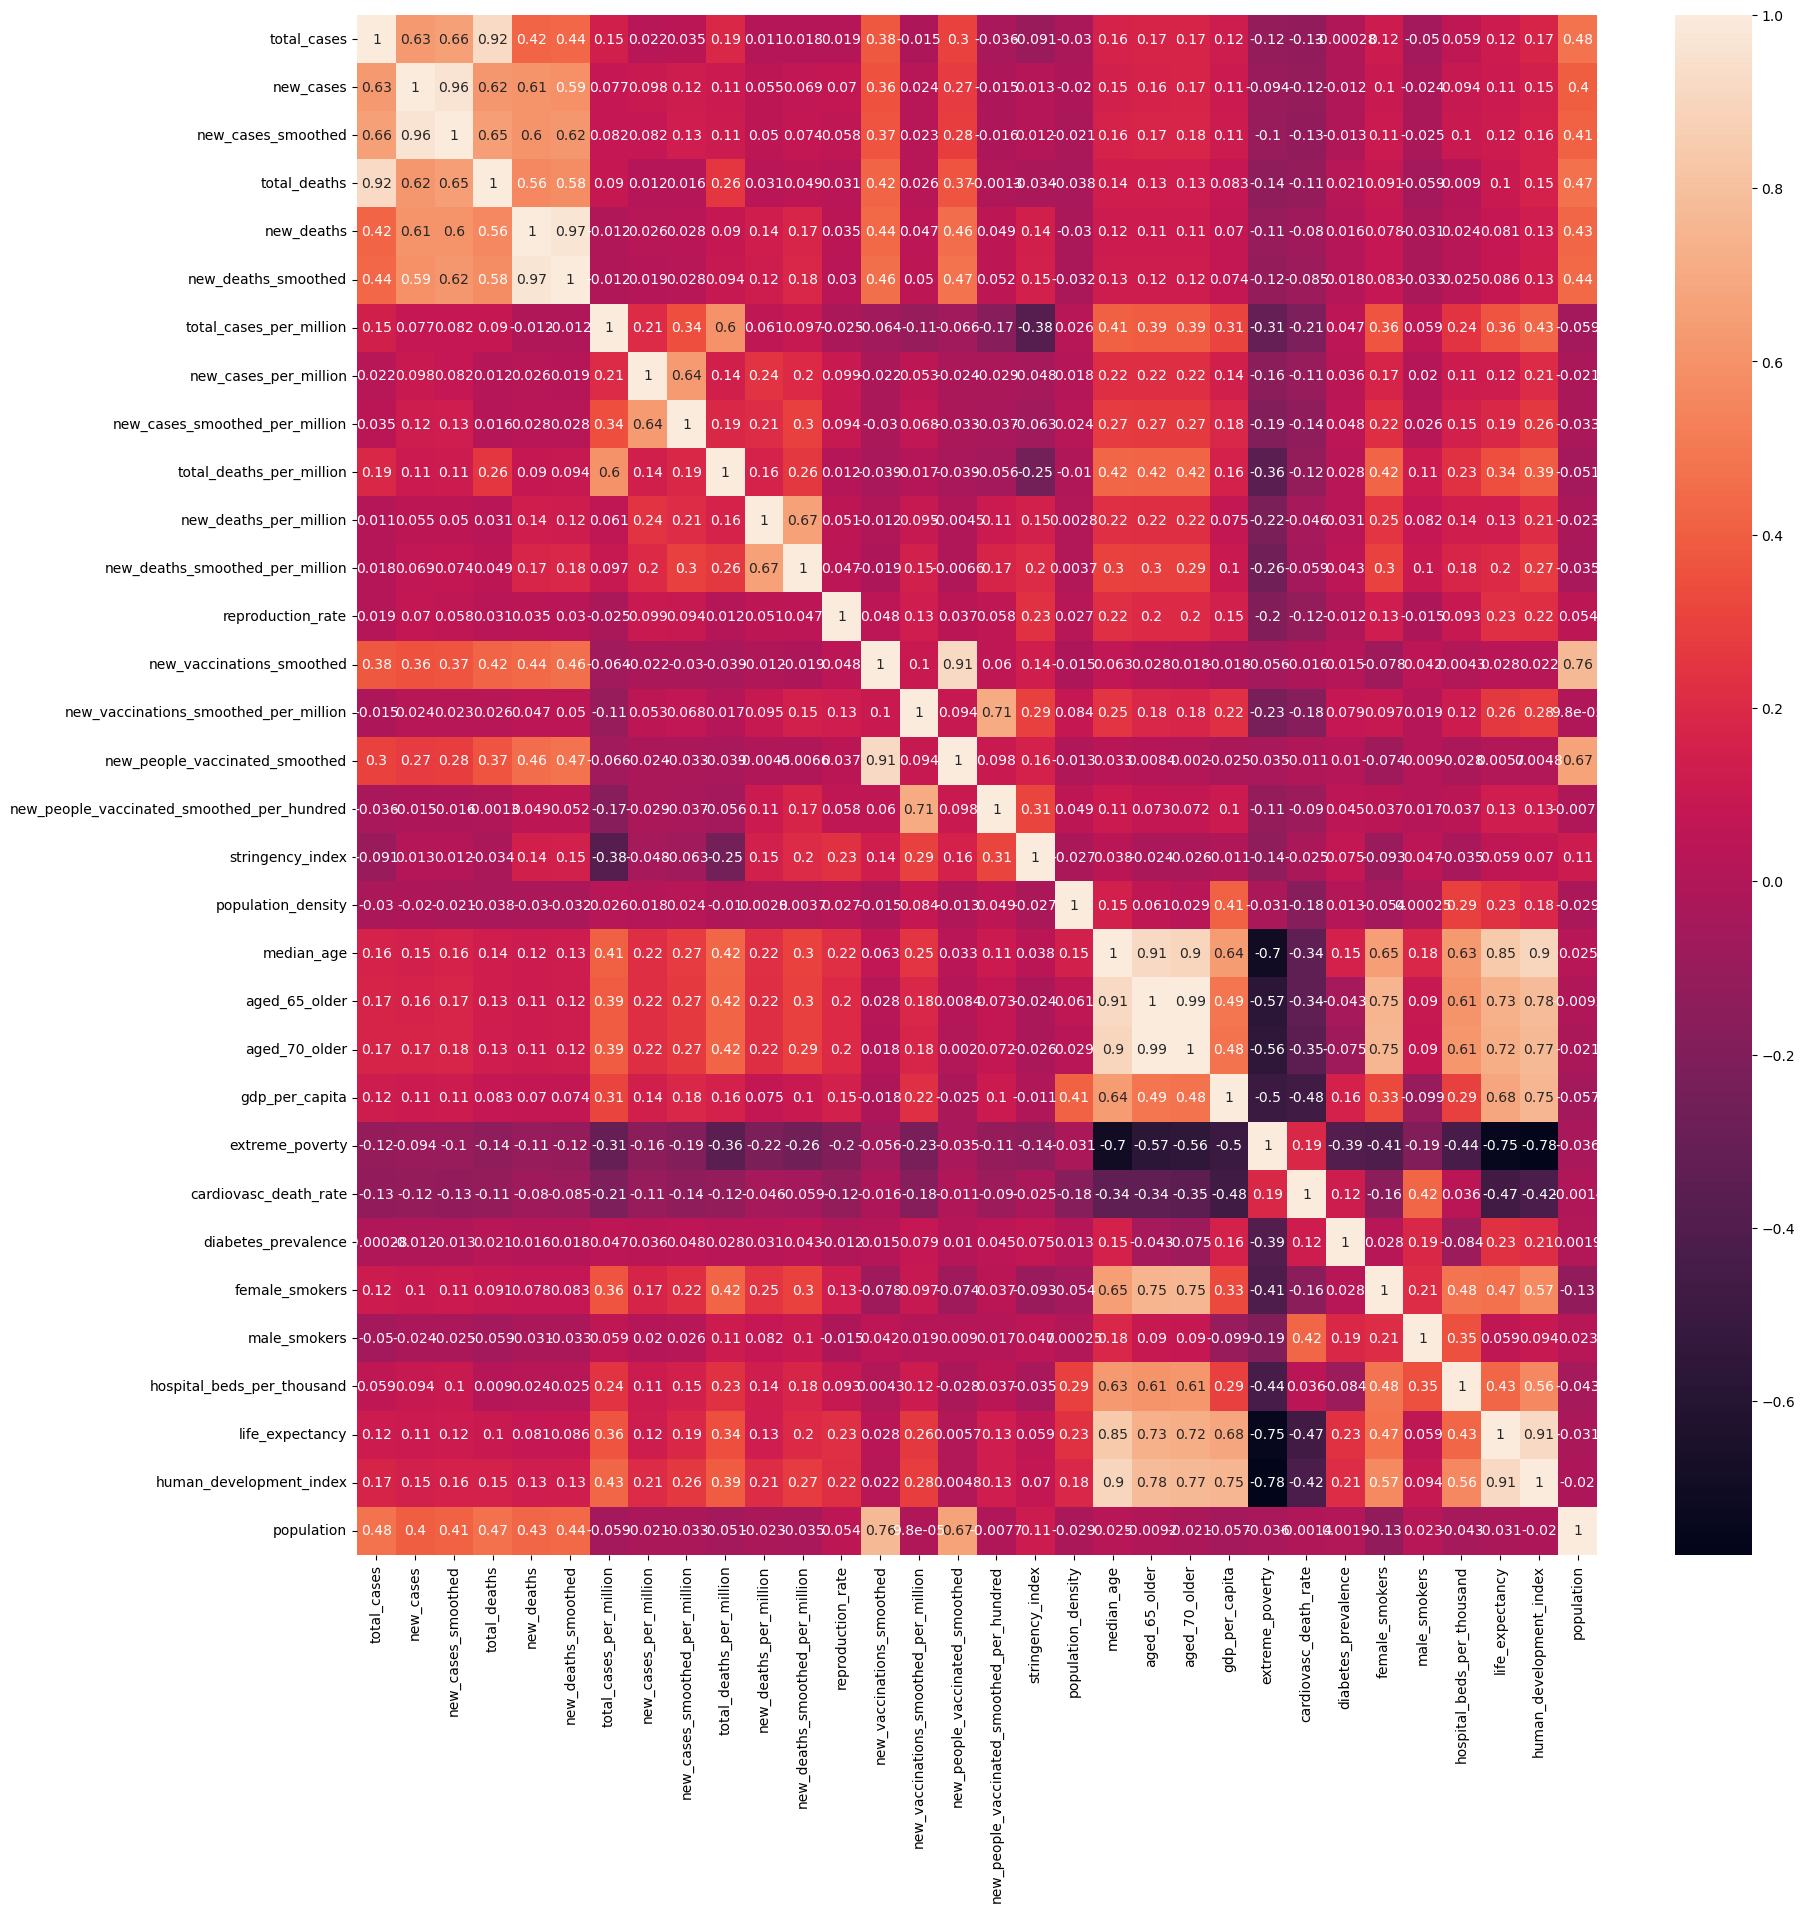

In [33]:
plt.figure(figsize = (20,20))
sns.heatmap(df_copy.drop(columns = ['iso_code', 'continent', 'location','date']).corr(),annot = True)

In [34]:
df_copy.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'population'],
      dtype='object')

In [35]:
df_copy.drop(columns = ['iso_code','population_density','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','new_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate',
                        'diabetes_prevalence','hospital_beds_per_thousand','life_expectancy','human_development_index','male_smokers'], inplace = True) 
#Были удалены: iso_code потому что отражает информацию уже сущ. в столбцах
#              population_density так как не поможет в эпидемиологических выводах
#              gdp_per_capita так как не поможет в эпидемиологических выводах
#              extreme_poverty также не отражает ситуации с covid19
#              cardiovasc_death_rate отражает смерть от сердечно-сосудистых заболеваний но не от covid19
#              diabetes_prevalence так как не поможет в эпидемиологических выводах
#              hospital_beds_per_thousand так как не поможет в эпидемиологических выводах
#              life_expectancy так как не поможет в эпидемиологических выводах
#              human_development_index так как не поможет в эпидемиологических выводах

In [36]:
df_copy.reset_index(drop = True,inplace = True)

<AxesSubplot:>

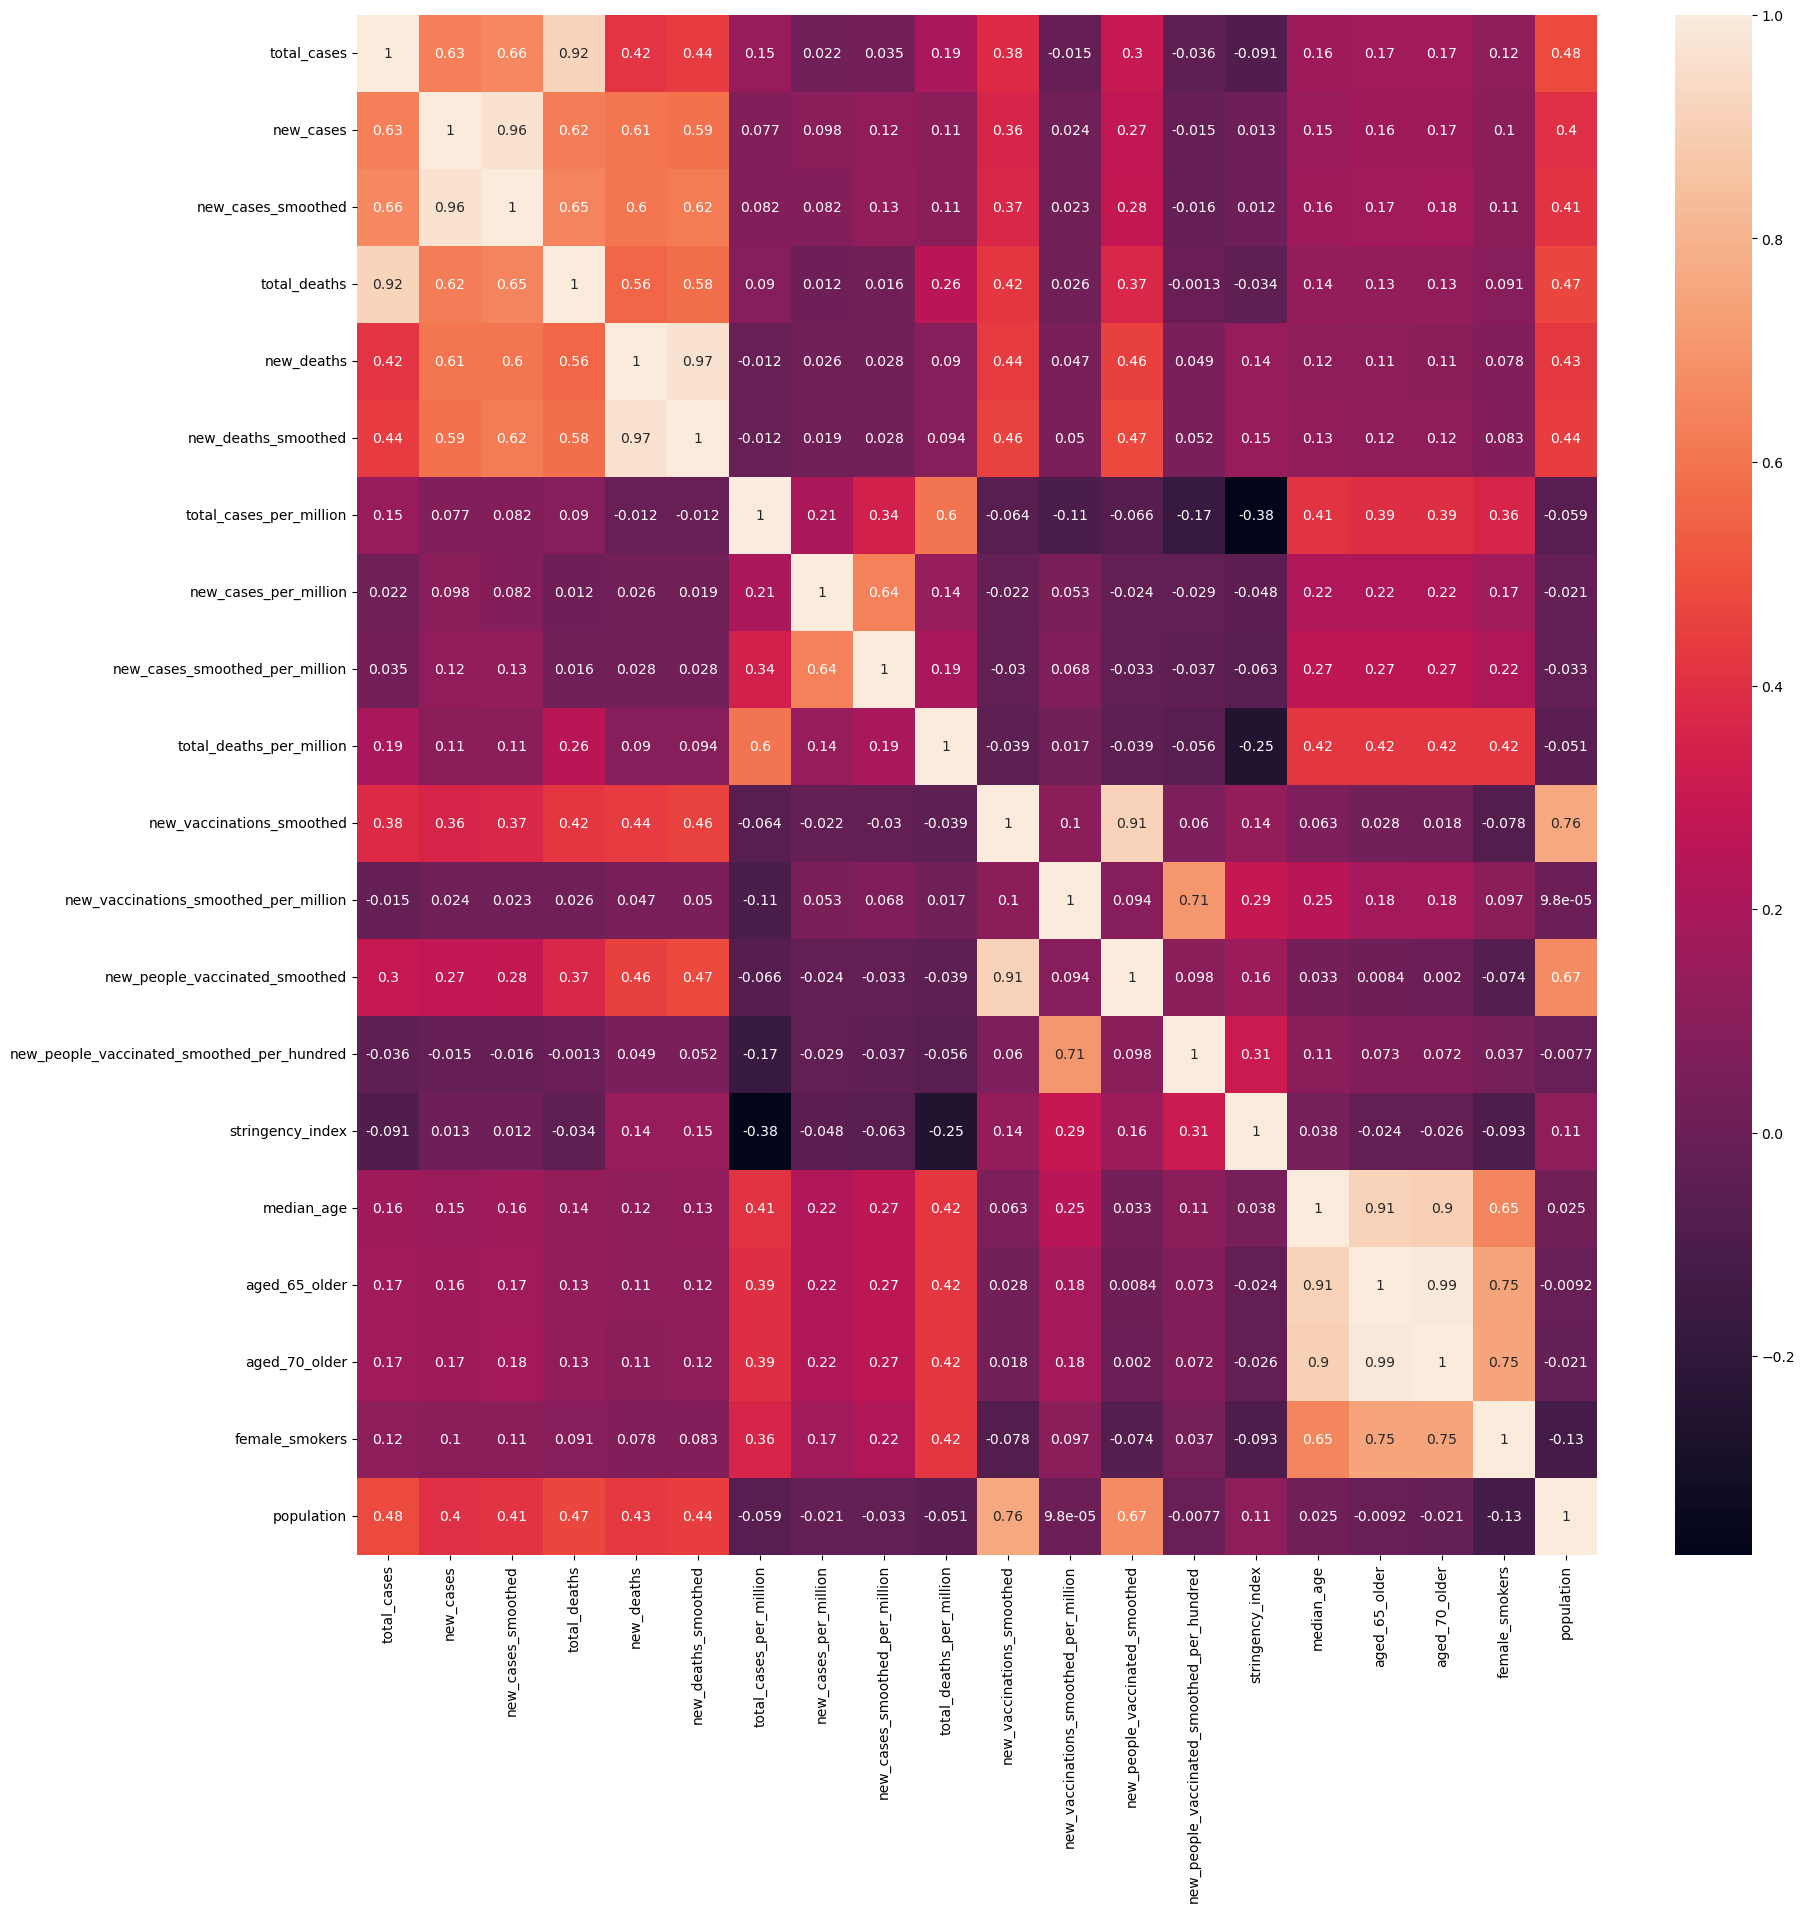

In [37]:
plt.figure(figsize = (20,20))
sns.heatmap(df_copy.drop(columns = ['continent', 'location','date']).corr(),annot = True)

Видим, что некоторые столбцы слишком сильно коррелируют друг с другом, для модели обучения в последствии это будет плохо, поэтому некоторые из столбцов, не такие важные как остальные я откину

In [38]:
df_copy.drop(columns = ['new_cases_smoothed', 'new_deaths_smoothed','new_cases_smoothed_per_million',
                        'new_people_vaccinated_smoothed','aged_65_older','aged_70_older','new_cases_per_million','total_deaths'], inplace = True)
# 'total_cases' хоть и кажется что очень важная колонка, но она практически полностью заменяется total_deaths при чём колонка лучше коррелирует с другими


In [39]:
df_copy.reset_index(drop = True,inplace = True)

<AxesSubplot:>

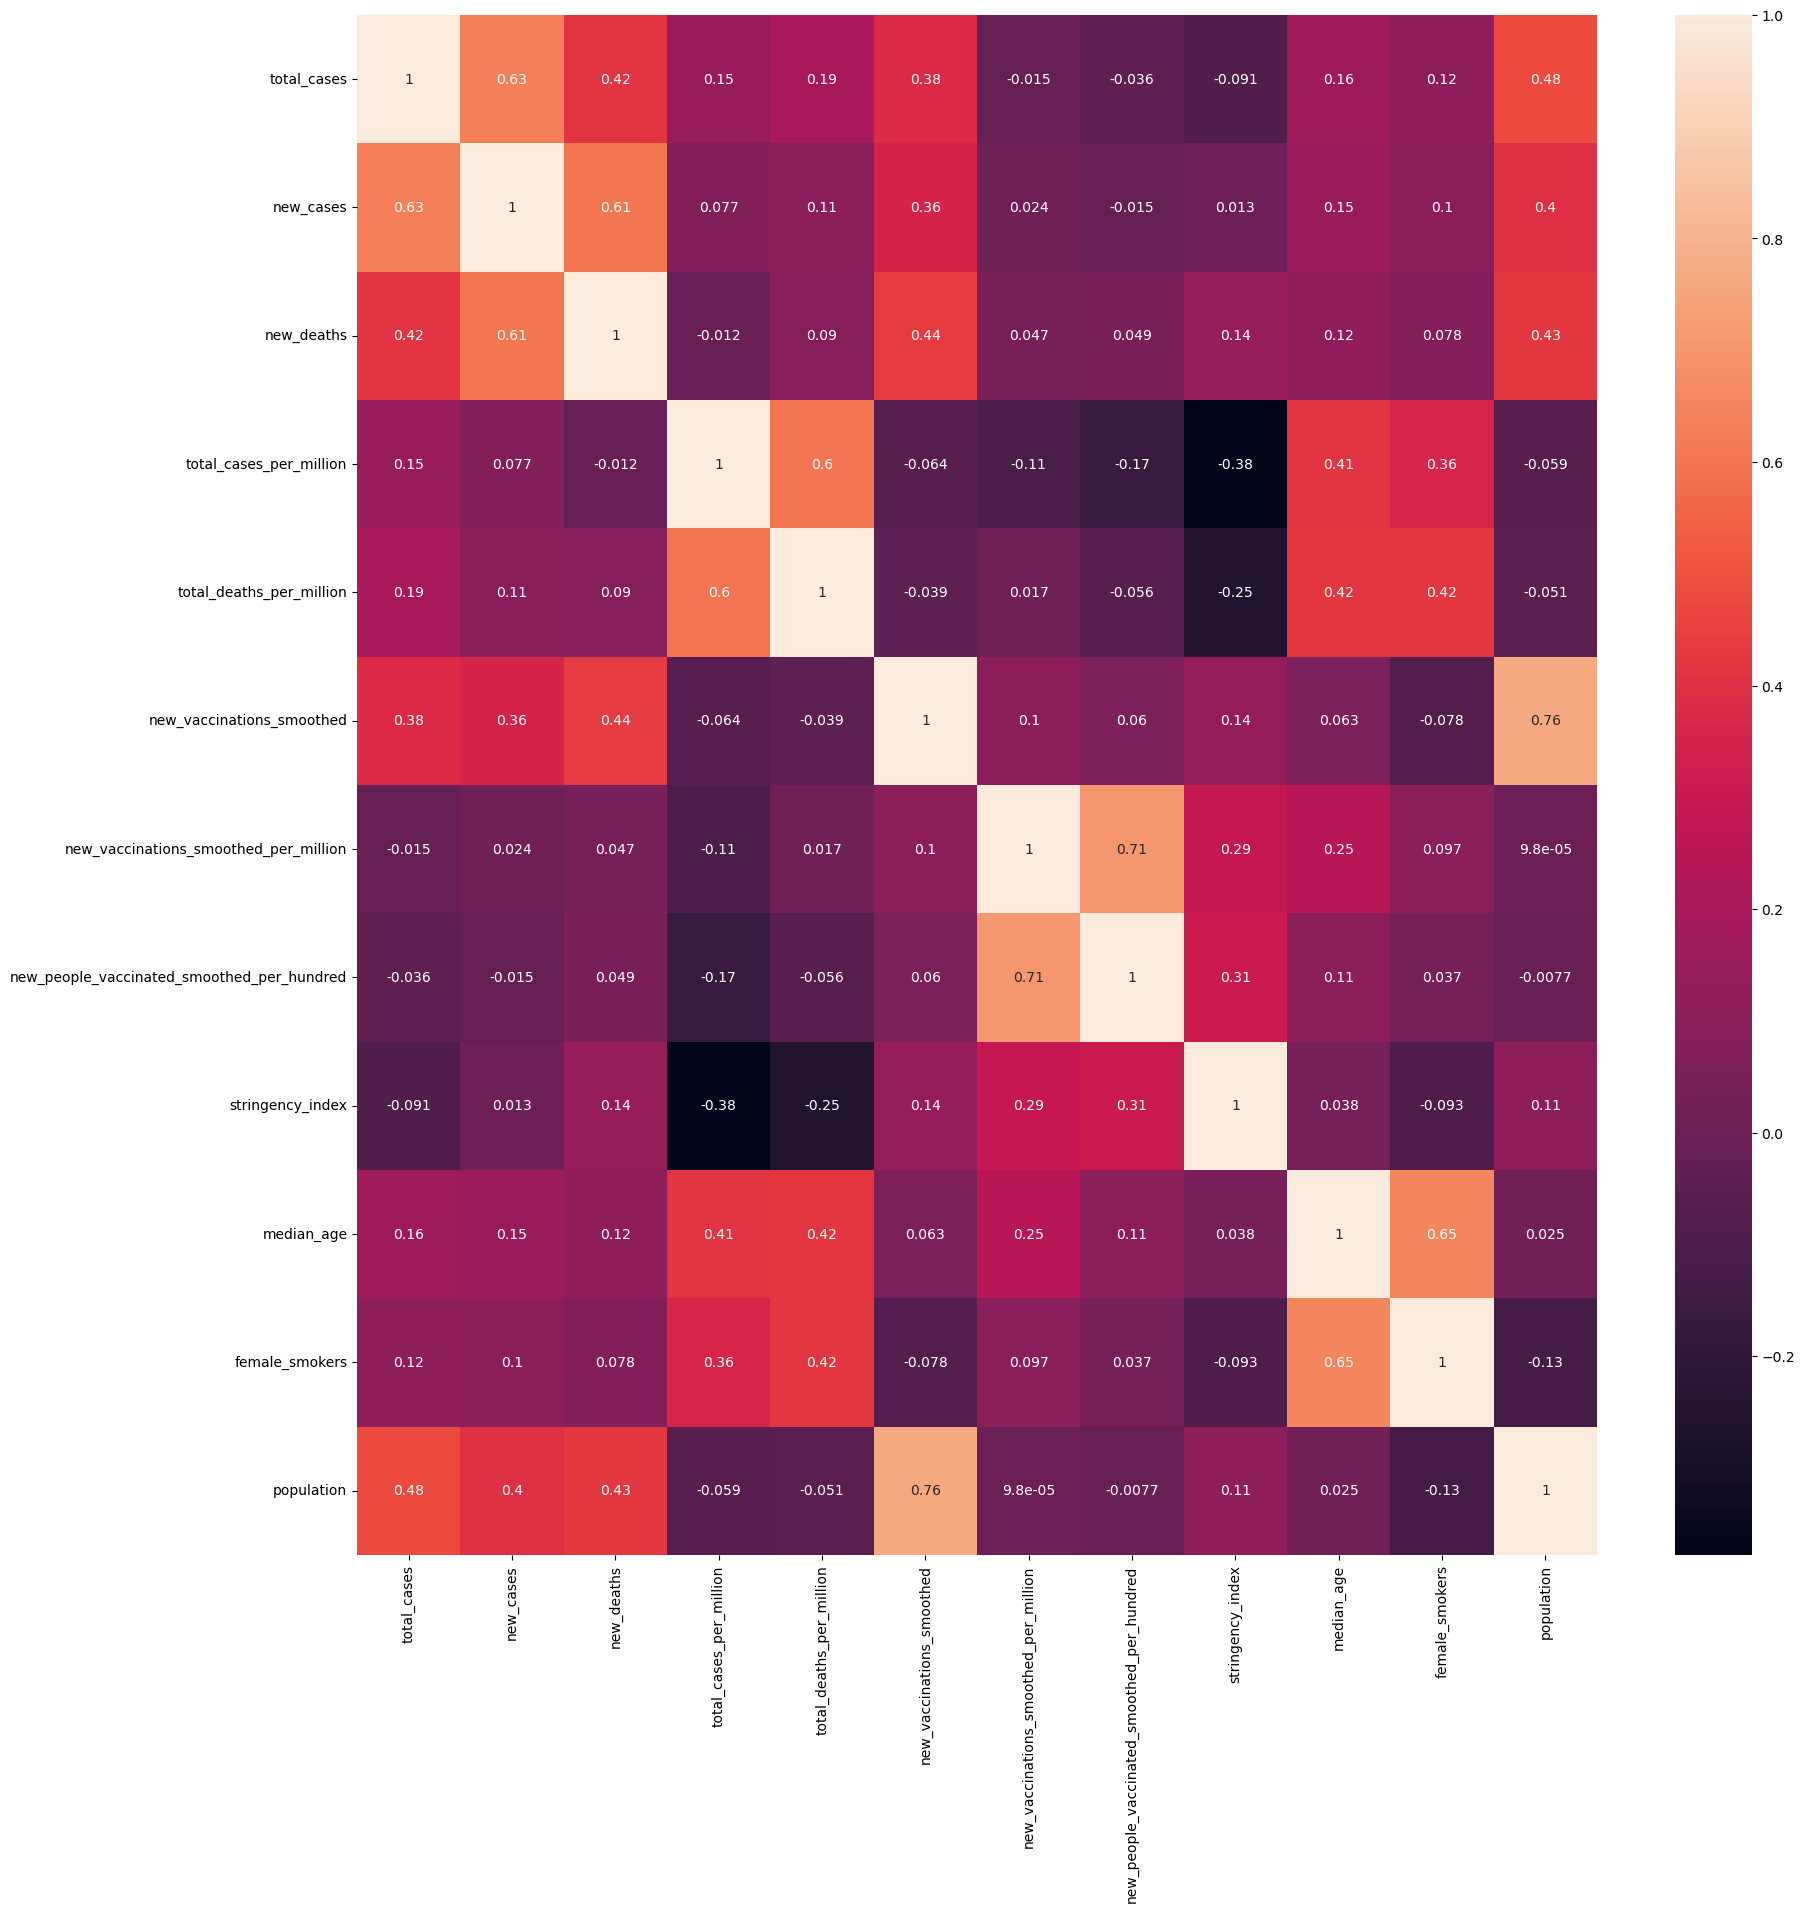

In [40]:
plt.figure(figsize = (20,20))
sns.heatmap(df_copy.drop(columns = ['continent', 'location','date']).corr(),annot = True)

Теперь стоит обратить внимание на все nan значения в числовых данных

In [44]:
for column in df_copy.drop(columns = ['date','location','continent']).columns:
    df_copy[column].fillna(df_copy[column].mean(),inplace = True)

<AxesSubplot:>

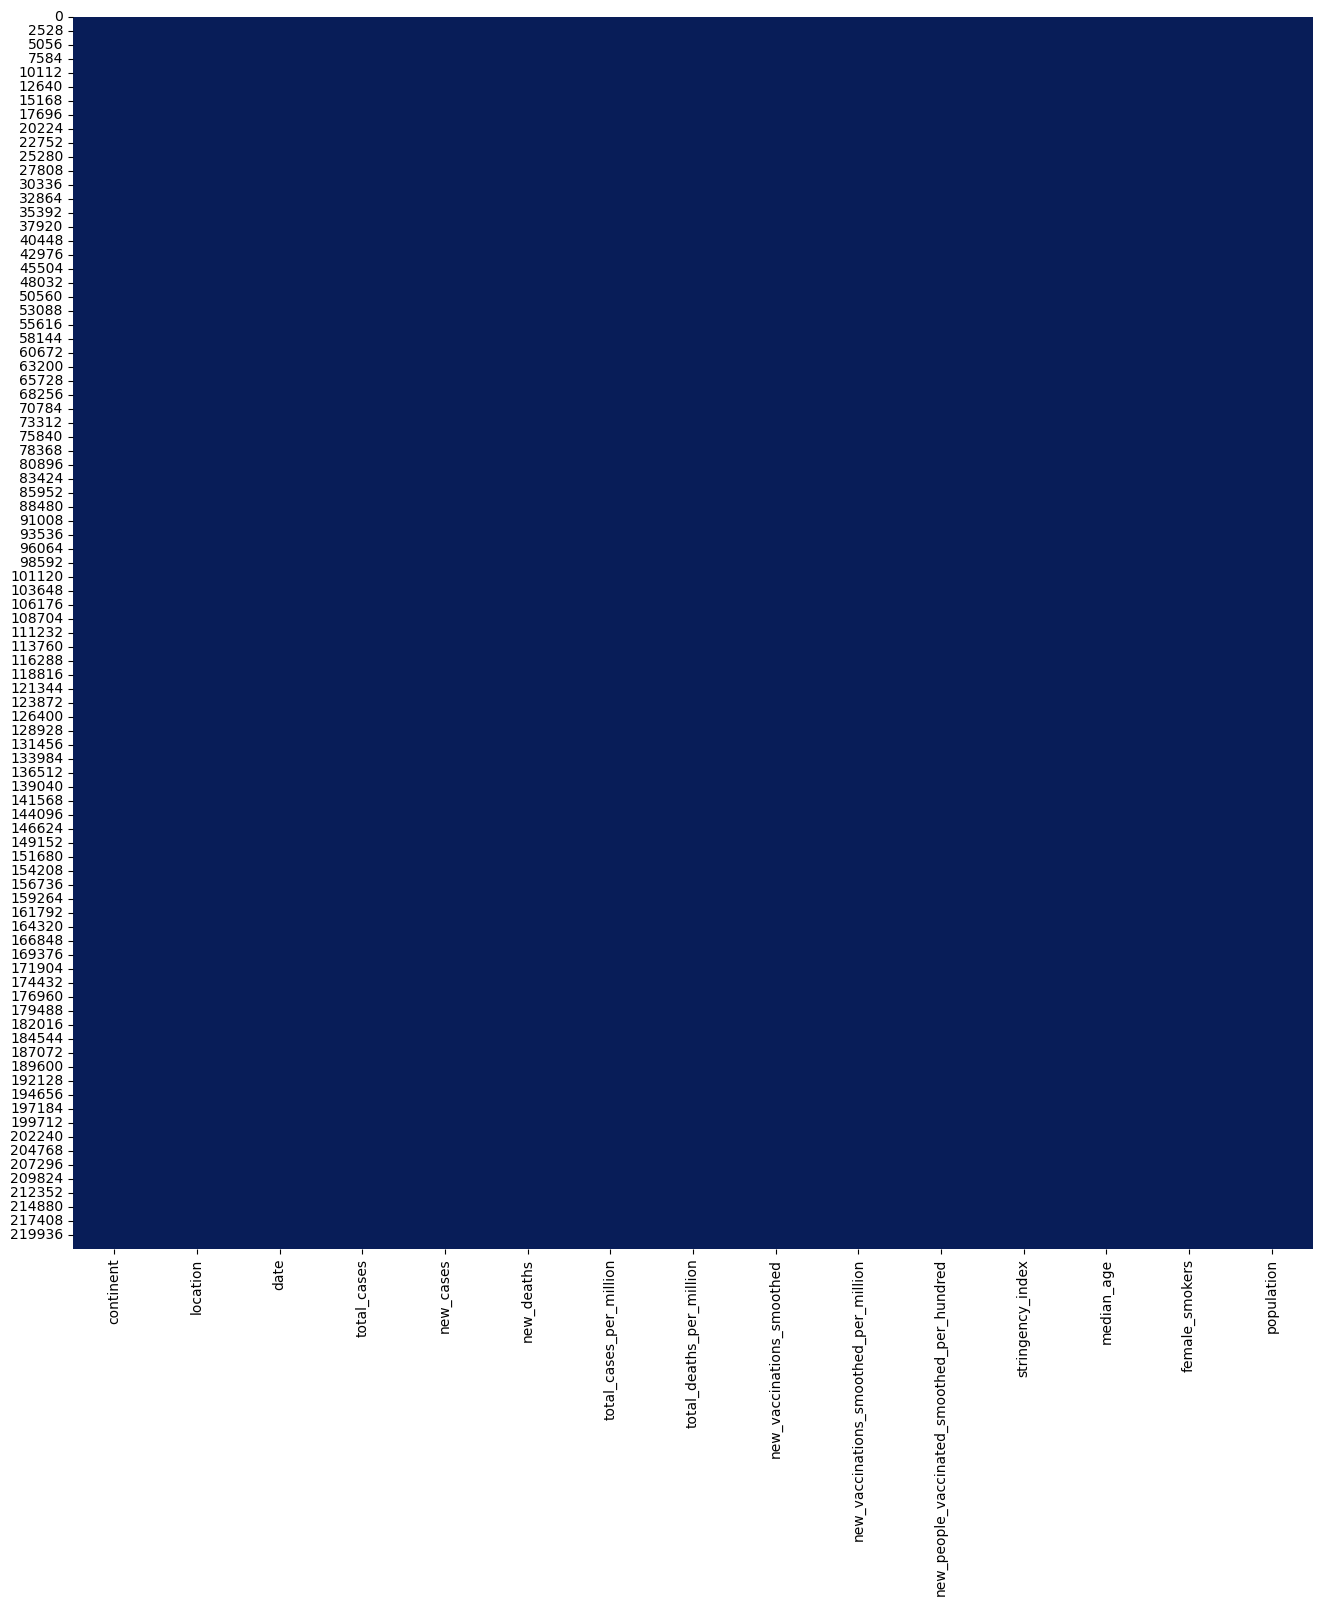

In [45]:
plt.figure(figsize = (16,16))
sns.heatmap(data = df_copy.isnull(),cmap="YlGnBu_r",cbar=False)

In [46]:
df_copy.head(50)

continent     location        date  total_cases    new_cases  new_deaths  \
0       Asia  Afghanistan  2020-02-24          5.0     5.000000   68.753539   
1       Asia  Afghanistan  2020-02-25          5.0     0.000000   68.753539   
2       Asia  Afghanistan  2020-02-26          5.0     0.000000   68.753539   
3       Asia  Afghanistan  2020-02-27          5.0     0.000000   68.753539   
4       Asia  Afghanistan  2020-02-28          5.0     0.000000   68.753539   
5       Asia  Afghanistan  2020-02-29          5.0     0.000000   68.753539   
6       Asia  Afghanistan  2020-03-01          5.0     0.000000   68.753539   
7       Asia  Afghanistan  2020-03-02          5.0     0.000000   68.753539   
8       Asia  Afghanistan  2020-03-03          5.0     0.000000   68.753539   
9       Asia  Afghanistan  2020-03-04          5.0     0.000000   68.753539   
10      Asia  Afghanistan  2020-03-05          5.0     0.000000   68.753539   
11      Asia  Afghanistan  2020-03-06          5.0     0.000000   68.753539   
12      Asia  Afghanistan  2020-03-07          8.0     3.000000   68.753539   
13      Asia  Afghanistan  2020-03-08          8.0     0.000000   68.753539   
14      Asia  Afghanistan  2020-03-09          8.0     0.000000   68.753539   
15      Asia  Afghanistan  2020-03-10          8.0     0.000000   68.753539   
16      Asia  Afghanistan  2020-03-11         11.0     3.000000   68.753539   
17      Asia  Afghanistan  2020-03-12         11.0     0.000000   68.753539   
18      Asia  Afghanistan  2020-03-13         11.0     0.000000   68.753539   
19      Asia  Afghanistan  2020-03-14         14.0     3.000000   68.753539   
20      Asia  Afghanistan  2020-03-15         20.0     6.000000   68.753539   
21      Asia  Afghanistan  2020-03-16         25.0     5.000000   68.753539   
22      Asia  Afghanistan  2020-03-17         26.0     1.000000   68.753539   
23      Asia  Afghanistan  2020-03-18         26.0     0.000000   68.753539   
24      Asia  Afghanistan  2020-03-19         26.0     0.000000   68.753539   
25      Asia  Afghanistan  2020-03-20         24.0  5982.578307   68.753539   
26      Asia  Afghanistan  2020-03-21         24.0     0.000000   68.753539   
27      Asia  Afghanistan  2020-03-22         34.0    10.000000   68.753539   
28      Asia  Afghanistan  2020-03-23         40.0     6.000000    1.000000   
29      Asia  Afghanistan  2020-03-24         42.0     2.000000    0.000000   
30      Asia  Afghanistan  2020-03-25         74.0    32.000000    0.000000   
31      Asia  Afghanistan  2020-03-26         80.0     6.000000    1.000000   
32      Asia  Afghanistan  2020-03-27         91.0    11.000000    0.000000   
33      Asia  Afghanistan  2020-03-28        106.0    15.000000    0.000000   
34      Asia  Afghanistan  2020-03-29        114.0     8.000000    2.000000   
35      Asia  Afghanistan  2020-03-30        114.0     0.000000    0.000000   
36      Asia  Afghanistan  2020-03-31        166.0    52.000000    0.000000   
37      Asia  Afghanistan  2020-04-01        192.0    26.000000    0.000000   
38      Asia  Afghanistan  2020-04-02        235.0    43.000000    0.000000   
39      Asia  Afghanistan  2020-04-03        269.0    34.000000    1.000000   
40      Asia  Afghanistan  2020-04-04        270.0     1.000000    0.000000   
41      Asia  Afghanistan  2020-04-05        299.0    29.000000    2.000000   
42      Asia  Afghanistan  2020-04-06        337.0    38.000000    0.000000   
43      Asia  Afghanistan  2020-04-07        367.0    30.000000    4.000000   
44      Asia  Afghanistan  2020-04-08        423.0    56.000000    3.000000   
45      Asia  Afghanistan  2020-04-09        444.0    21.000000    1.000000   
46      Asia  Afghanistan  2020-04-10        521.0    77.000000    0.000000   
47      Asia  Afghanistan  2020-04-11        521.0     0.000000    0.000000   
48      Asia  Afghanistan  2020-04-12        555.0    34.000000    3.000000   
49      Asia  Afghanistan  2020-04-13        607.0   

По выведенным первым 50 значениям датафрейма можно сказать, что колонки, в которых присутствуют большие пропуски возникают из-за не информированности об на примере колонки total_deaths умерших, тоесть пока никто не умер в колонке будет nan значение, следовательно можно все эти nan заначения заменить на нули.

Даже если и существуют такие колонки в которых просто отсутствует информация, их число будет малозначимо по сравнению с остальными просто не заполненными нулями вместо nan значений

In [47]:
#df_copy.fillna(0,inplace = True)

<AxesSubplot:>

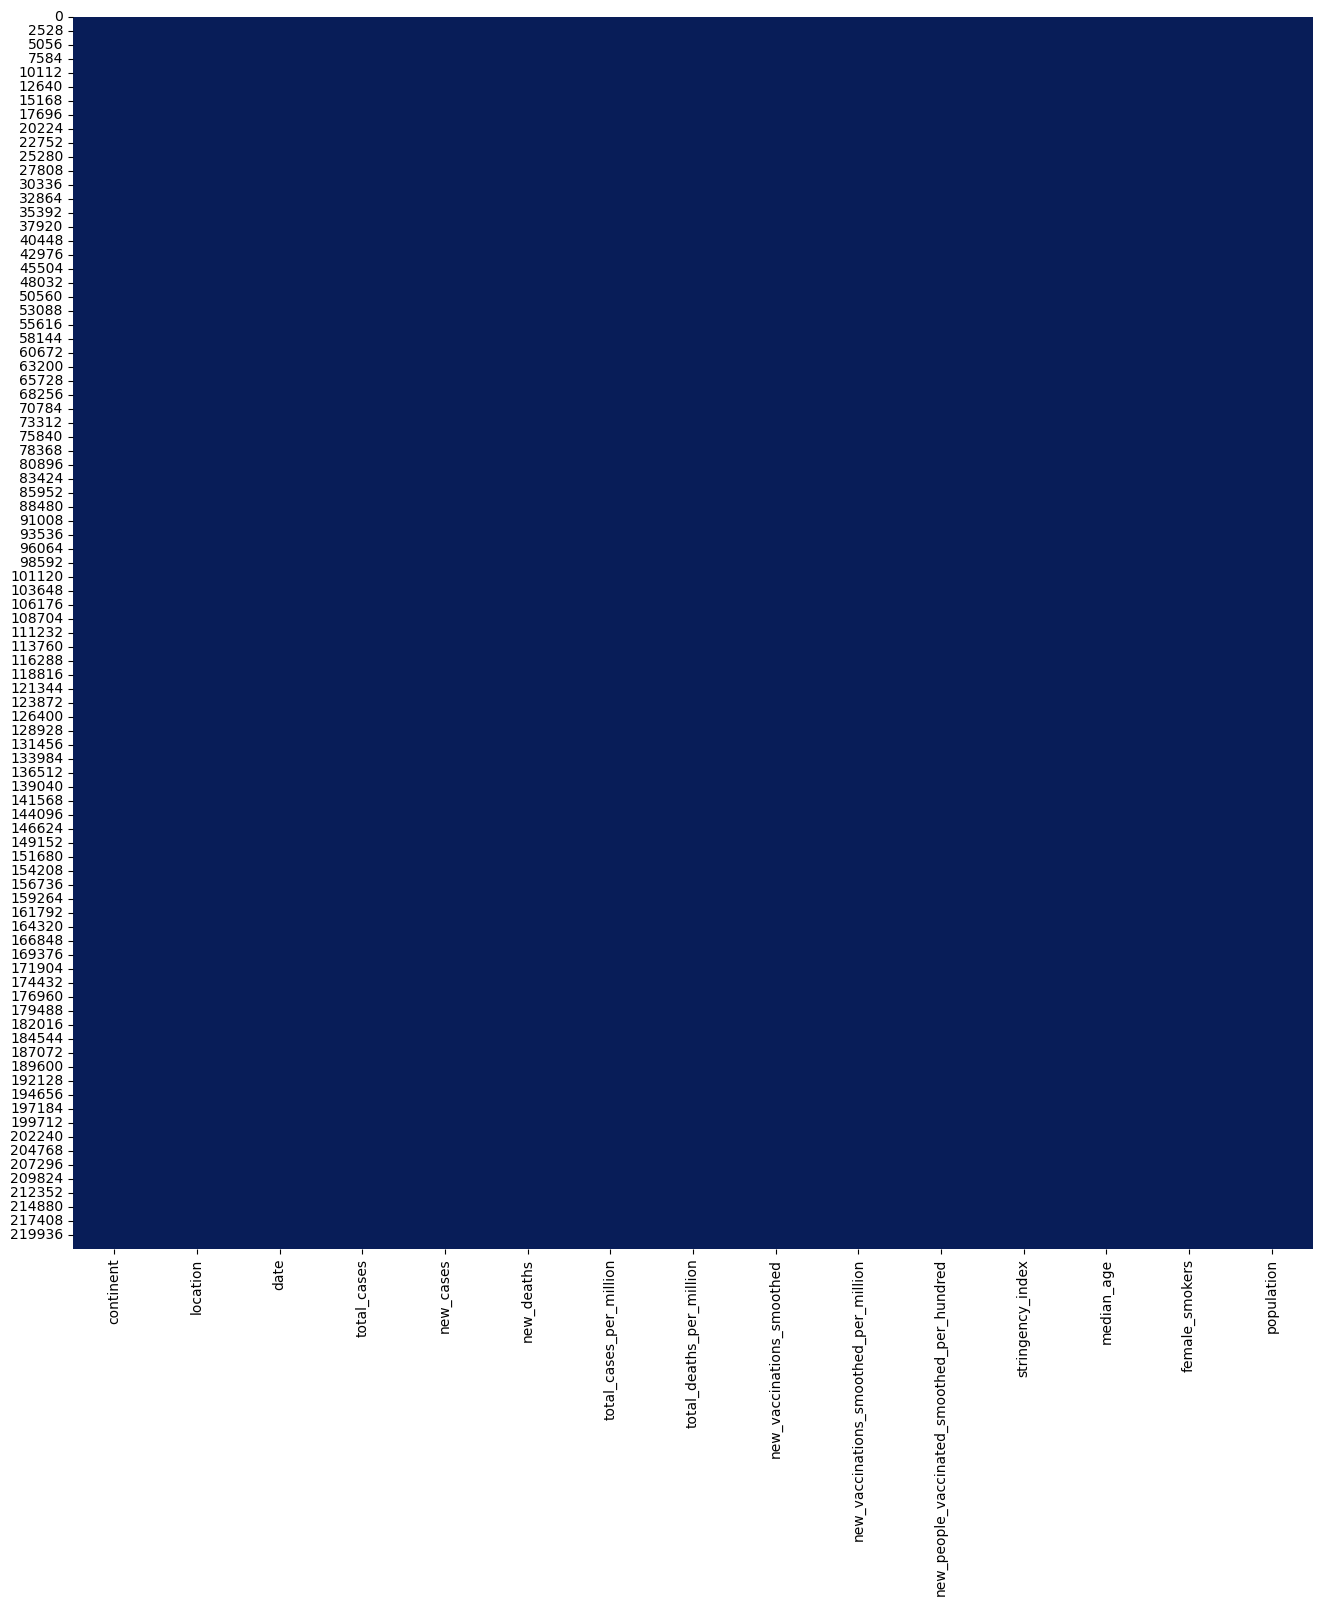

In [48]:
plt.figure(figsize = (16,16))
sns.heatmap(data = df_copy.isnull(),cmap="YlGnBu_r",cbar=False)

И теперь можно посмотреть на таблицу корелляций в её почти полном виде и сравнить с прошлой, что она не сильно изменилась и мы не испортили данные

<AxesSubplot:>

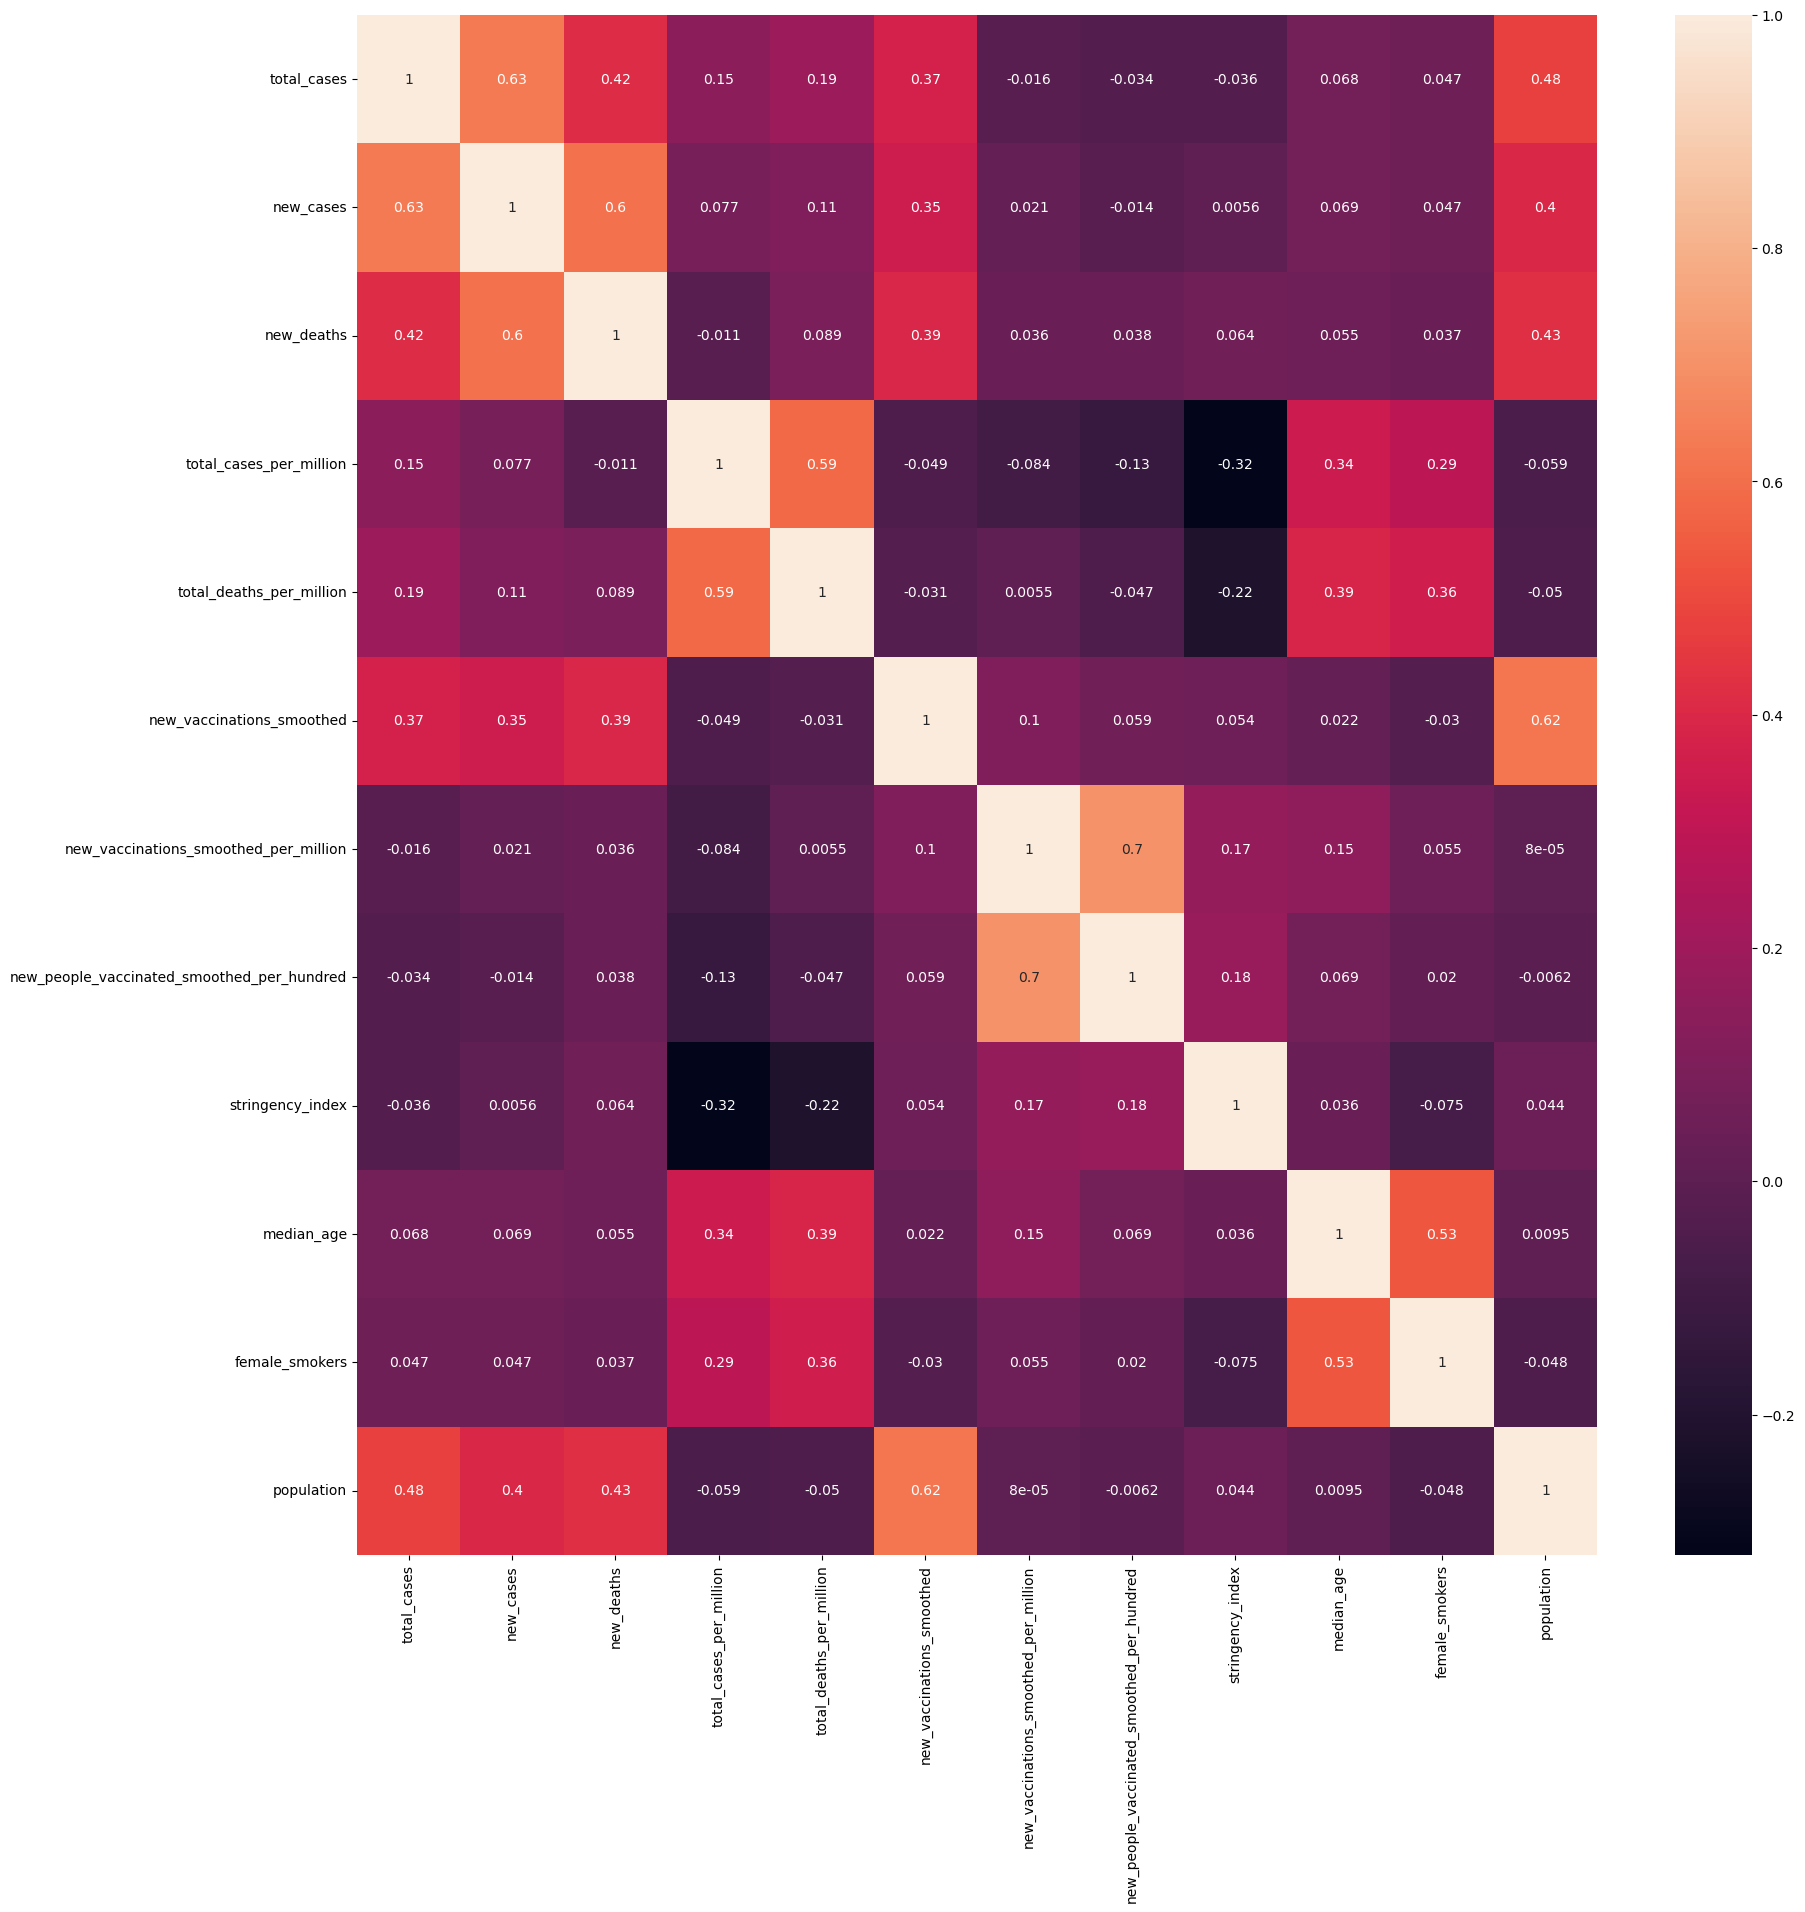

In [49]:
plt.figure(figsize = (20,20))
sns.heatmap(df_copy.drop(columns = ['continent', 'location','date']).corr(),annot = True)

In [50]:
df_copy.shape

(222459, 15)

# 1.3

Сделаем гистограммы для каждой колонки:

array([[<AxesSubplot:title={'center':'total_cases'}>,
        <AxesSubplot:title={'center':'new_cases'}>,
        <AxesSubplot:title={'center':'new_deaths'}>],
       [<AxesSubplot:title={'center':'total_cases_per_million'}>,
        <AxesSubplot:title={'center':'total_deaths_per_million'}>,
        <AxesSubplot:title={'center':'new_vaccinations_smoothed'}>],
       [<AxesSubplot:title={'center':'new_vaccinations_smoothed_per_million'}>,
        <AxesSubplot:title={'center':'new_people_vaccinated_smoothed_per_hundred'}>,
        <AxesSubplot:title={'center':'stringency_index'}>],
       [<AxesSubplot:title={'center':'median_age'}>,
        <AxesSubplot:title={'center':'female_smokers'}>,
        <AxesSubplot:title={'center':'population'}>]], dtype=object)

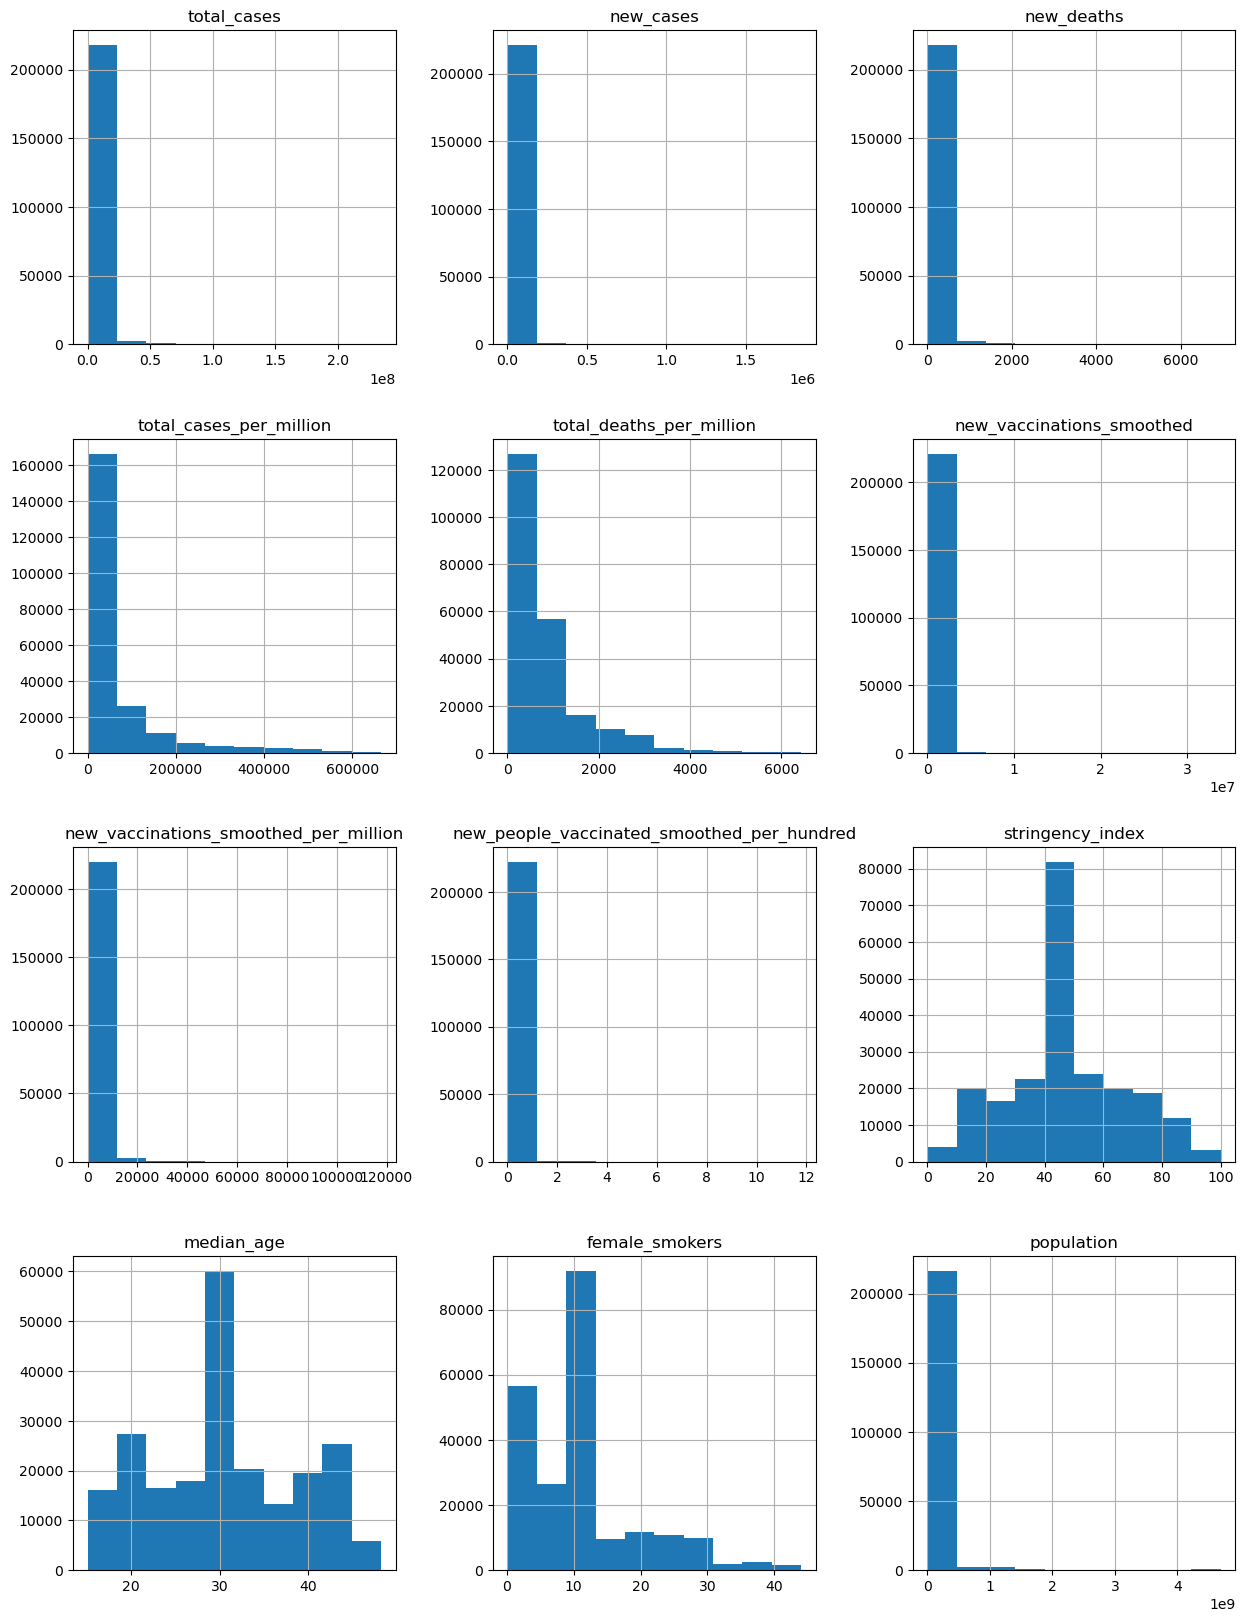

In [51]:
df_copy.hist(figsize=(15,20))

Как видим большинство из колонок распределено не так хорошо, присутствует огромное количество нулей значений и последующий овраг в сторону остальных чисел

<AxesSubplot:>

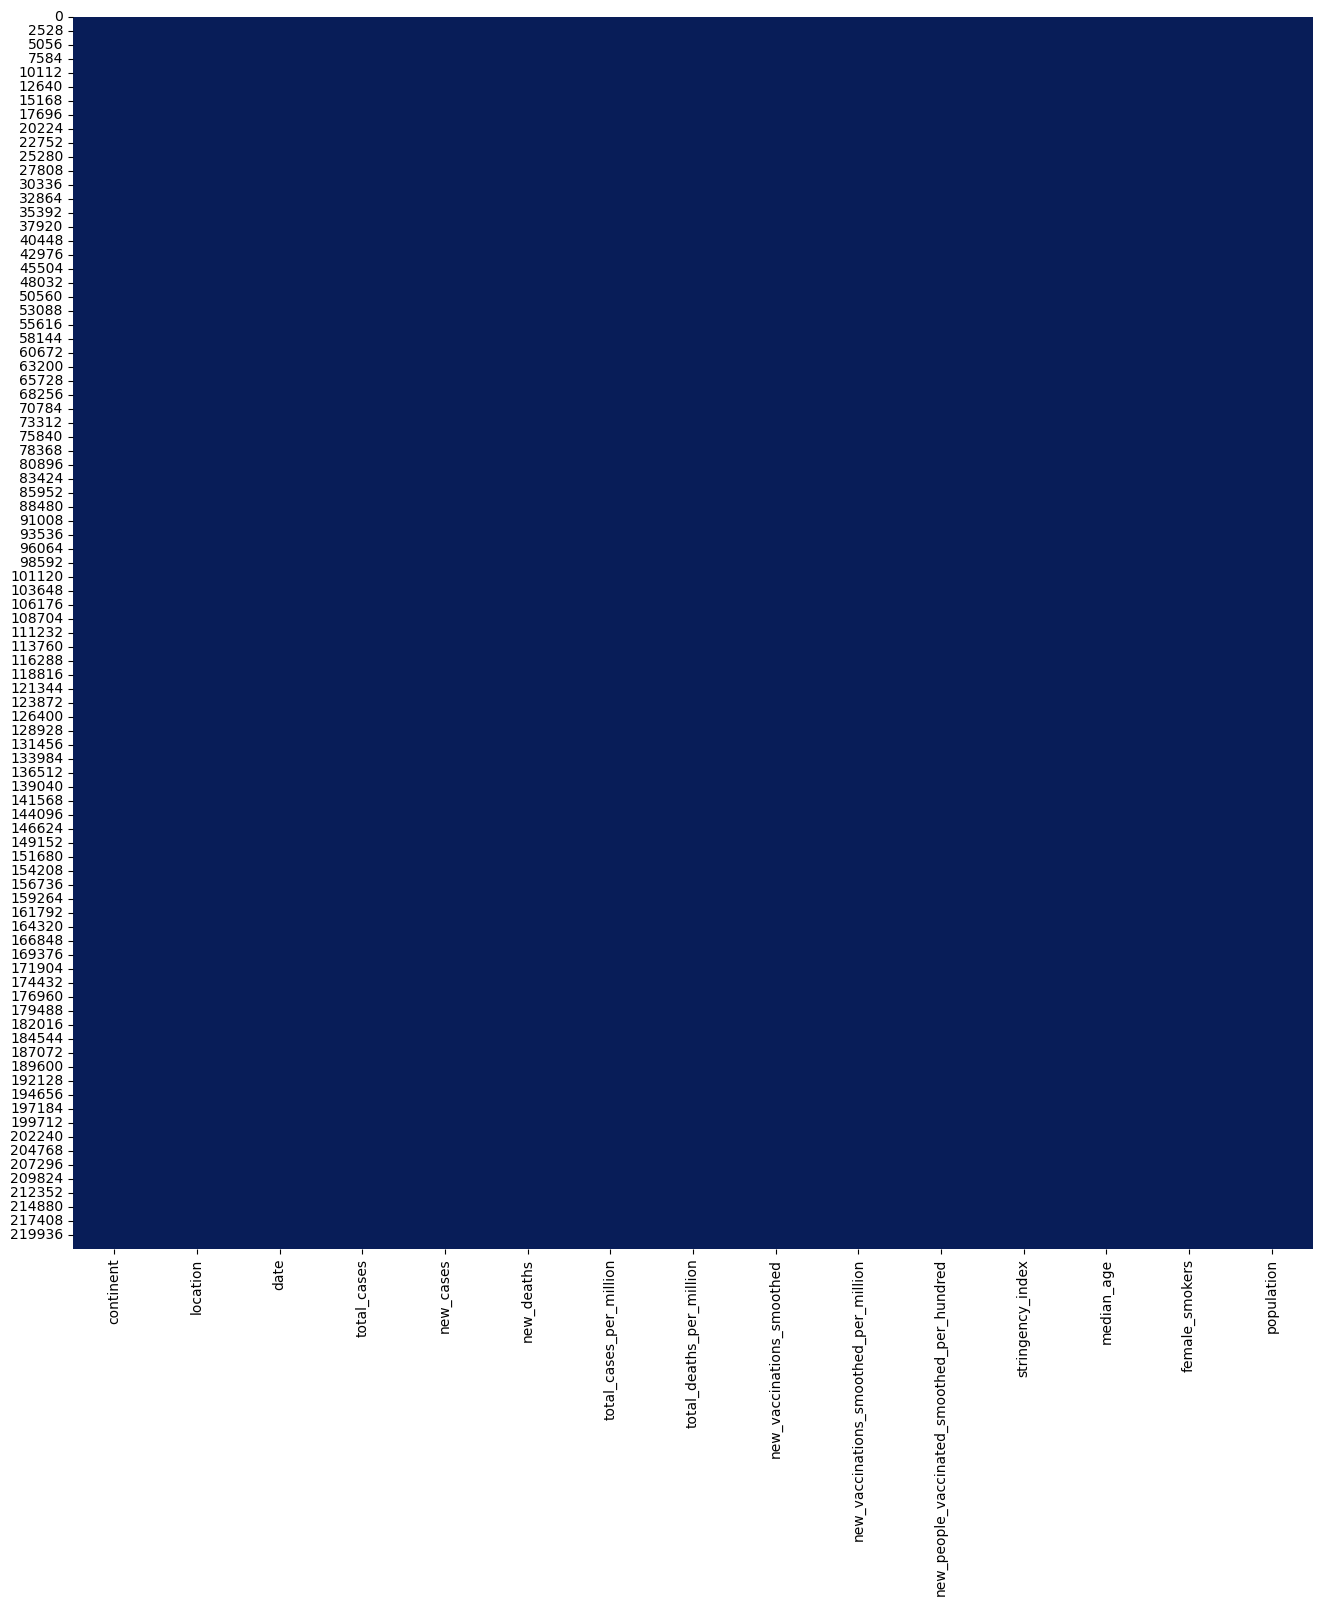

In [52]:
plt.figure(figsize = (16,16))
sns.heatmap(data = df_copy.isnull(),cmap="YlGnBu_r",cbar=False)

Как видим даже после некоторой обработки nan значений также остаётся много

Пишем для каждой колонки словарик что это и какие это данные

In [53]:
df_copy.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_deaths', 'total_cases_per_million', 'total_deaths_per_million',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'median_age', 'female_smokers', 'population'],
      dtype='object')

continent - Континент географического положения

location - Географическое положение. Местоположение "Международное" учитывает особые регионы (круизы "Diamond Princess" и "MS Zaandam").

date - Дата наблюдения

total_cases - Общее количество подтвержденных случаев COVID-19. Подсчеты могут включать вероятные случаи, о которых сообщалось.

new_cases - Новые подтвержденные случаи заболевания COVID-19. Подсчеты могут включать вероятные случаи, о которых сообщалось. В редких случаях, когда наш источник сообщает об отрицательном ежедневном изменении из-за коррекции данных, мы устанавливаем для этого показателя значение NA.

total_cases_per_million - Общее количество подтвержденных случаев COVID-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи, о которых сообщалось.

new_deaths - Новые случаи смерти, связанные с COVID-19. Подсчеты могут включать вероятные смертельные случаи, если об этом сообщается. В редких случаях, когда наш источник сообщает об отрицательном ежедневном изменении из-за коррекции данных, мы устанавливаем для этого показателя значение NA.

total_deaths_per_million - Общее число смертей, связанных с COVID-19 на 1 000 000 человек. Подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

new_vaccinations_smoothed - Введены новые дозы вакцинации против COVID-19 (сглажены за 7 дней). Для стран, которые не сообщают данные о вакцинации на ежедневной основе, мы предполагаем, что вакцинация менялась одинаково на ежедневной основе в течение любых периодов, за которые данные не сообщались. В результате получается полная серия ежедневных показателей, которые затем усредняются в течение 7-дневного периода

new_vaccinations_smoothed_per_million - Вводятся новые дозы вакцинации против COVID-19 (сглаженные за 7 дней) на 1 000 000 человек в общей численности населения

new_people_vaccinated_smoothed_per_hundred - Ежедневное количество людей, получающих первую дозу вакцины (сглаженную за 7 дней) на 100 человек в общей численности населения

stringency_index - Индекс строгости реагирования правительства: сводный показатель, основанный на 9 показателях реагирования, включая закрытие школ, закрытие рабочих мест и запреты на поездки, масштабируемый до значения от 0 до 100 (100 = самый строгий ответ)

median_age - Средний возраст населения, прогноз ООН на 2020 год

female_smokers - Доля курящих женщин, по данным за последний год

population - Численность населения (последние доступные значения).

# 1.4

In [54]:
df_copy['Rt'] = 0
df_copy

continent     location        date  total_cases  new_cases  new_deaths  \
0           Asia  Afghanistan  2020-02-24          5.0        5.0   68.753539   
1           Asia  Afghanistan  2020-02-25          5.0        0.0   68.753539   
2           Asia  Afghanistan  2020-02-26          5.0        0.0   68.753539   
3           Asia  Afghanistan  2020-02-27          5.0        0.0   68.753539   
4           Asia  Afghanistan  2020-02-28          5.0        0.0   68.753539   
...          ...          ...         ...          ...        ...         ...   
222454    Africa     Zimbabwe  2022-10-18     257893.0        0.0    0.000000   
222455    Africa     Zimbabwe  2022-10-19     257893.0        0.0    0.000000   
222456    Africa     Zimbabwe  2022-10-20     257893.0        0.0    0.000000   
222457    Africa     Zimbabwe  2022-10-21     257893.0        0.0    0.000000   
222458    Africa     Zimbabwe  2022-10-22     257893.0        0.0    0.000000   

        total_cases_per_million  total_deaths_per_million  \
0                         0.125                691.795283   
1                         0.125                691.795283   
2                         0.125                691.795283   
3                         0.125                691.795283   
4                         0.125                691.795283   
...                         ...                       ...   
222454                16124.839                350.517000   
222455                16124.839                350.517000   
222456                16124.839                350.517000   
222457                16124.839                350.517000   
222458                16124.839                350.517000   

        new_vaccinations_smoothed  new_vaccinations_smoothed_per_million  \
0                   199034.837933                            2527.858274   
1                   199034.837933                            2527.858274   
2                   199034.837933                            2527.858274   
3                   199034.837933                            2527.858274   
4                   199034.837933                            2527.858274   
...                           ...                                    ...   
222454              199034.837933                            2527.858274   
222455              199034.837933                            2527.858274   
222456              199034.837933                            2527.858274   
222457              199034.837933                            2527.858274   
222458              199034.837933                            2527.858274   

        new_people_vaccinated_smoothed_per_hundred  stringency_index  \
0                                         0.104868          8.330000   
1                                         0.104868          8.330000   
2                                         0.104868          8.330000   
3                                         0.104868          8.330000   
4                                         0.104868          8.330000   
...                                            ...               ...   
222454                                    0.104868         47.798731   
222455                                    0.104868         47.798731   
222456                                    0.104868         47.798731   
222457                                    0.104868         47.798731   
222458                                    0.104868         47.798731   

        median_age  female_smokers  population  Rt  
0             18.6       10.706981  40099462.0   0  
1             18.6       10.706981  40099462.0   0  
2             18.6       10.706981  40099462.0   0  
3             18.6       10.706981  40099462.0   0  
4             18.6       10.706981  40099462.0   0  
...            ...             ...         ...  ..  
222454        19.6        1.600000  15993524.0   0  
222455        19.6        1.600000  15993524.0   0  
222456        19.6        1.600000  15993524.0

In [55]:
for locat in df_copy['location'].unique():
    for i in range(len(df_copy)):
        if i+8 < len(df_copy):
              if df_copy['location'][i+8] == locat:
                    df_copy['Rt'][i+8] = df_copy['new_cases'][i:i+4].sum() / df_copy['new_cases'][i+4:i+8].sum()

In [56]:
df_copy.head(50)

continent     location        date  total_cases    new_cases  new_deaths  \
0       Asia  Afghanistan  2020-02-24          5.0     5.000000   68.753539   
1       Asia  Afghanistan  2020-02-25          5.0     0.000000   68.753539   
2       Asia  Afghanistan  2020-02-26          5.0     0.000000   68.753539   
3       Asia  Afghanistan  2020-02-27          5.0     0.000000   68.753539   
4       Asia  Afghanistan  2020-02-28          5.0     0.000000   68.753539   
5       Asia  Afghanistan  2020-02-29          5.0     0.000000   68.753539   
6       Asia  Afghanistan  2020-03-01          5.0     0.000000   68.753539   
7       Asia  Afghanistan  2020-03-02          5.0     0.000000   68.753539   
8       Asia  Afghanistan  2020-03-03          5.0     0.000000   68.753539   
9       Asia  Afghanistan  2020-03-04          5.0     0.000000   68.753539   
10      Asia  Afghanistan  2020-03-05          5.0     0.000000   68.753539   
11      Asia  Afghanistan  2020-03-06          5.0     0.000000   68.753539   
12      Asia  Afghanistan  2020-03-07          8.0     3.000000   68.753539   
13      Asia  Afghanistan  2020-03-08          8.0     0.000000   68.753539   
14      Asia  Afghanistan  2020-03-09          8.0     0.000000   68.753539   
15      Asia  Afghanistan  2020-03-10          8.0     0.000000   68.753539   
16      Asia  Afghanistan  2020-03-11         11.0     3.000000   68.753539   
17      Asia  Afghanistan  2020-03-12         11.0     0.000000   68.753539   
18      Asia  Afghanistan  2020-03-13         11.0     0.000000   68.753539   
19      Asia  Afghanistan  2020-03-14         14.0     3.000000   68.753539   
20      Asia  Afghanistan  2020-03-15         20.0     6.000000   68.753539   
21      Asia  Afghanistan  2020-03-16         25.0     5.000000   68.753539   
22      Asia  Afghanistan  2020-03-17         26.0     1.000000   68.753539   
23      Asia  Afghanistan  2020-03-18         26.0     0.000000   68.753539   
24      Asia  Afghanistan  2020-03-19         26.0     0.000000   68.753539   
25      Asia  Afghanistan  2020-03-20         24.0  5982.578307   68.753539   
26      Asia  Afghanistan  2020-03-21         24.0     0.000000   68.753539   
27      Asia  Afghanistan  2020-03-22         34.0    10.000000   68.753539   
28      Asia  Afghanistan  2020-03-23         40.0     6.000000    1.000000   
29      Asia  Afghanistan  2020-03-24         42.0     2.000000    0.000000   
30      Asia  Afghanistan  2020-03-25         74.0    32.000000    0.000000   
31      Asia  Afghanistan  2020-03-26         80.0     6.000000    1.000000   
32      Asia  Afghanistan  2020-03-27         91.0    11.000000    0.000000   
33      Asia  Afghanistan  2020-03-28        106.0    15.000000    0.000000   
34      Asia  Afghanistan  2020-03-29        114.0     8.000000    2.000000   
35      Asia  Afghanistan  2020-03-30        114.0     0.000000    0.000000   
36      Asia  Afghanistan  2020-03-31        166.0    52.000000    0.000000   
37      Asia  Afghanistan  2020-04-01        192.0    26.000000    0.000000   
38      Asia  Afghanistan  2020-04-02        235.0    43.000000    0.000000   
39      Asia  Afghanistan  2020-04-03        269.0    34.000000    1.000000   
40      Asia  Afghanistan  2020-04-04        270.0     1.000000    0.000000   
41      Asia  Afghanistan  2020-04-05        299.0    29.000000    2.000000   
42      Asia  Afghanistan  2020-04-06        337.0    38.000000    0.000000   
43      Asia  Afghanistan  2020-04-07        367.0    30.000000    4.000000   
44      Asia  Afghanistan  2020-04-08        423.0    56.000000    3.000000   
45      Asia  Afghanistan  2020-04-09        444.0    21.000000    1.000000   
46      Asia  Afghanistan  2020-04-10        521.0    77.000000    0.000000   
47      Asia  Afghanistan  2020-04-11        521.0     0.000000    0.000000   
48      Asia  Afghanistan  2020-04-12        555.0    34.000000    3.000000   
49      Asia  Afghanistan  2020-04-13        607.0   

Видим что в некоторые строки записались inf бесконечные значения, чистим их чтобы в дальнейшем не мешали

In [57]:
df_copy.drop(index = df_copy['Rt'][df_copy['Rt'] == np.inf].index,inplace = True)
#df_copy.dropna(inplace=True)
df_copy.reset_index(drop=True,inplace = True)


In [58]:
df_copy

continent     location        date  total_cases  new_cases  new_deaths  \
0           Asia  Afghanistan  2020-02-24          5.0        5.0   68.753539   
1           Asia  Afghanistan  2020-02-25          5.0        0.0   68.753539   
2           Asia  Afghanistan  2020-02-26          5.0        0.0   68.753539   
3           Asia  Afghanistan  2020-02-27          5.0        0.0   68.753539   
4           Asia  Afghanistan  2020-02-28          5.0        0.0   68.753539   
...          ...          ...         ...          ...        ...         ...   
211193    Africa     Zimbabwe  2022-10-16     257893.0       66.0    1.000000   
211194    Africa     Zimbabwe  2022-10-17     257893.0        0.0    0.000000   
211195    Africa     Zimbabwe  2022-10-18     257893.0        0.0    0.000000   
211196    Africa     Zimbabwe  2022-10-19     257893.0        0.0    0.000000   
211197    Africa     Zimbabwe  2022-10-20     257893.0        0.0    0.000000   

        total_cases_per_million  total_deaths_per_million  \
0                         0.125                691.795283   
1                         0.125                691.795283   
2                         0.125                691.795283   
3                         0.125                691.795283   
4                         0.125                691.795283   
...                         ...                       ...   
211193                16124.839                350.517000   
211194                16124.839                350.517000   
211195                16124.839                350.517000   
211196                16124.839                350.517000   
211197                16124.839                350.517000   

        new_vaccinations_smoothed  new_vaccinations_smoothed_per_million  \
0                   199034.837933                            2527.858274   
1                   199034.837933                            2527.858274   
2                   199034.837933                            2527.858274   
3                   199034.837933                            2527.858274   
4                   199034.837933                            2527.858274   
...                           ...                                    ...   
211193              199034.837933                            2527.858274   
211194              199034.837933                            2527.858274   
211195              199034.837933                            2527.858274   
211196              199034.837933                            2527.858274   
211197              199034.837933                            2527.858274   

        new_people_vaccinated_smoothed_per_hundred  stringency_index  \
0                                         0.104868          8.330000   
1                                         0.104868          8.330000   
2                                         0.104868          8.330000   
3                                         0.104868          8.330000   
4                                         0.104868          8.330000   
...                                            ...               ...   
211193                                    0.104868         47.798731   
211194                                    0.104868         47.798731   
211195                                    0.104868         47.798731   
211196                                    0.104868         47.798731   
211197                                    0.104868         47.798731   

        median_age  female_smokers  population        Rt  
0             18.6       10.706981  40099462.0  0.000000  
1             18.6       10.706981  40099462.0  0.000000  
2             18.6       10.706981  40099462.0  0.000000  
3             18.6       10.706981  40099462.0  0.000000  
4             18.6       10.706981  40099462.0  0.000000  
...            ...             ...         ...       ...  
211193        19.6        1.600000  15993524.0  1.205128  
211194        19.6        1.600000  15993524.0  1.5

<AxesSubplot:>

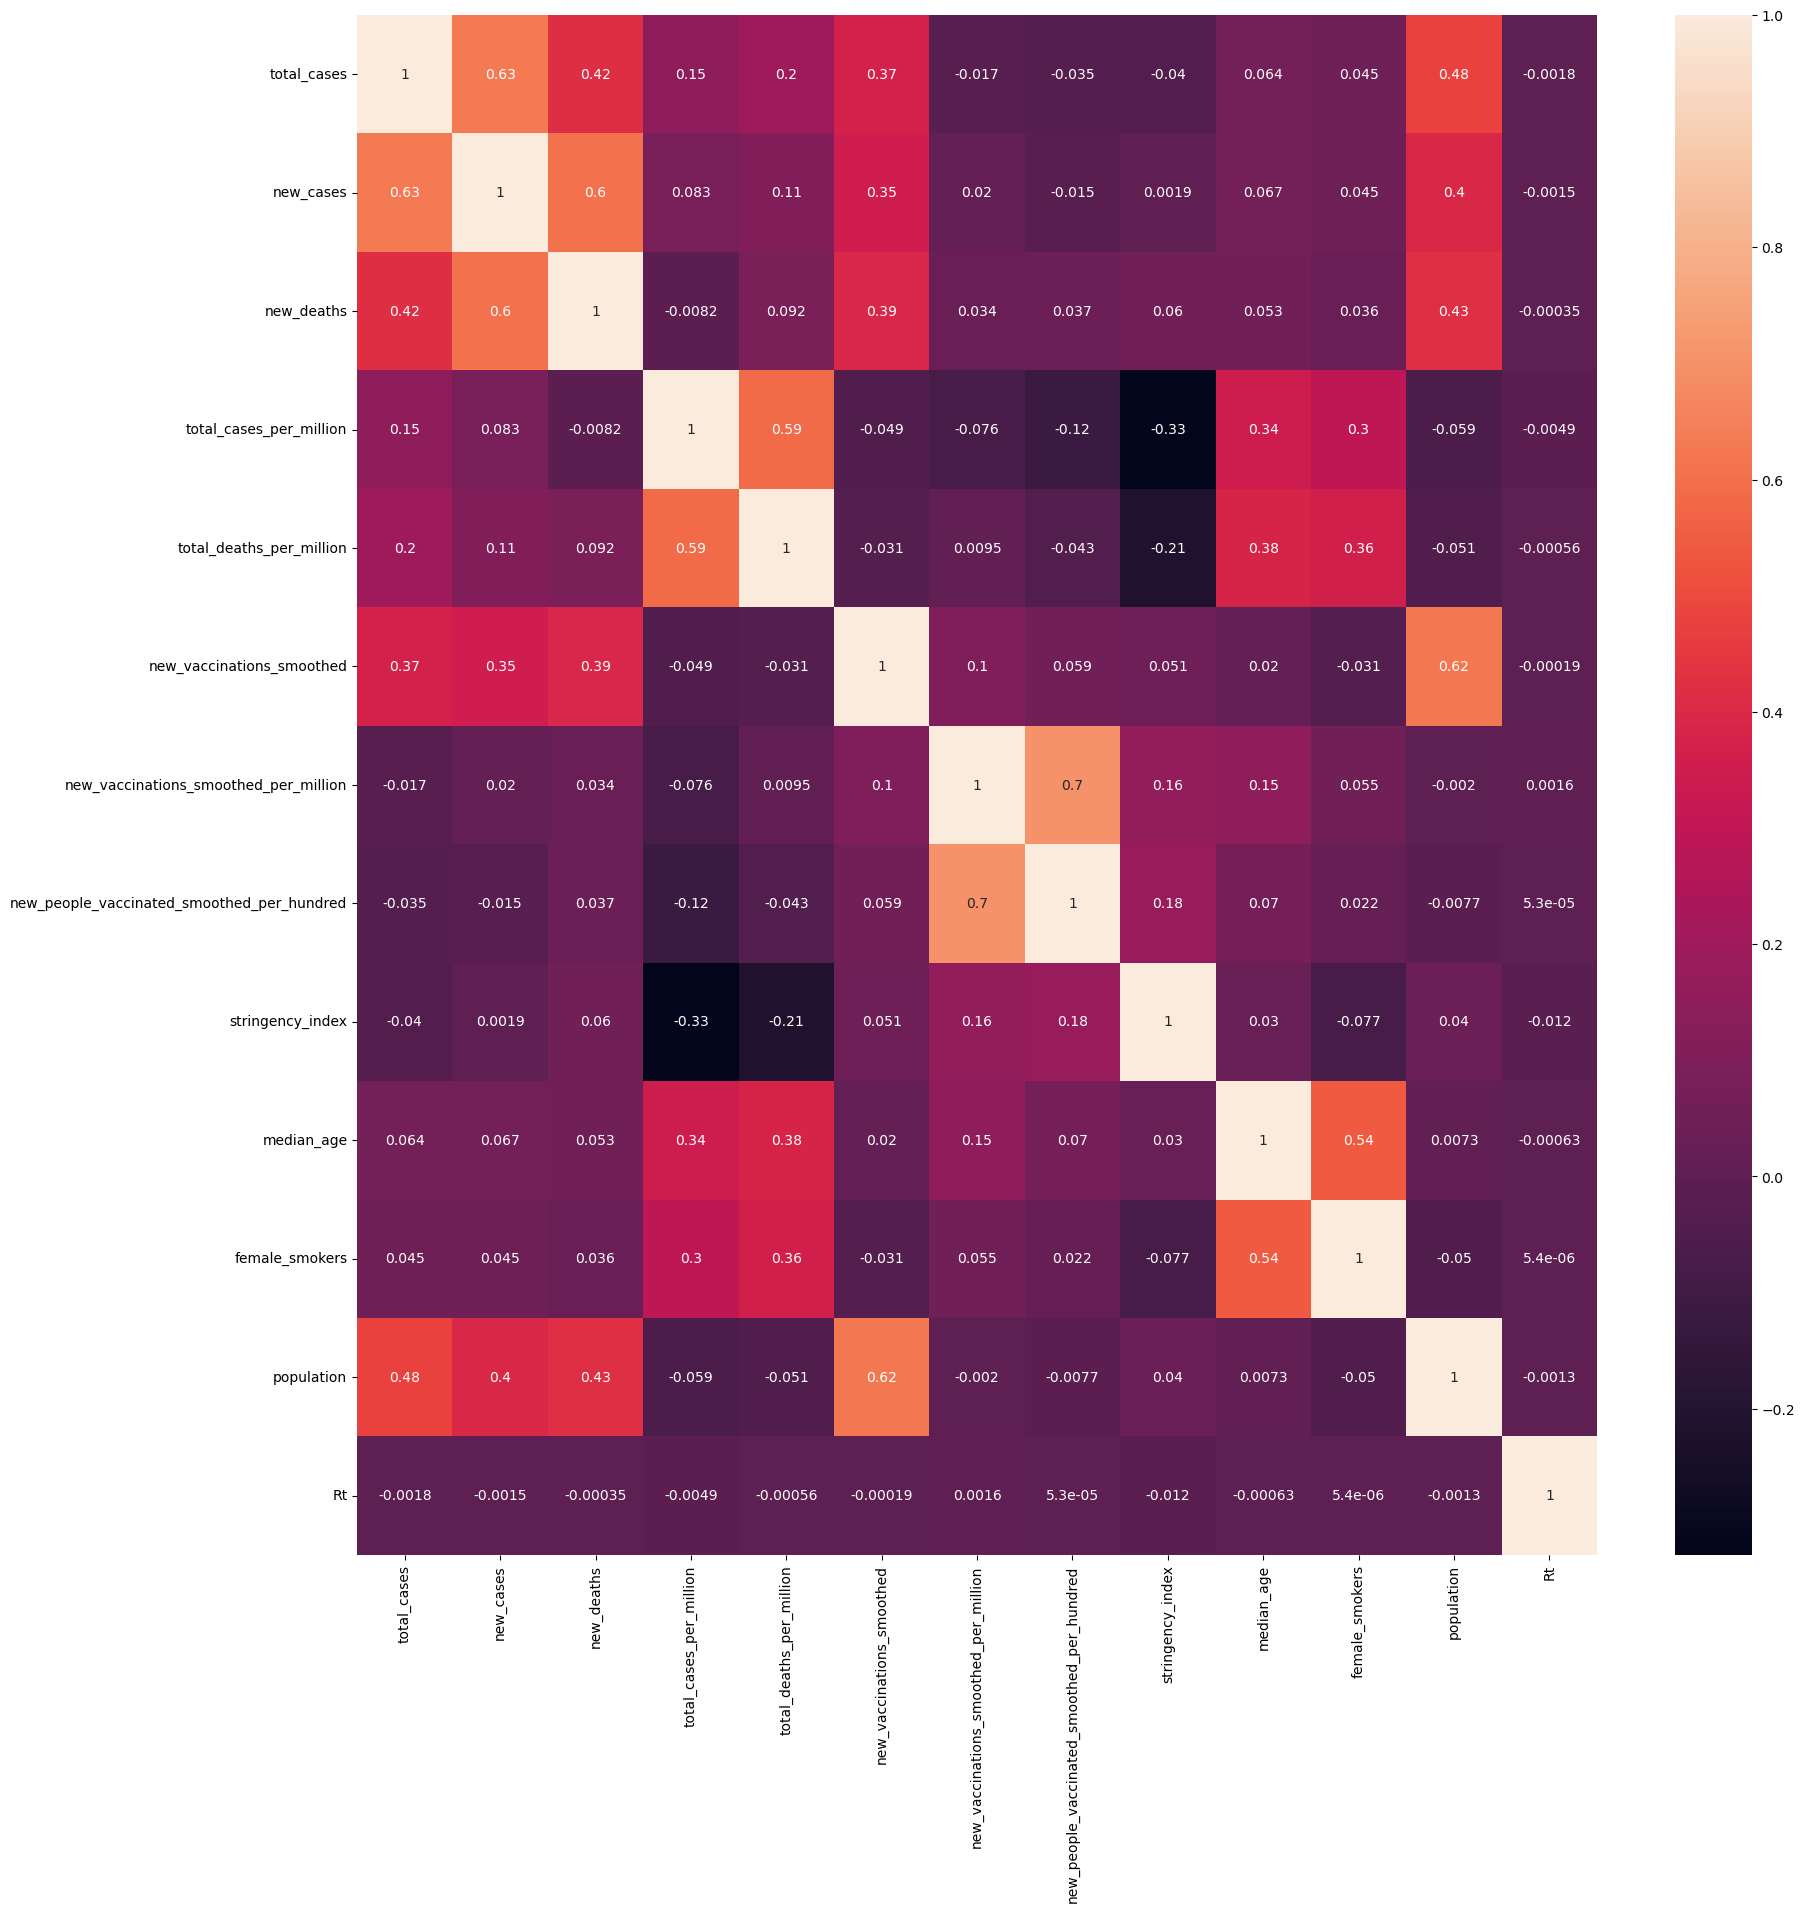

In [59]:
plt.figure(figsize = (20,20))
sns.heatmap(df_copy.drop(columns = ['continent', 'location','date']).corr(),annot = True)

Новый атрибут Rt очевидно поможет нам в исследовании эпидемиологической ситуации, хоть он и не коррелирует с остальными атрибутами по нему можно определить как covid19 распространяется в последние 8 дней и определить насколько плохая ситуация сейчас в стране

# 1.5

Удаляем данные с выбросами по формуле верхней и нижней границы уса в графике 'Ящик с усами'

In [78]:
upper = 0
lower = 0
def delete_of_abnormal(ini_df):
    work_val = ini_df.copy()
    if work_val.dtypes!=np.object:
        Q1 = np.percentile(work_val, 25, interpolation = 'midpoint')
        Q3 = np.percentile(work_val, 75, interpolation = 'midpoint')
        IQR = Q3-Q1
        global upper
        global lower
        upper = Q3+1.5*IQR
        lower = Q1-1.5*IQR                                                        
    return upper,lower

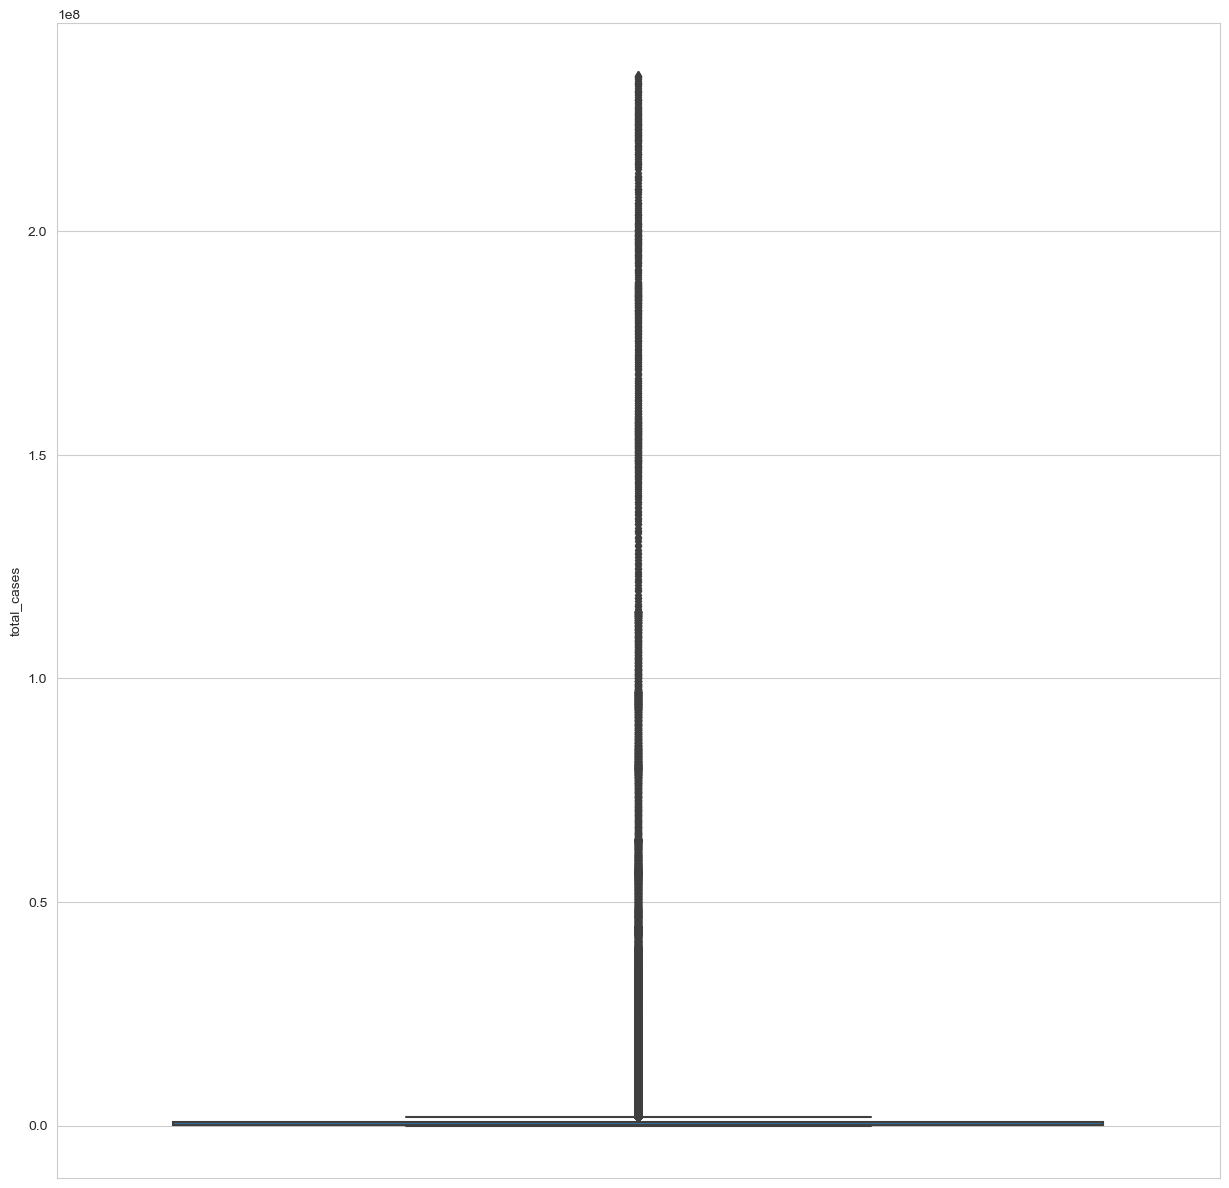

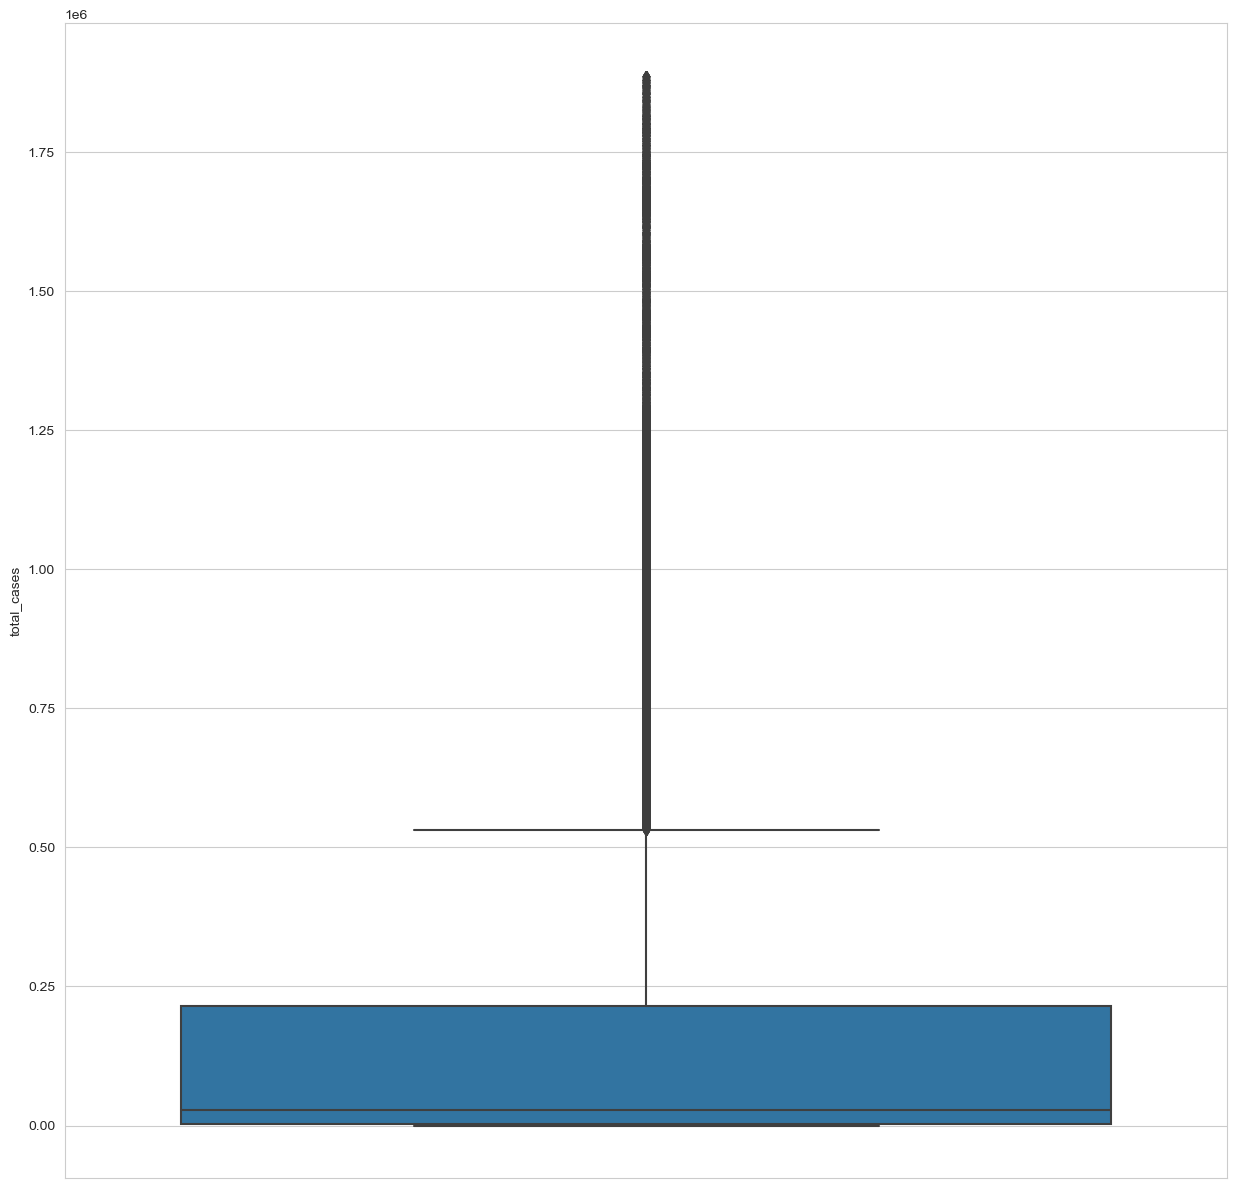

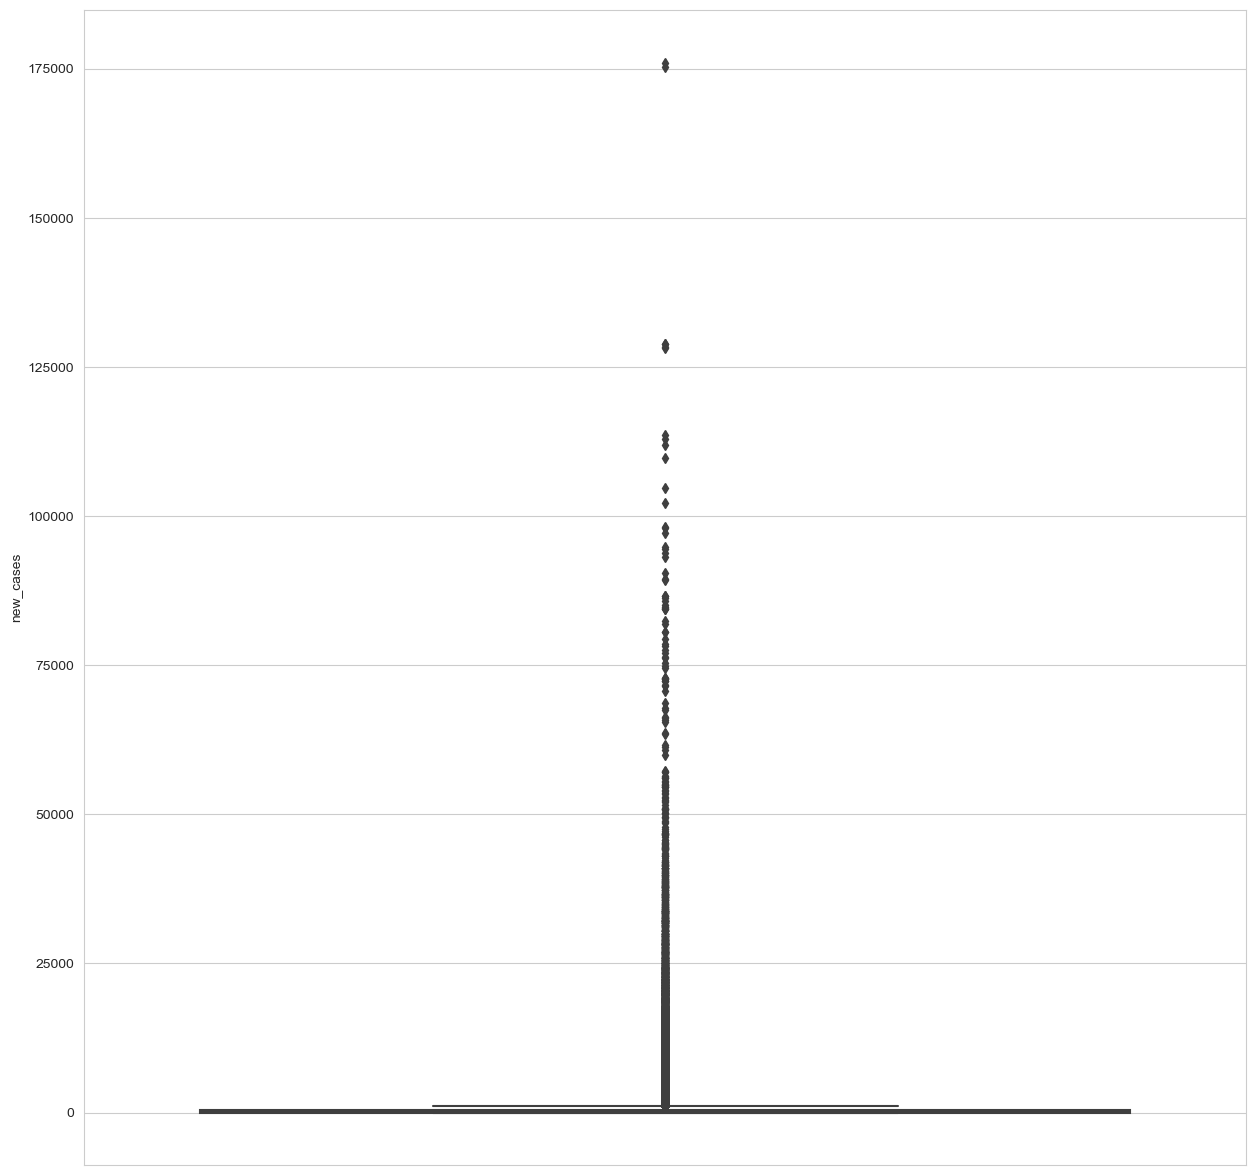

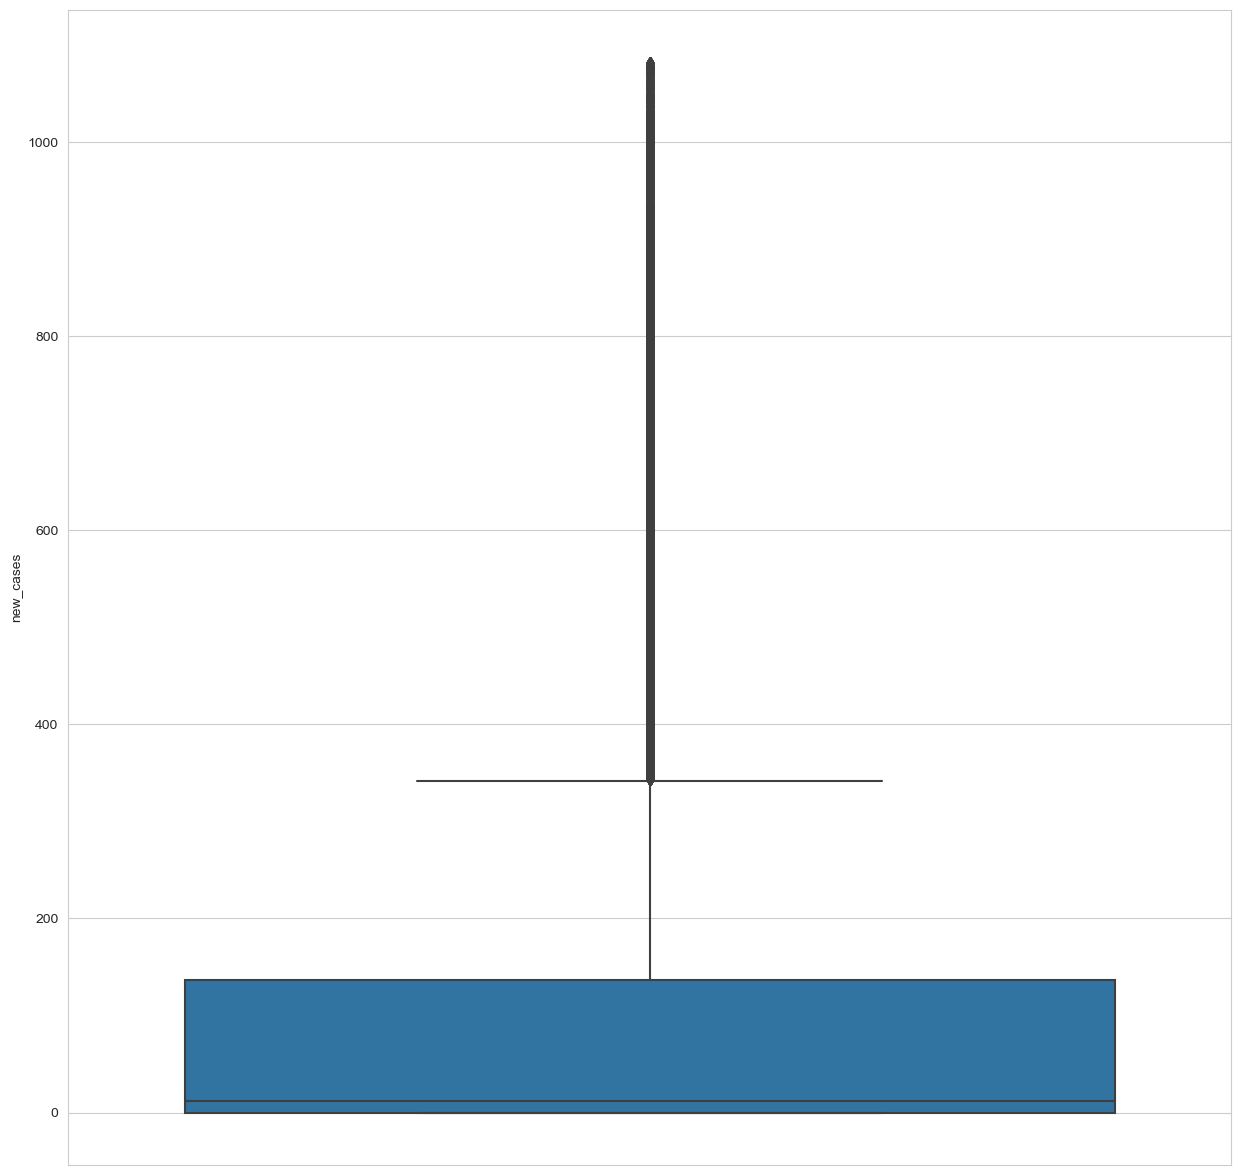

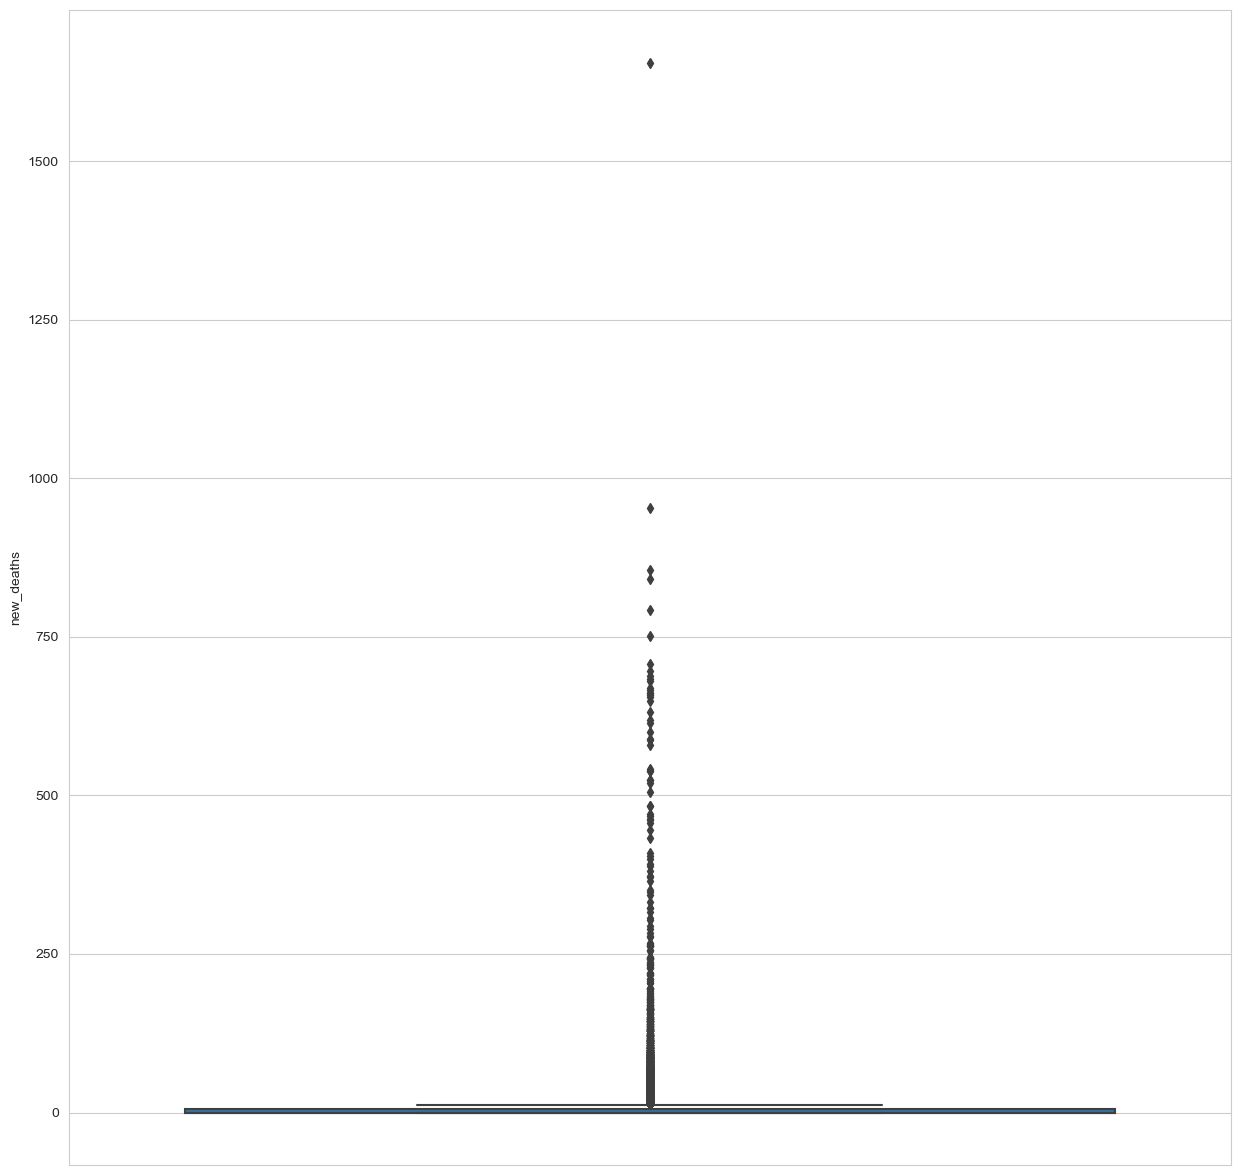

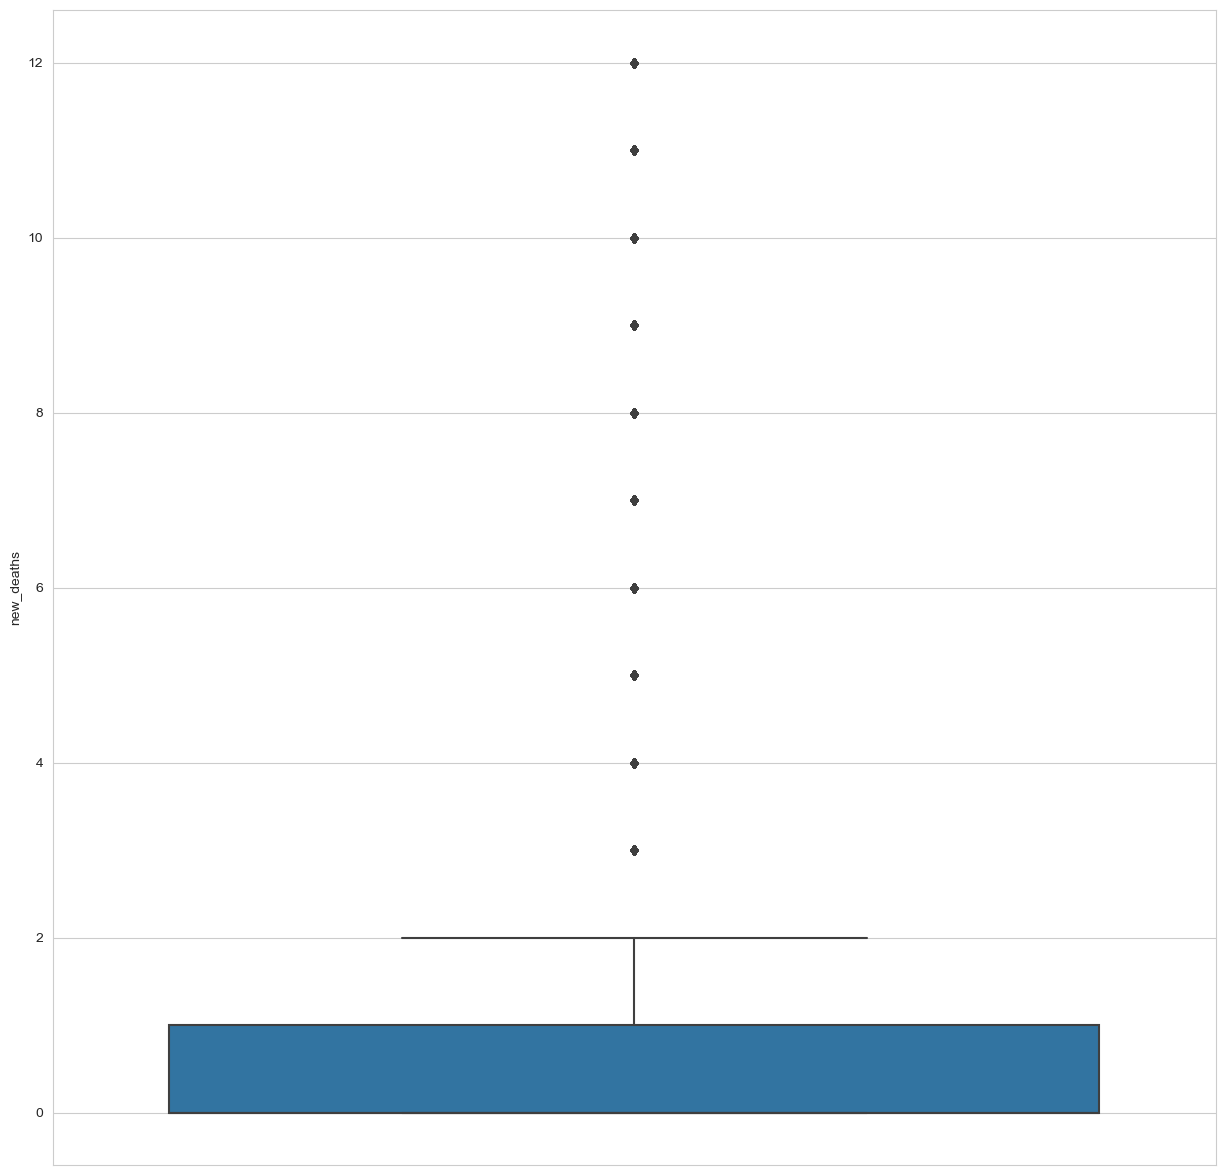

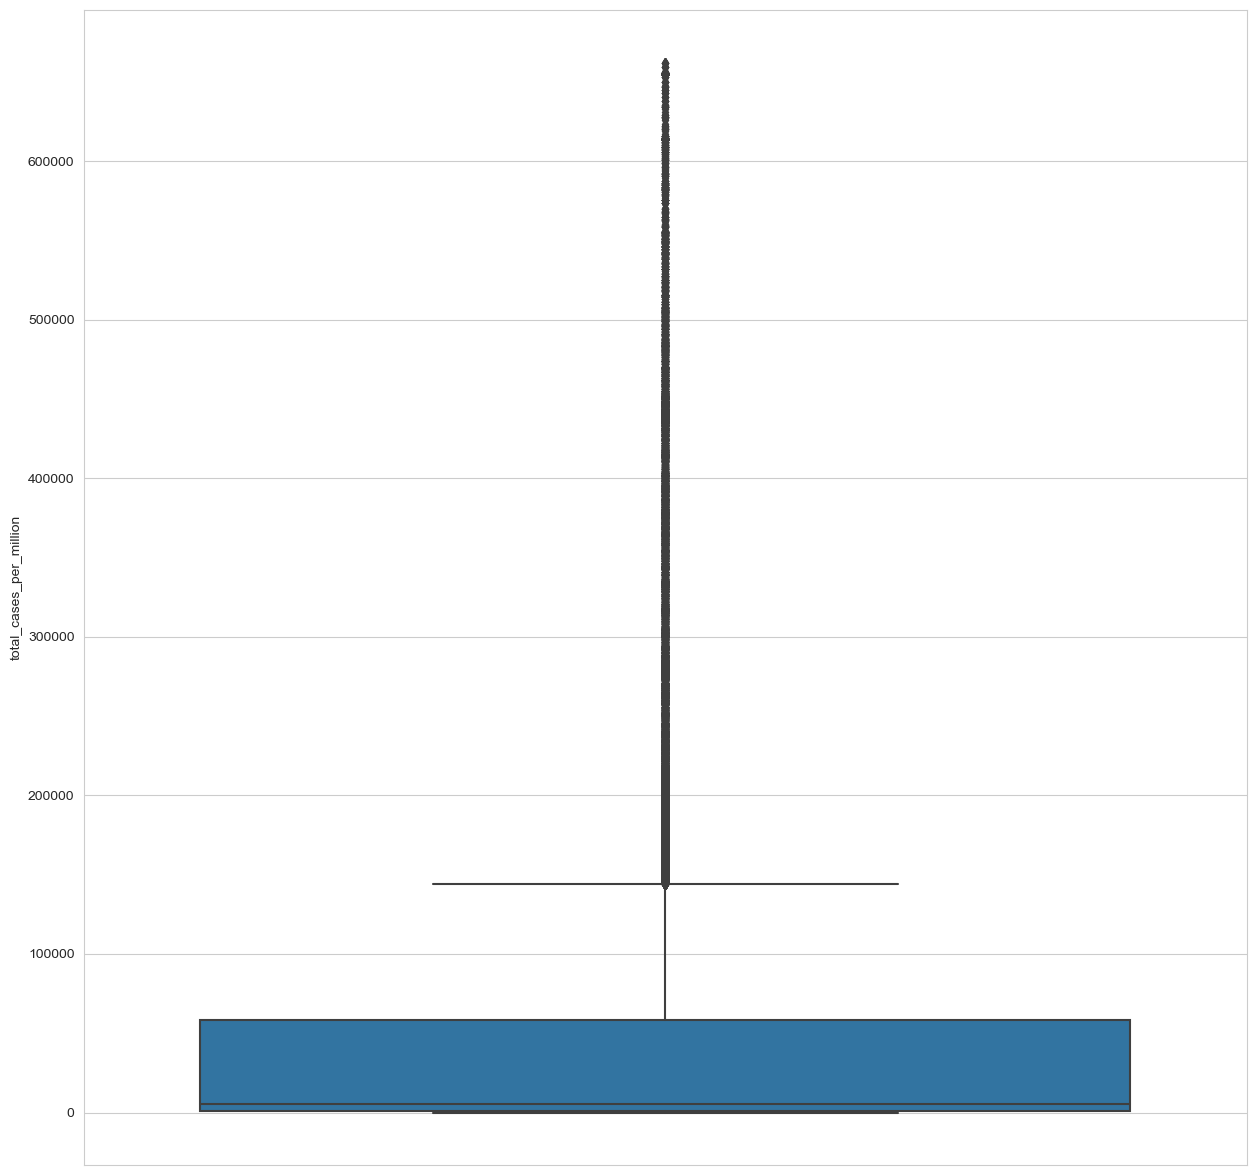

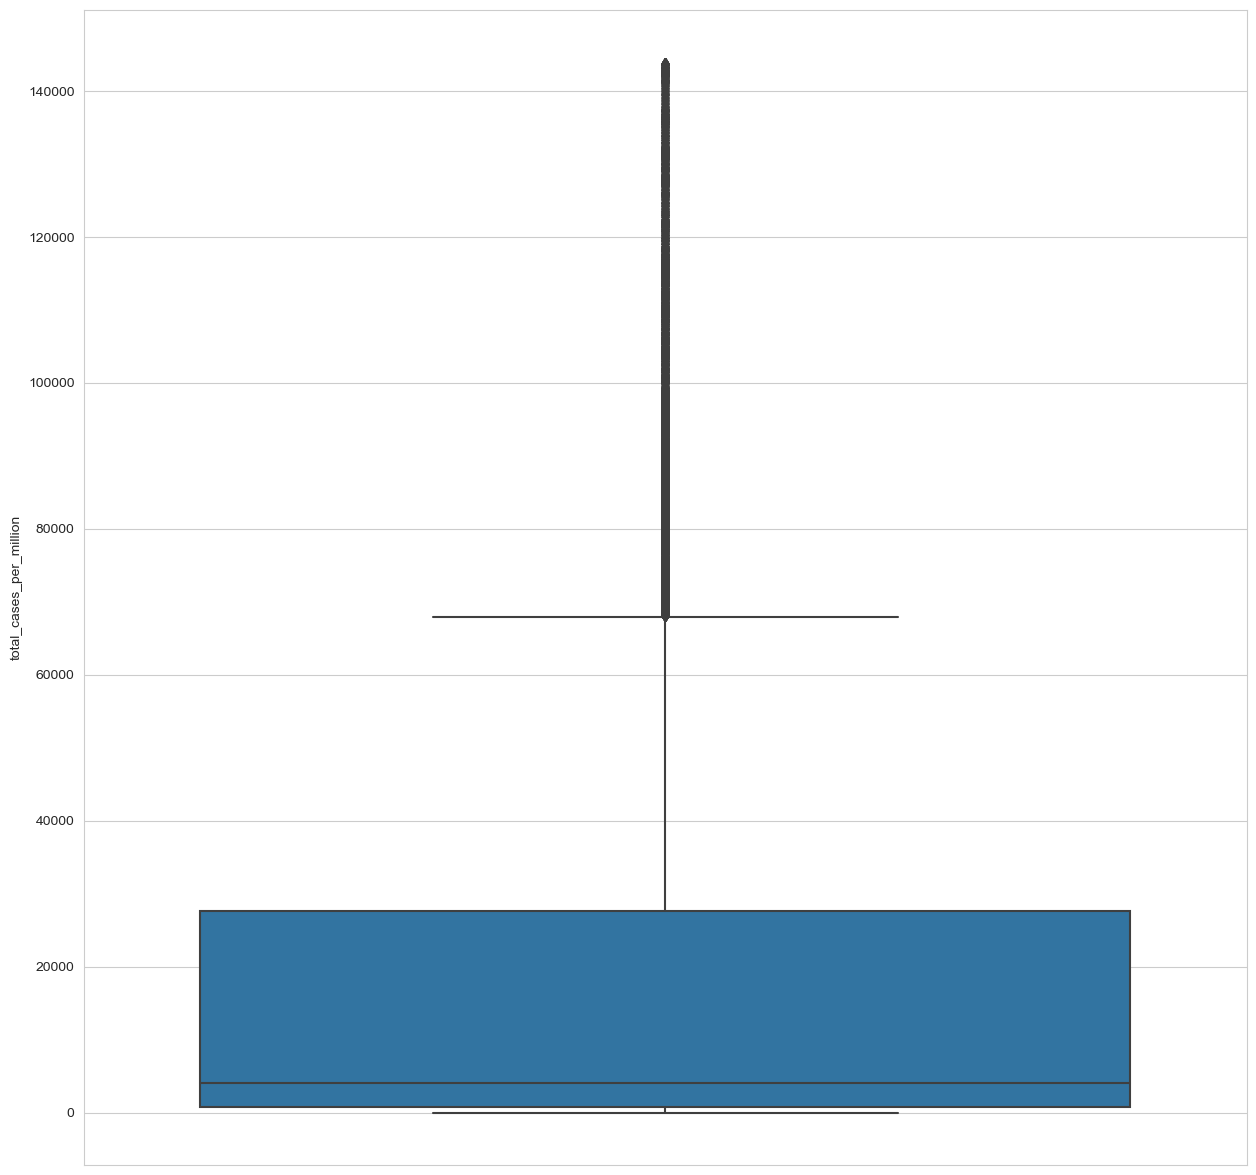

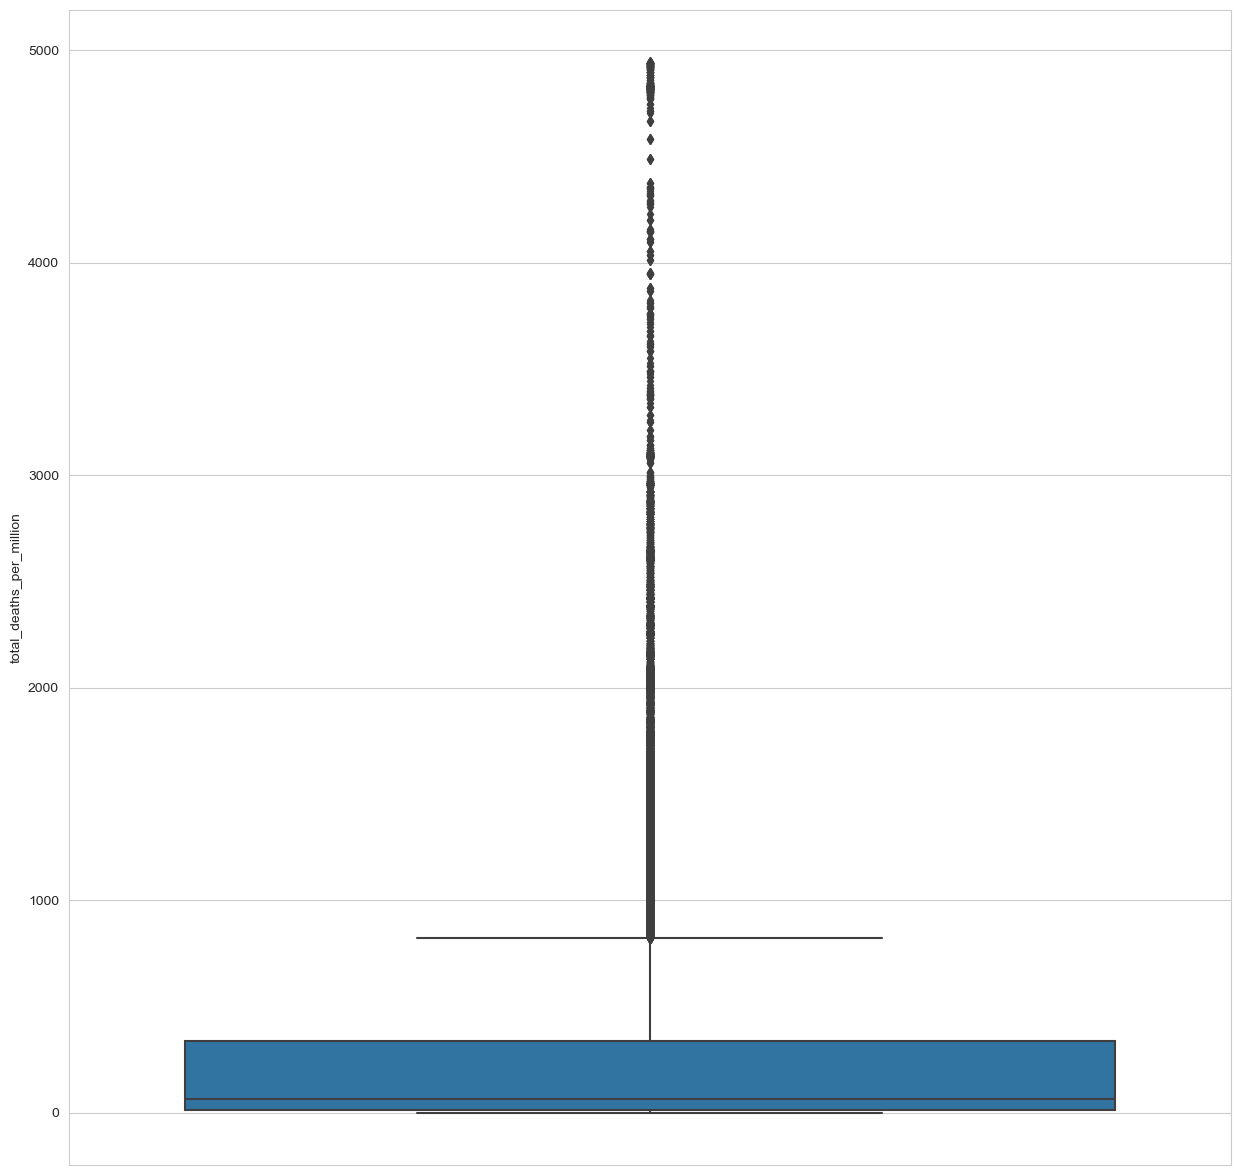

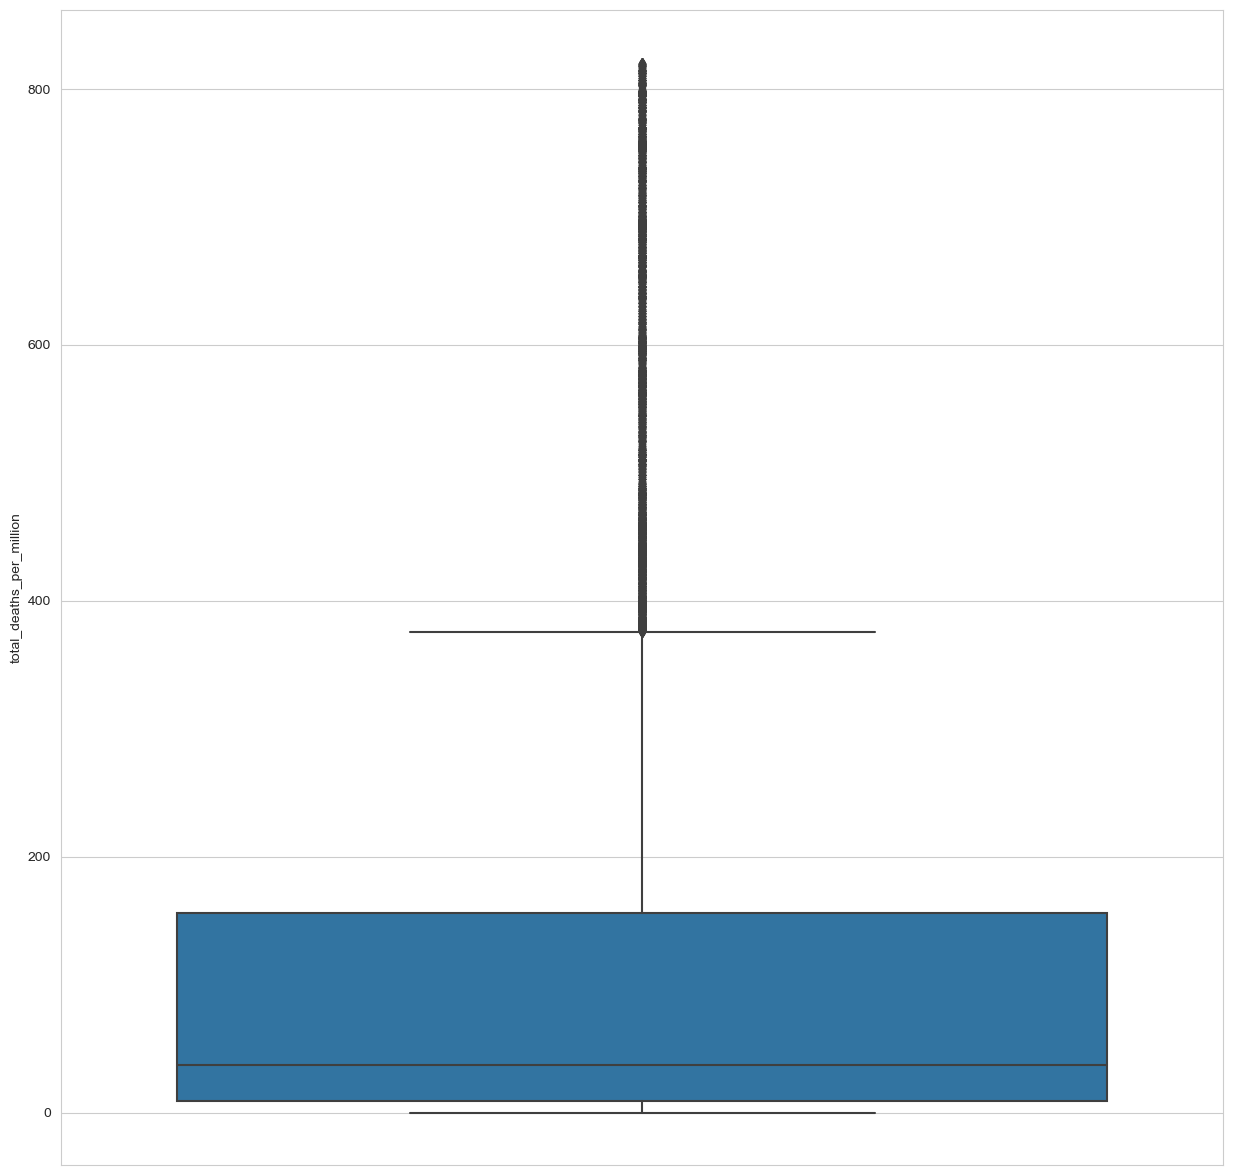

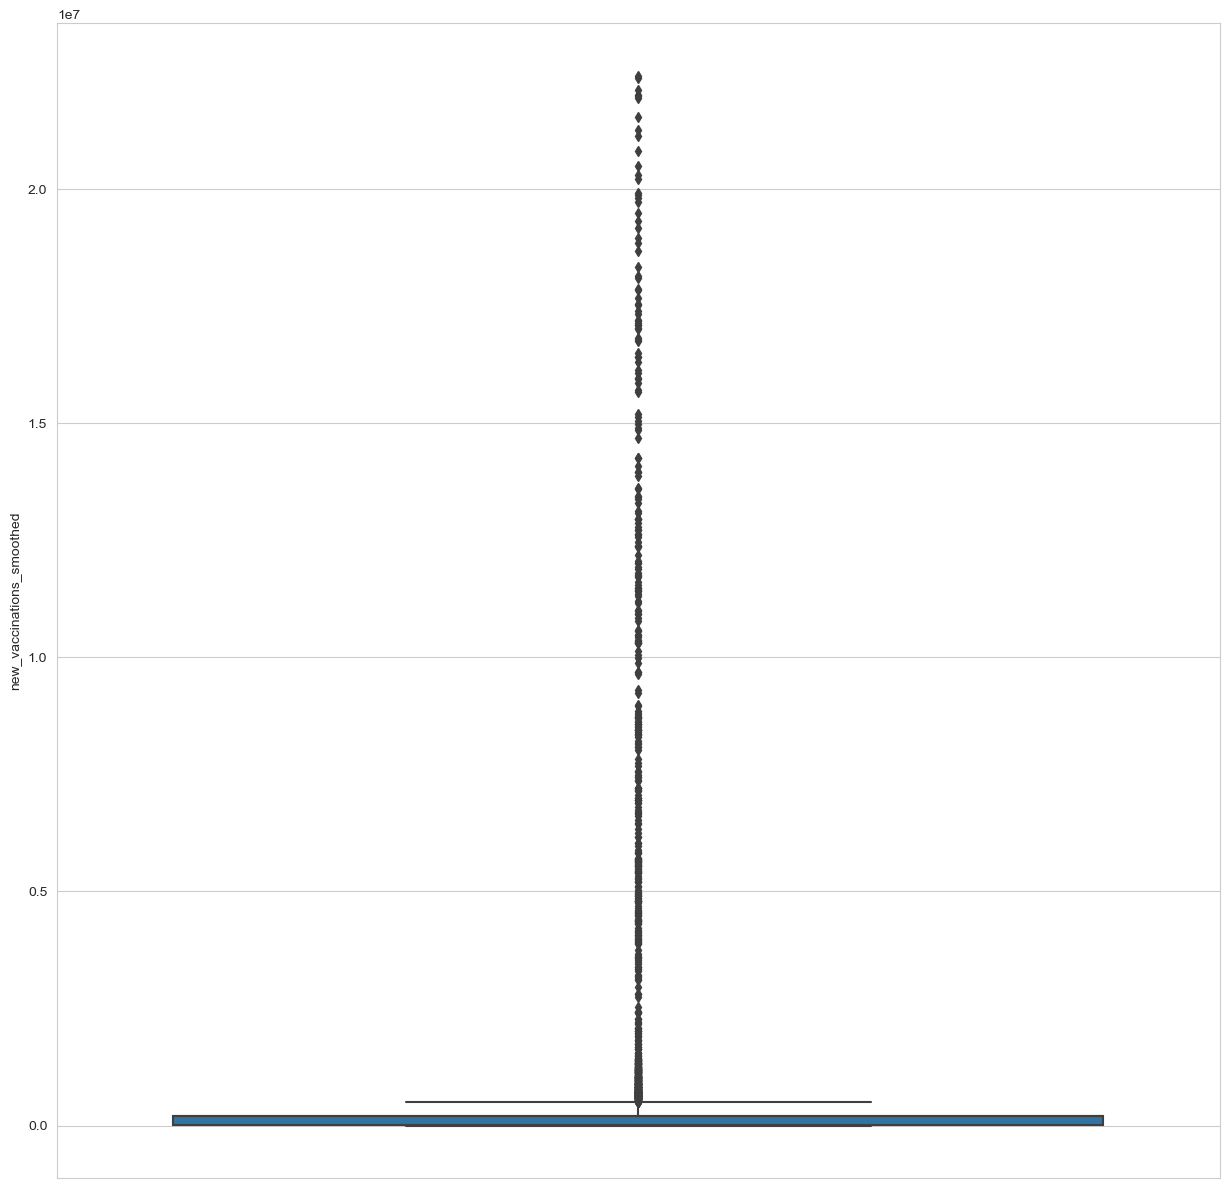

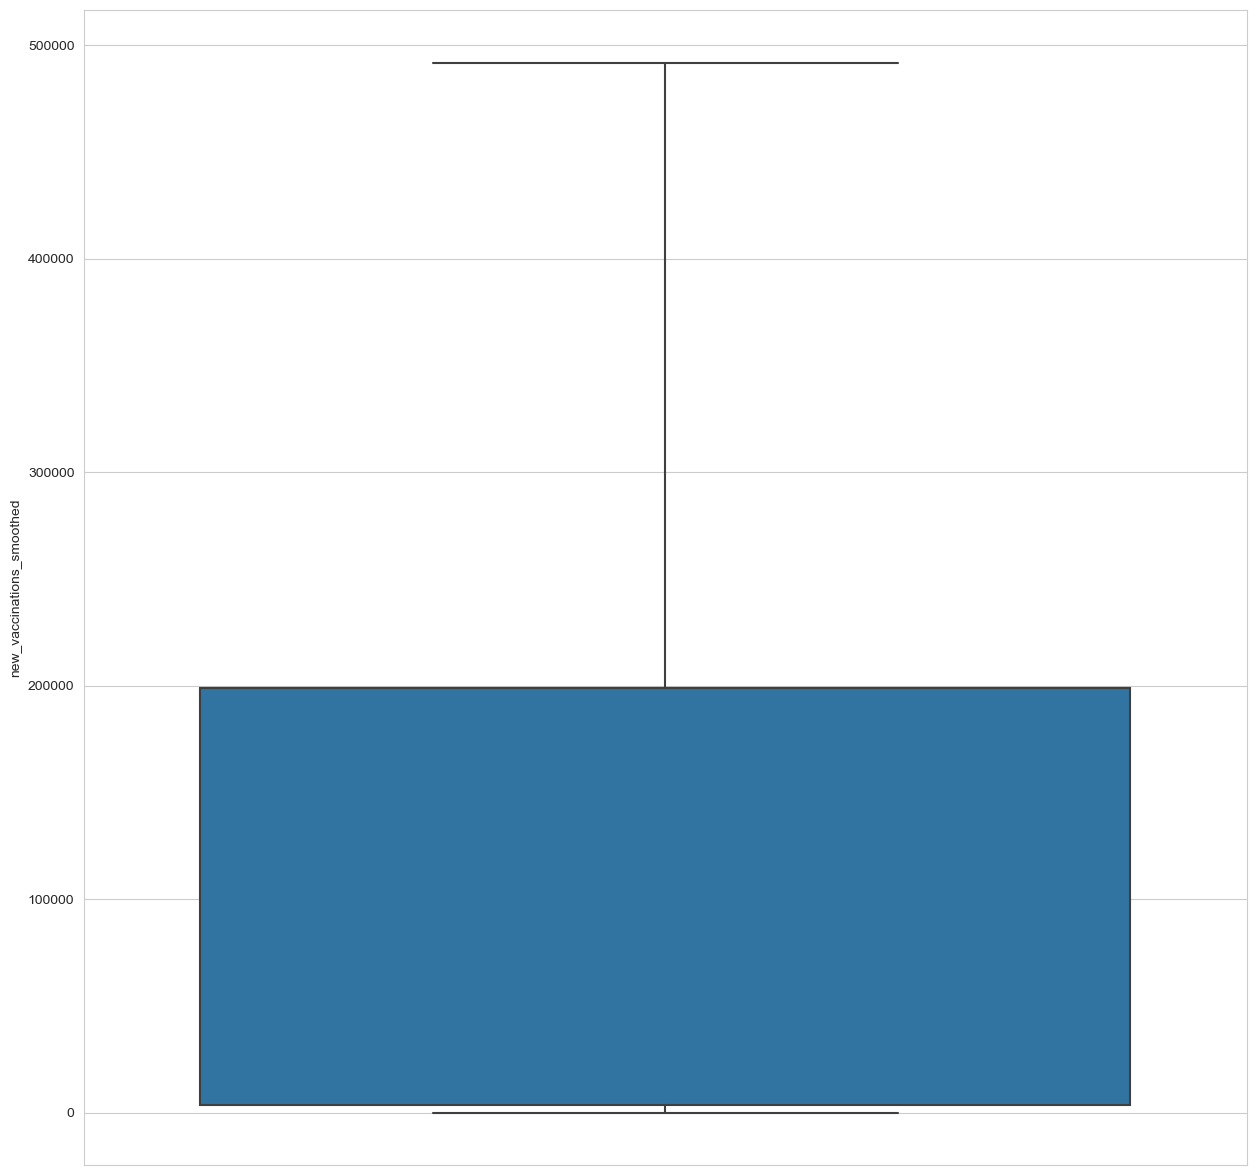

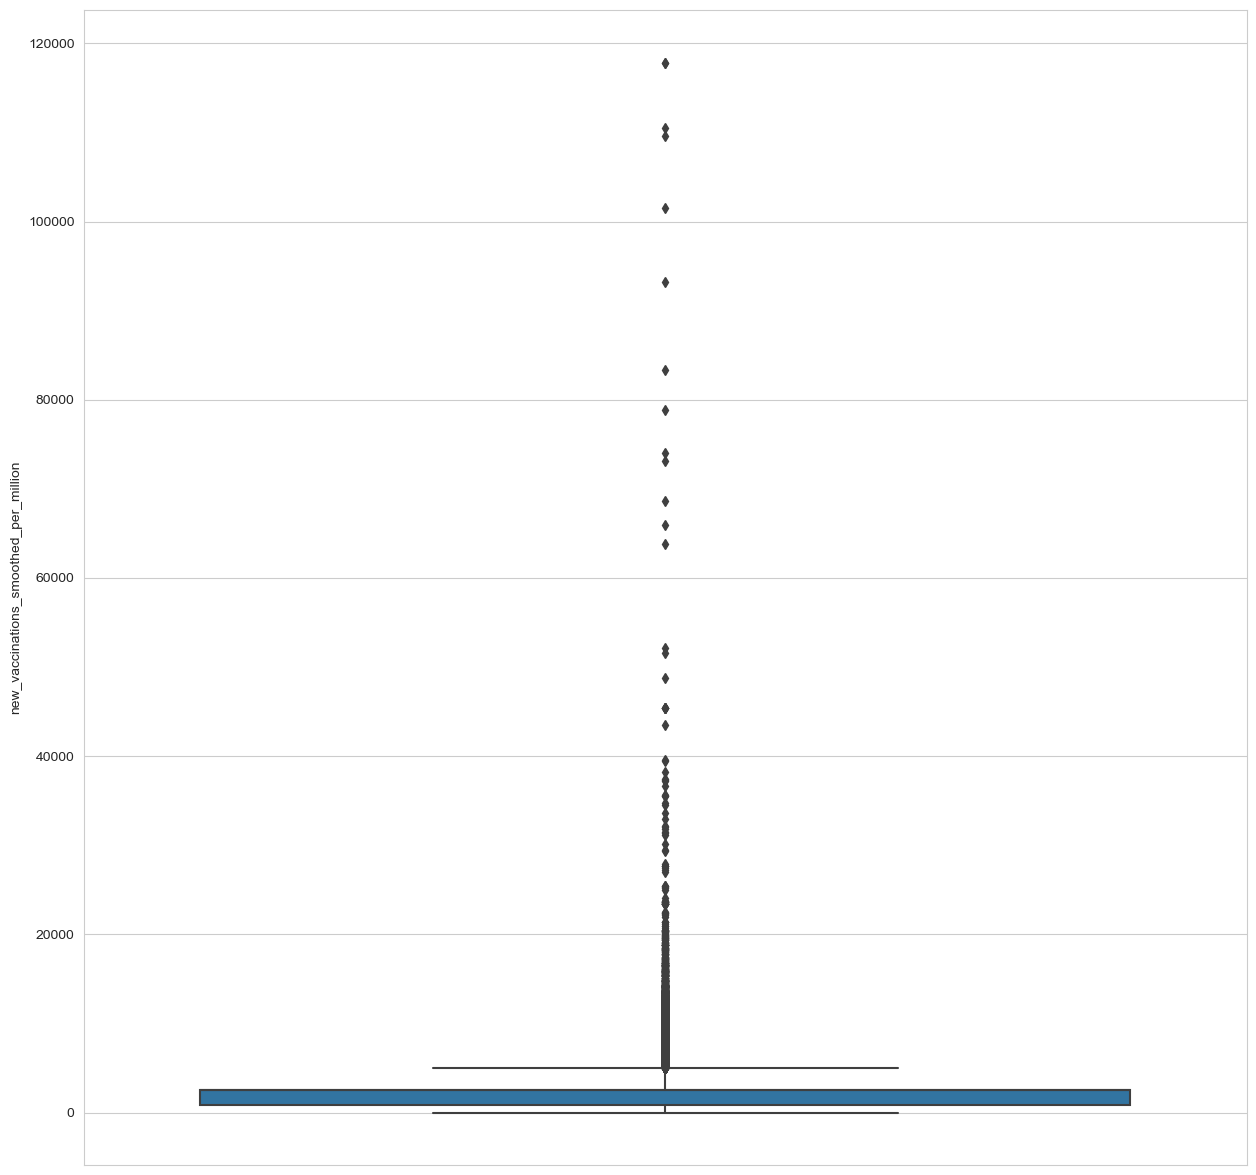

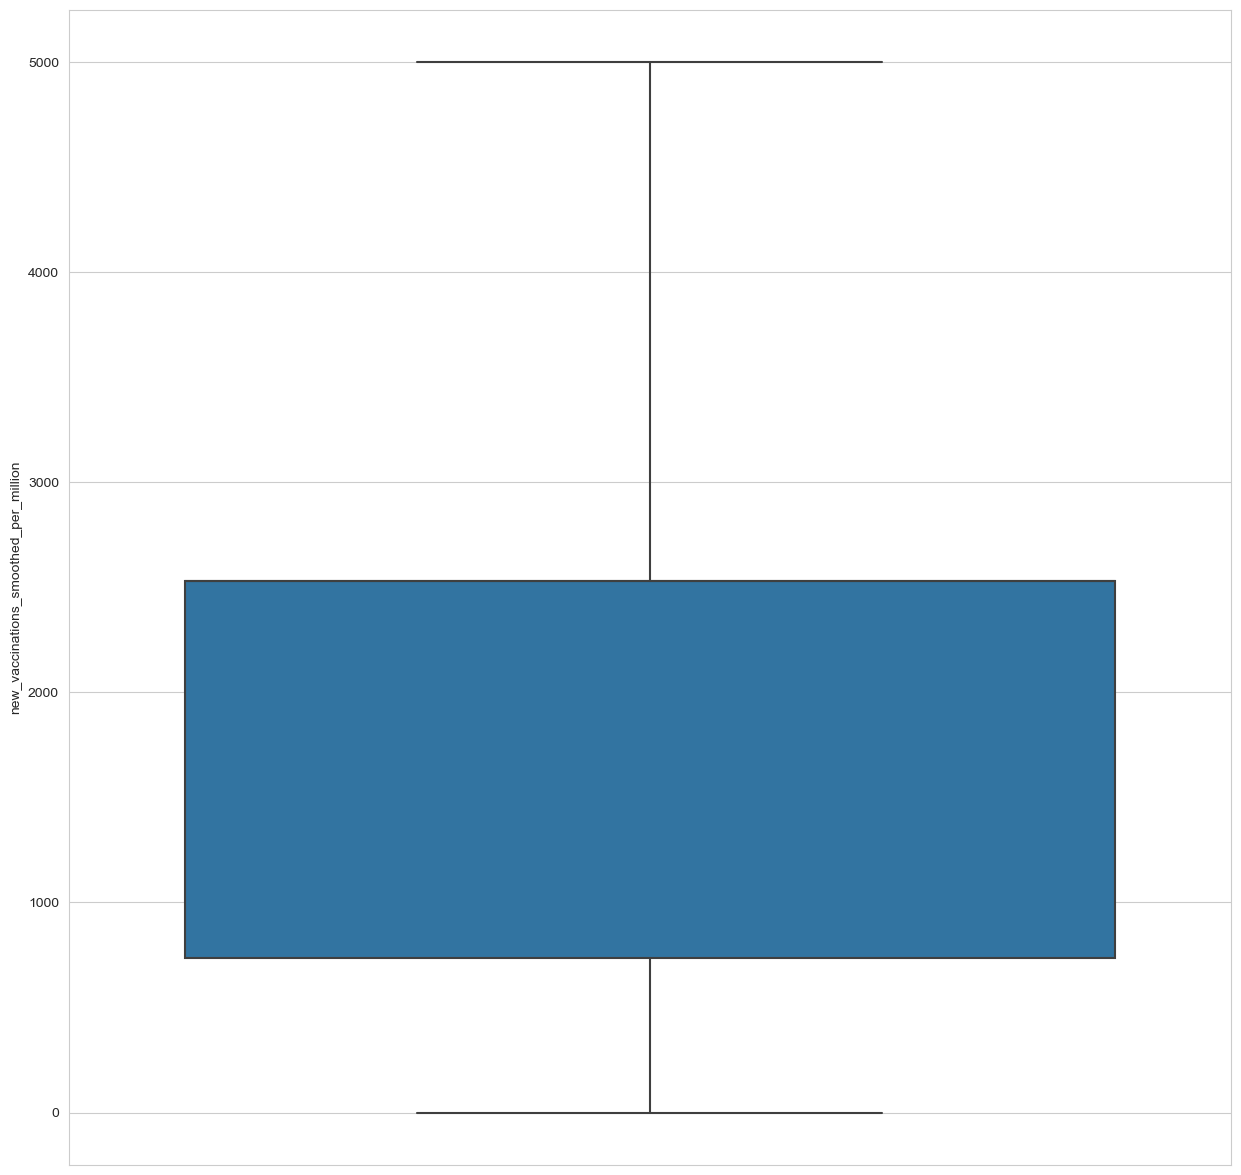

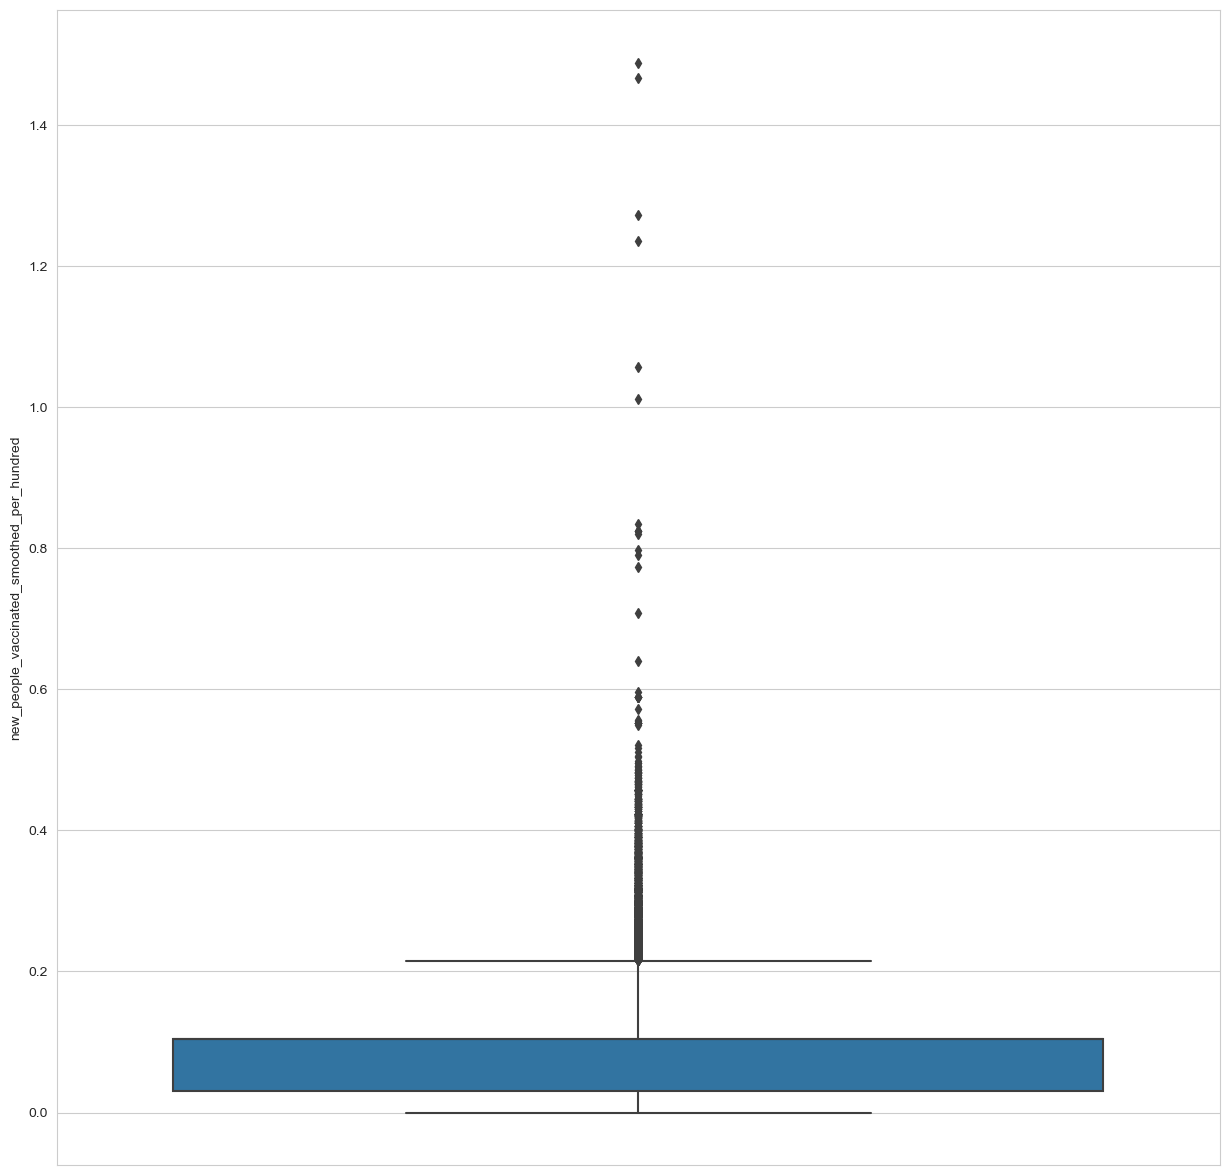

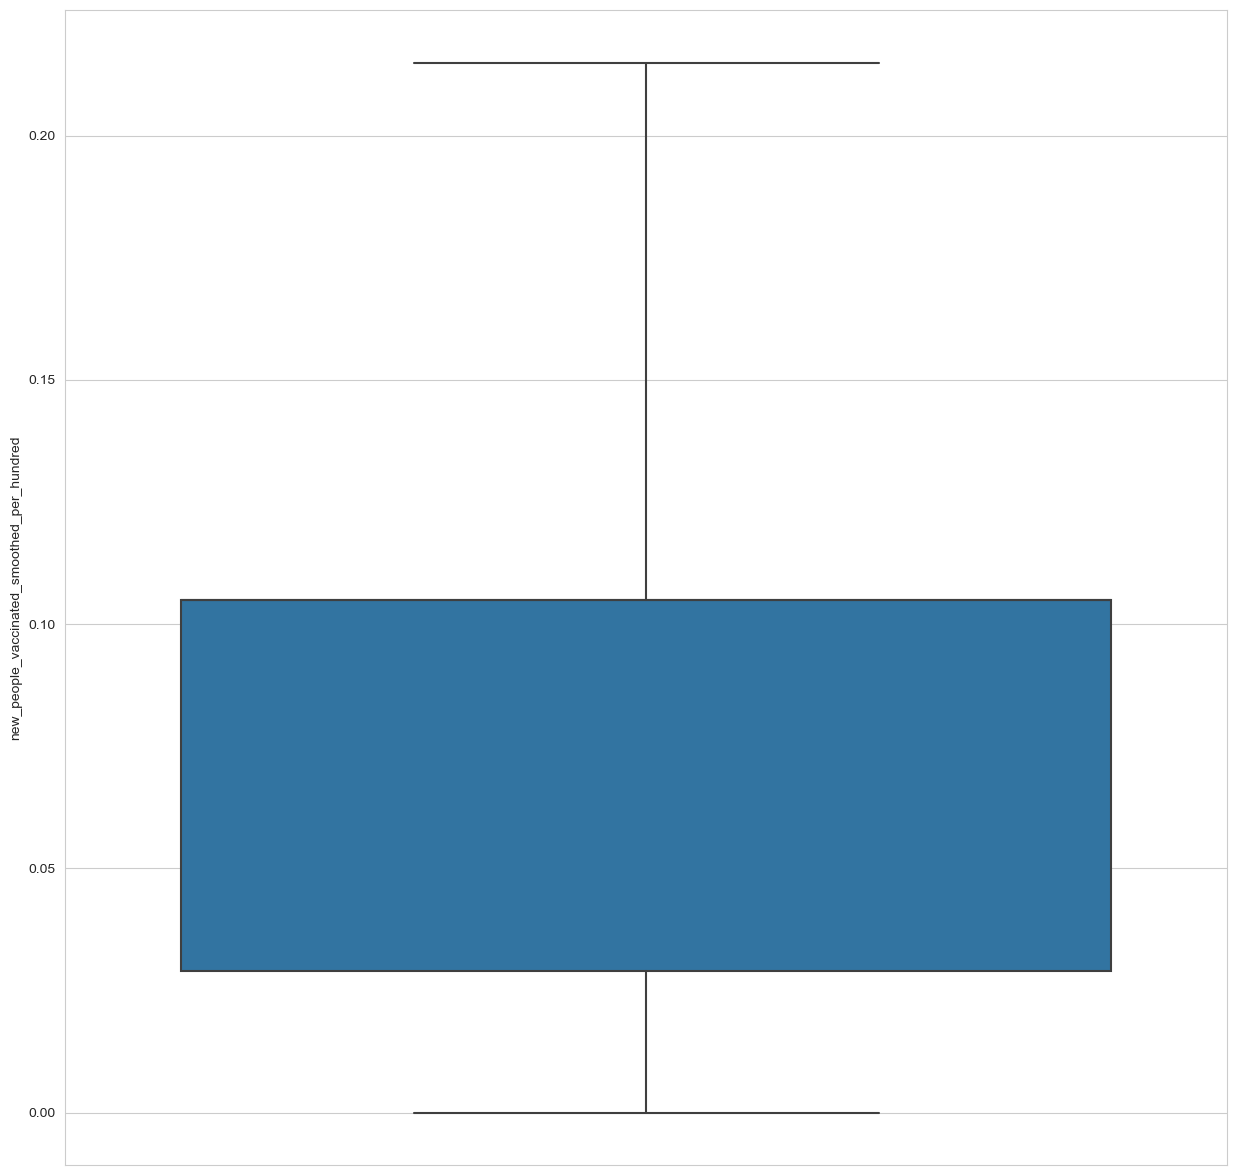

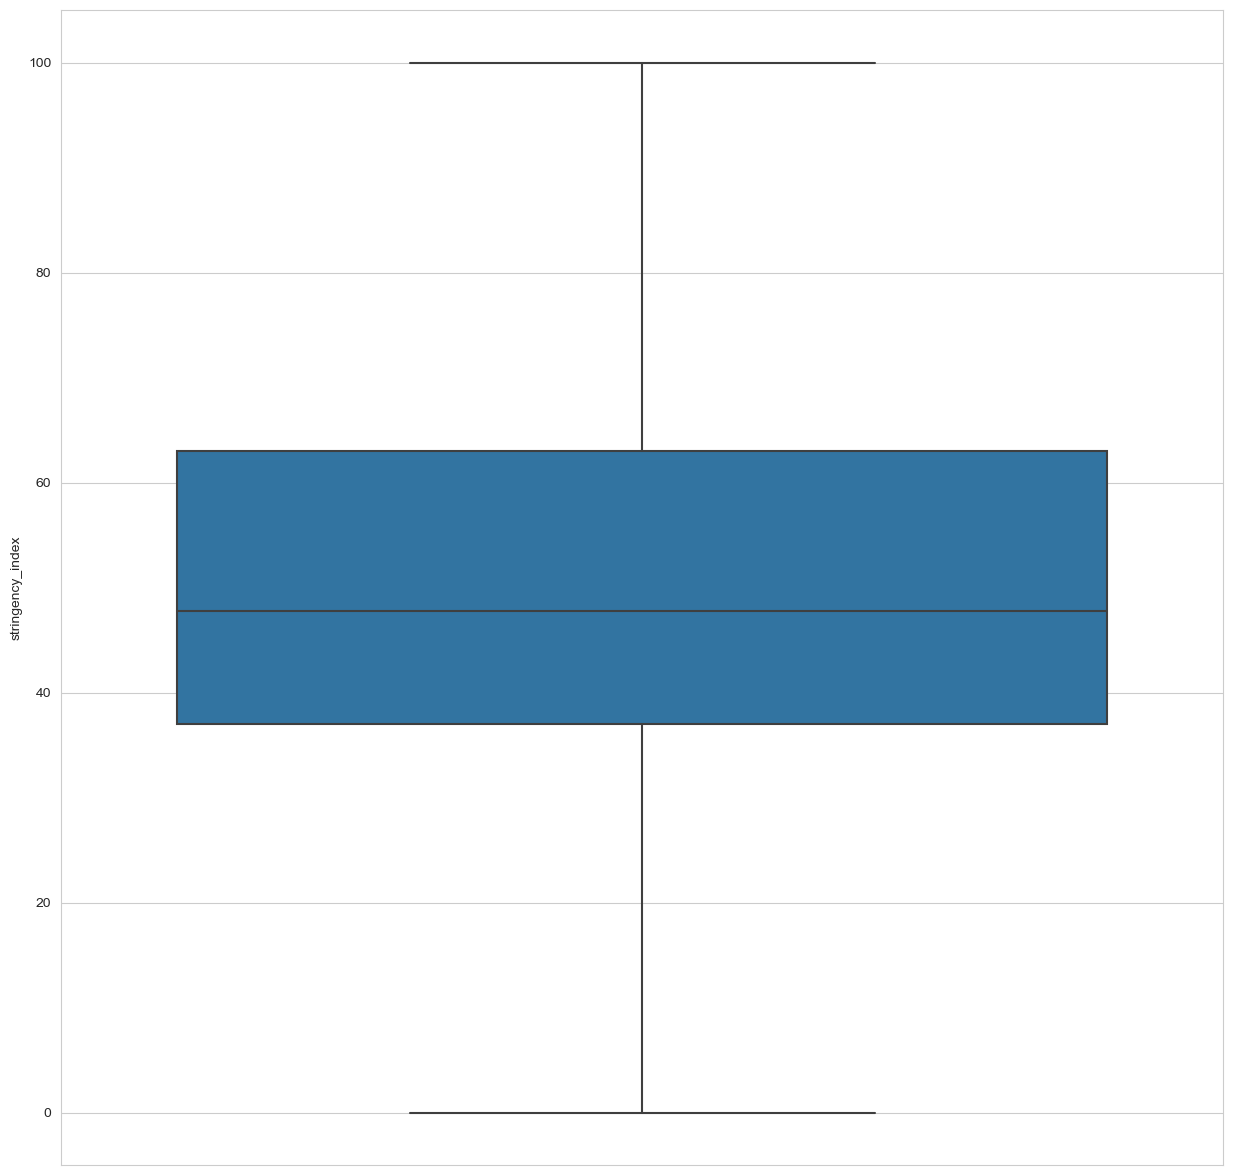

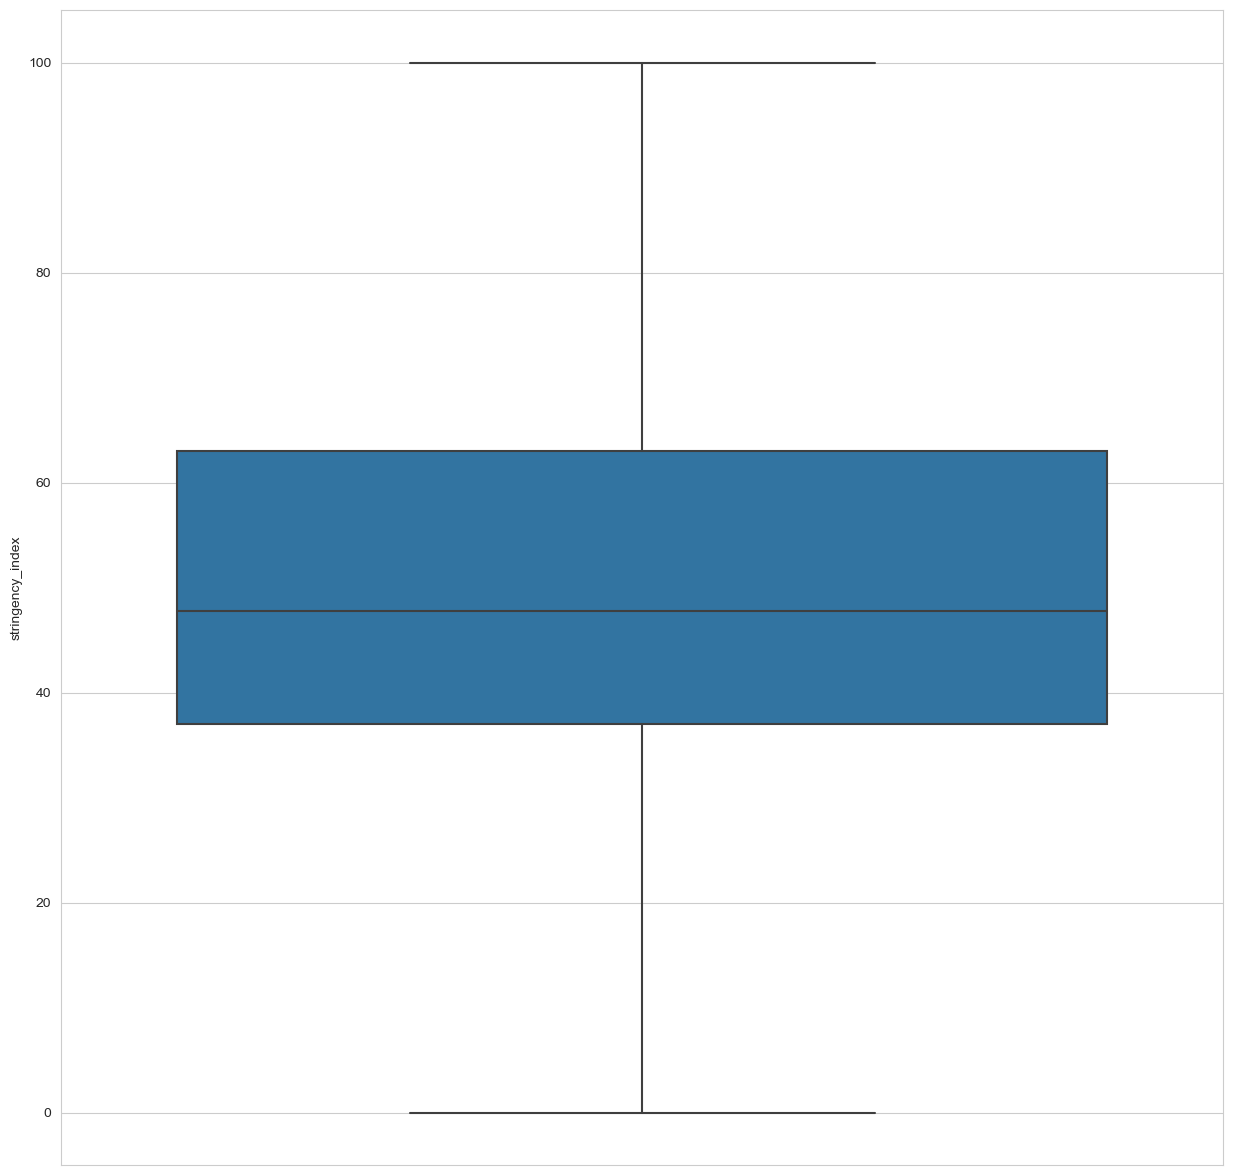

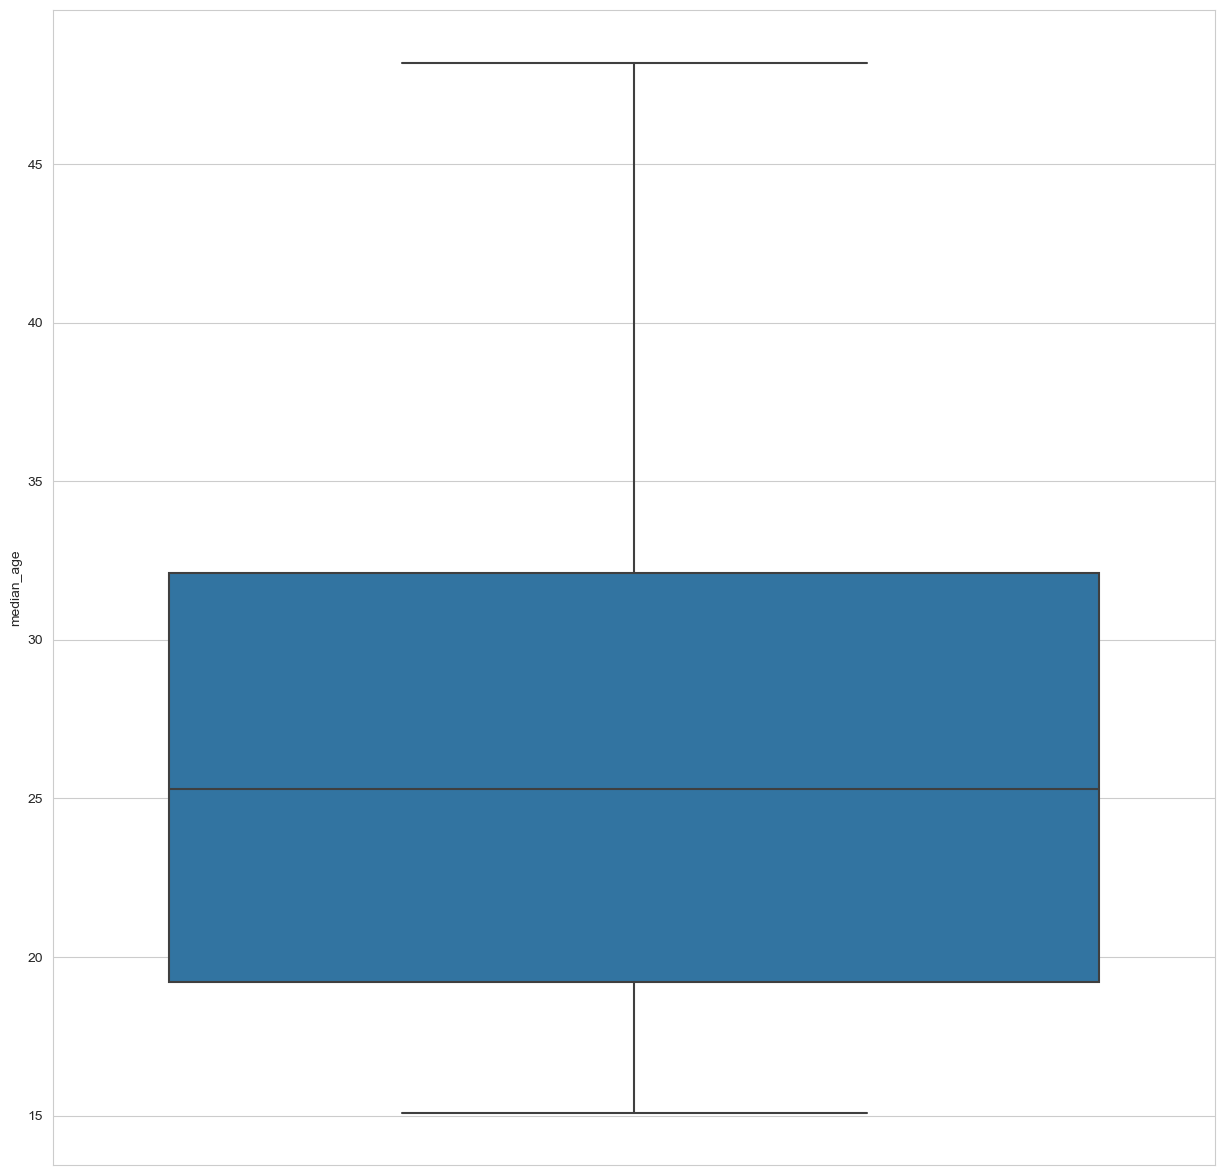

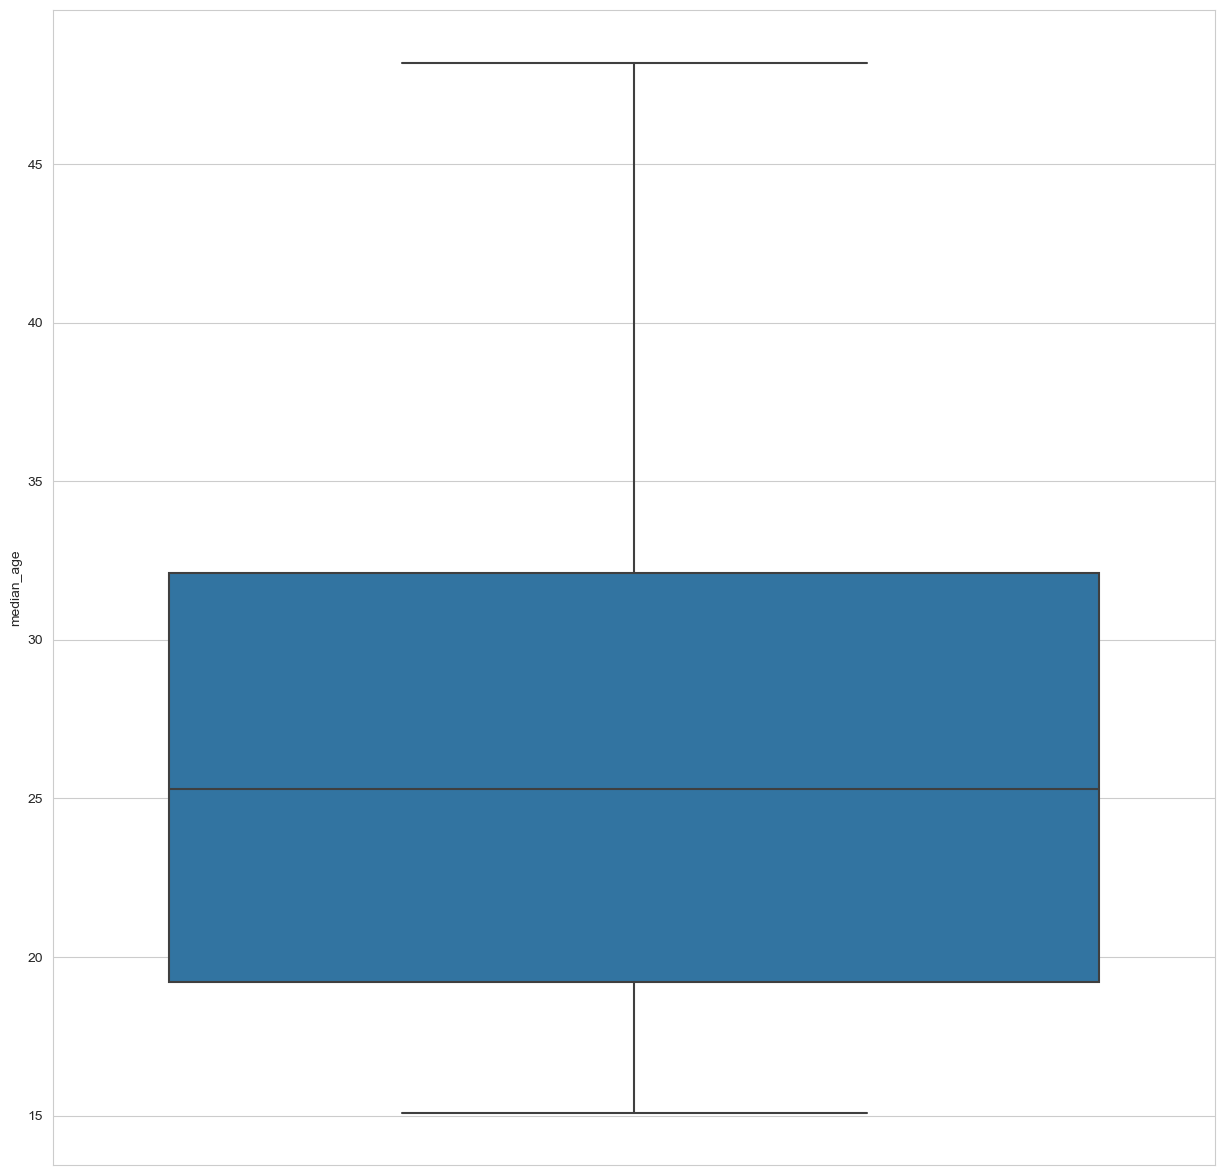

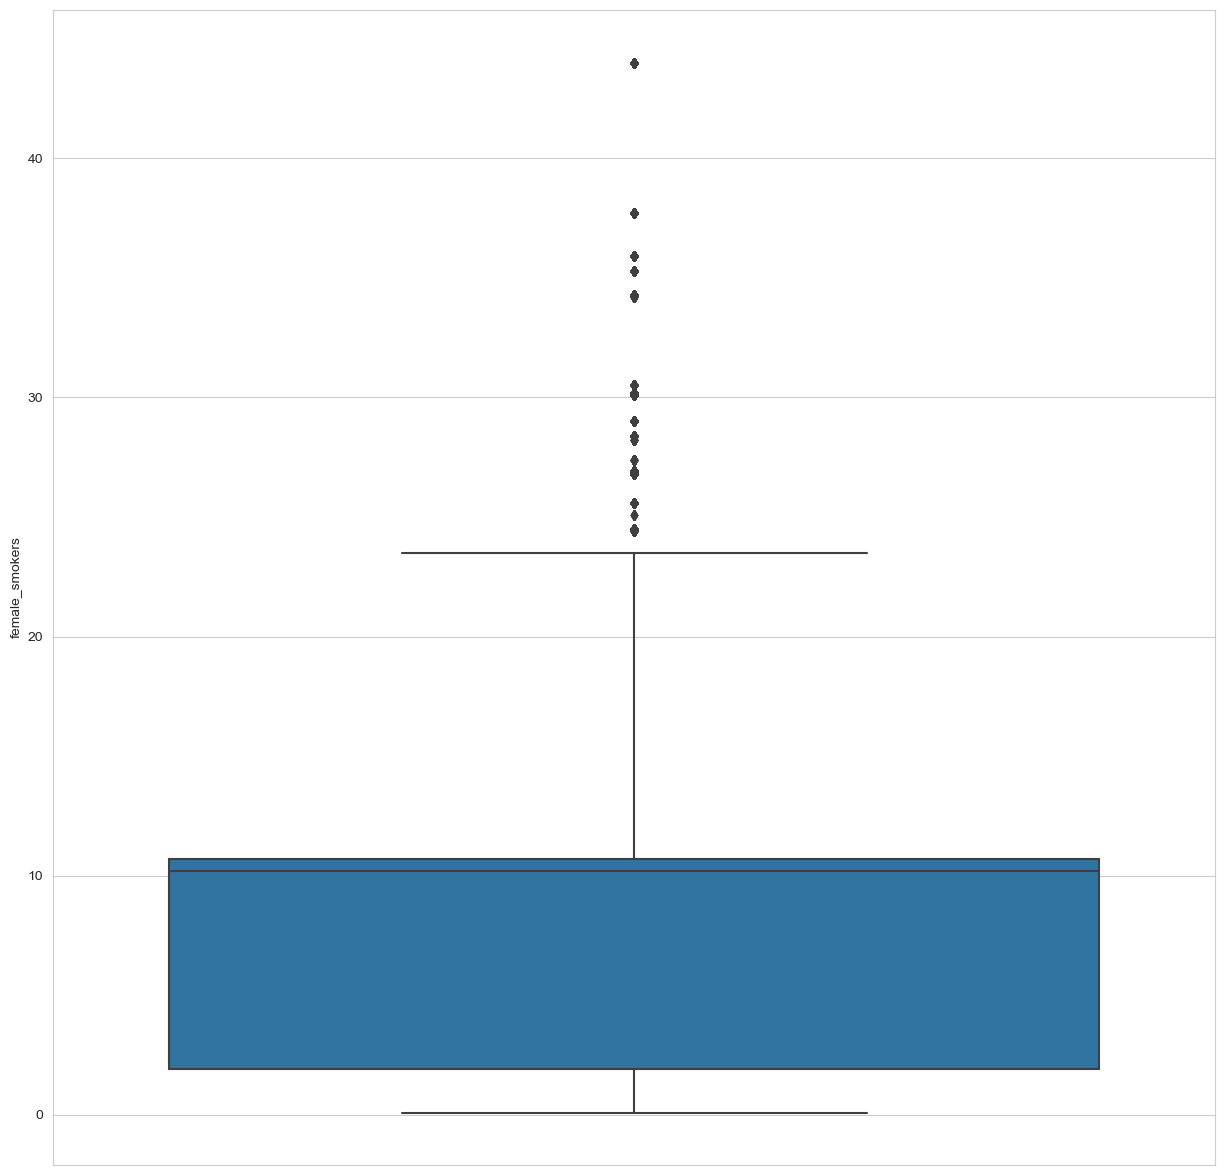

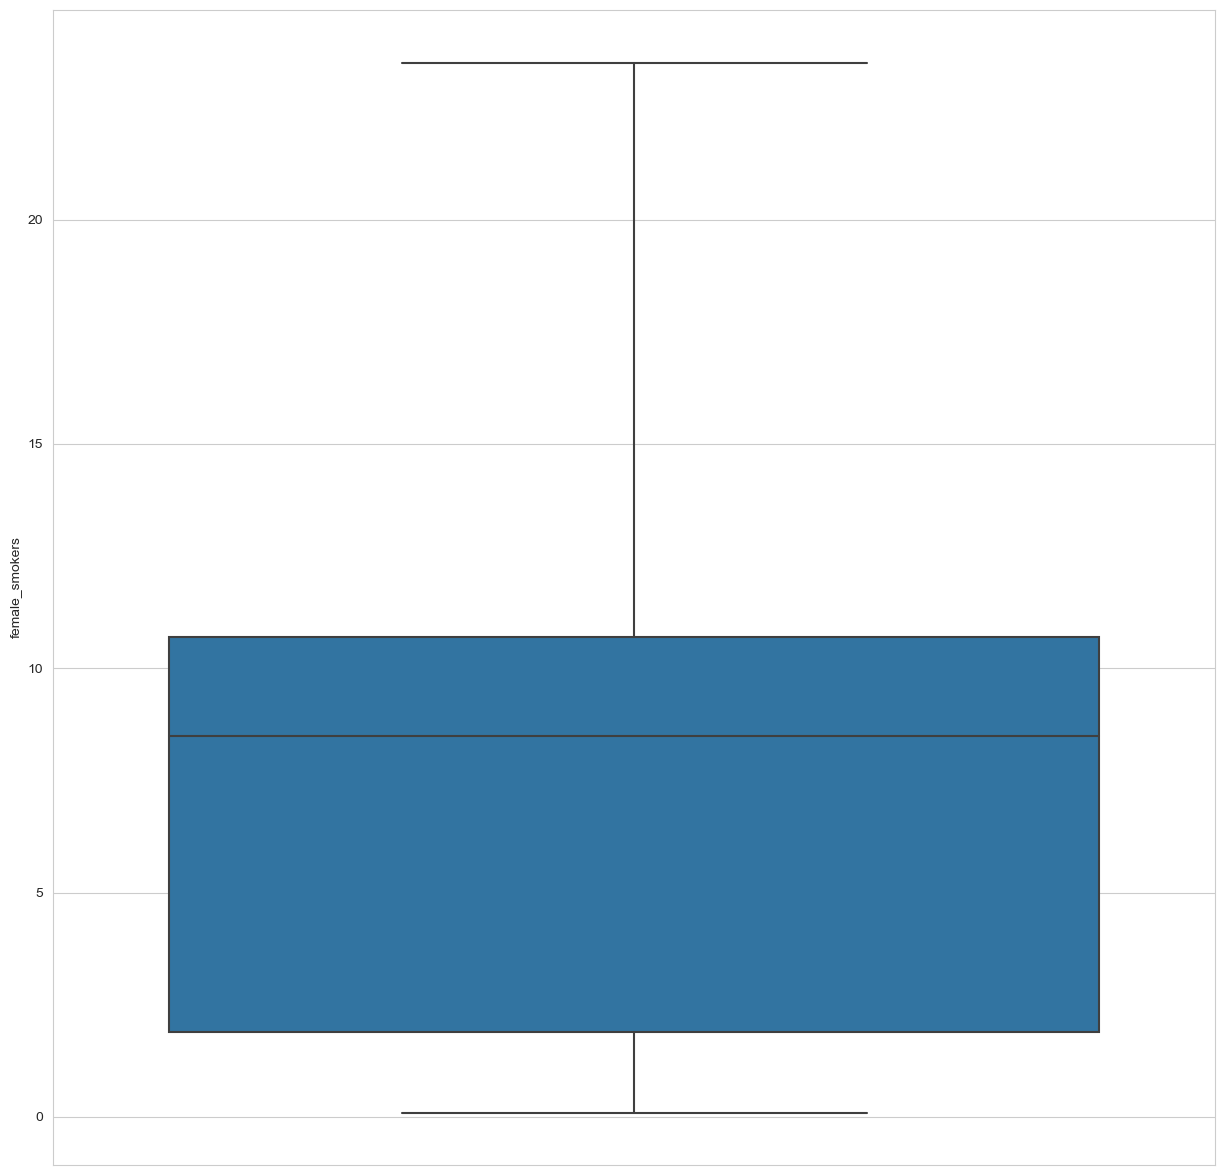

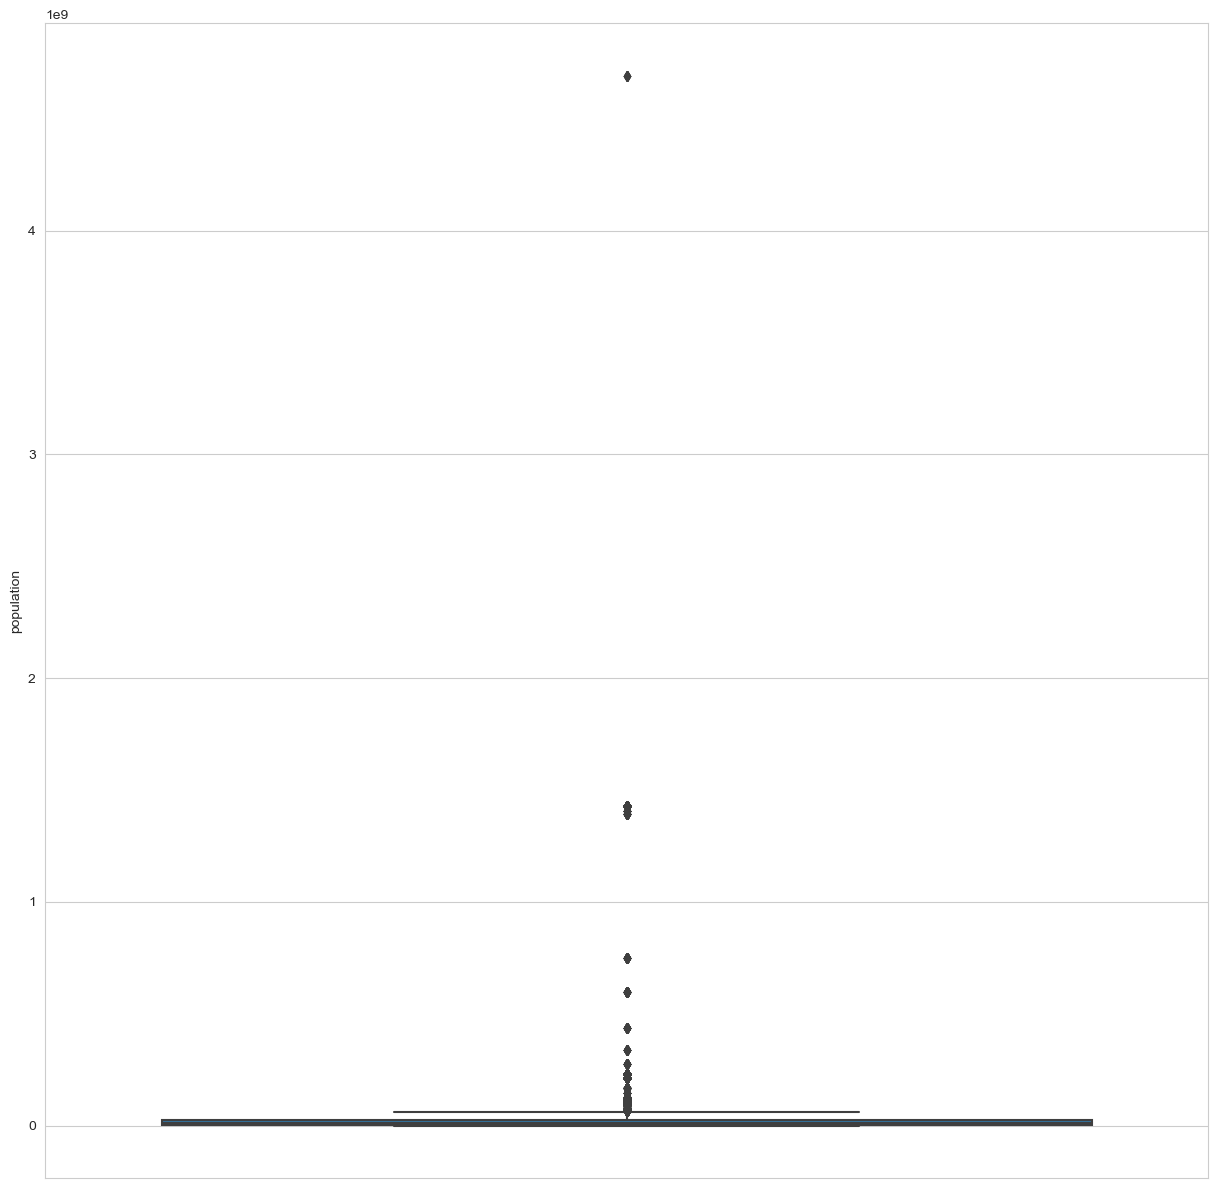

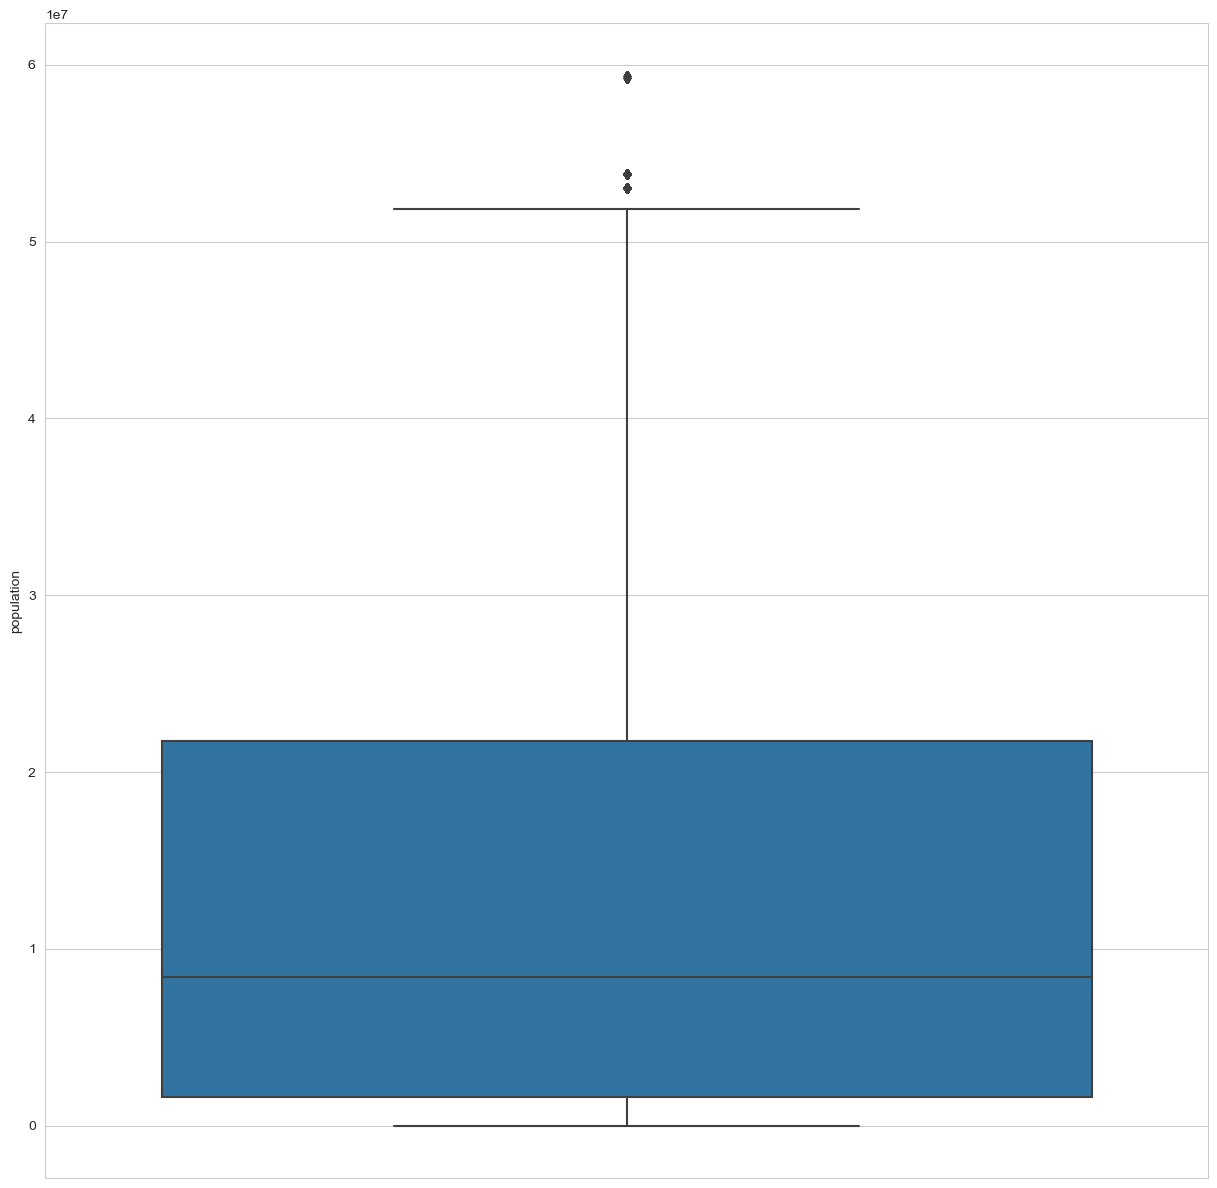

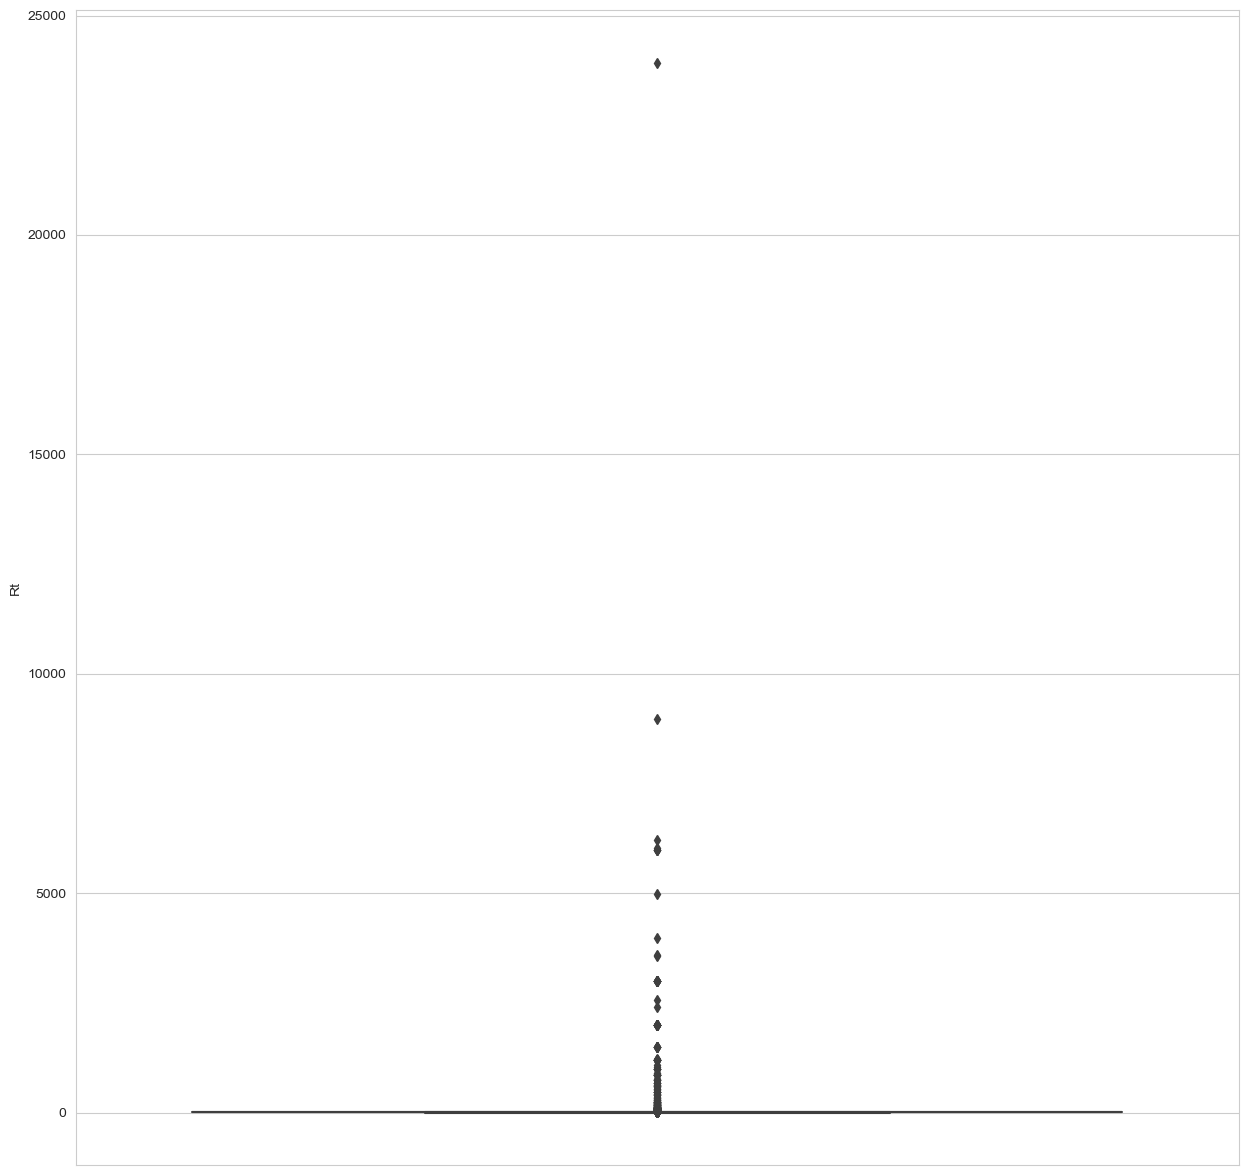

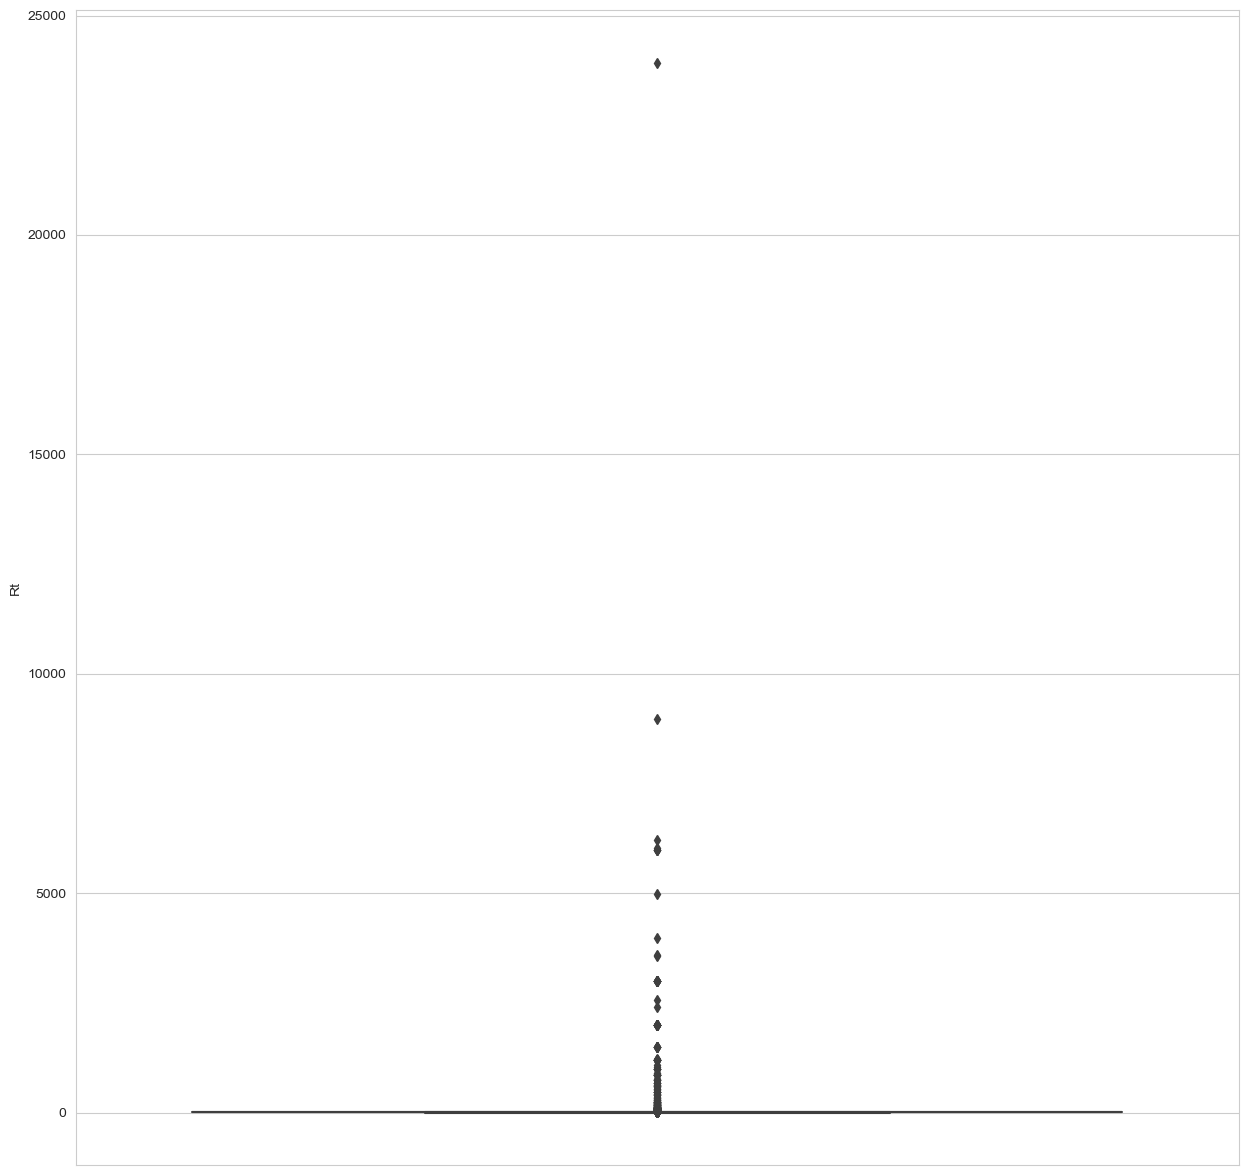

In [79]:
for column in df_copy.drop(columns = ['continent', 'location','date']).columns:
    upper,lower = delete_of_abnormal(df_copy[column])
    plt.figure(figsize=(15,15))
    sns.boxplot(y=column,data=df_copy)
    plt.show()
    df_copy = df_copy[~((df_copy[column]>upper) | (df_copy[column]<lower))]
    plt.figure(figsize=(15,15))
    sns.boxplot(y=column,data=df_copy)

Кодируем данные для дальнейшего использования

In [62]:
from sklearn import preprocessing
def encode(ini_df):
    results = ini_df.copy()
    encoders = {}
    for column in results.columns:
        if results.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            results[column] = encoders[column].fit_transform(results[column])
    return results,encoders
encoded_data,encoders=encode(df_copy)
encoded_data

In [80]:
encoded_data,encoders=encode(df_copy)
encoded_data

continent  location  date  total_cases  new_cases  new_deaths  \
27              1         0    57         40.0        6.0         1.0   
28              1         0    58         42.0        2.0         0.0   
29              1         0    59         74.0       32.0         0.0   
30              1         0    60         80.0        6.0         1.0   
31              1         0    61         91.0       11.0         0.0   
...           ...       ...   ...          ...        ...         ...   
211193          0       168   994     257893.0       66.0         1.0   
211194          0       168   995     257893.0        0.0         0.0   
211195          0       168   996     257893.0        0.0         0.0   
211196          0       168   997     257893.0        0.0         0.0   
211197          0       168   998     257893.0        0.0         0.0   

        total_cases_per_million  total_deaths_per_million  \
27                        0.998                     0.025   
28                        1.047                     0.025   
29                        1.845                     0.025   
30                        1.995                     0.050   
31                        2.269                     0.050   
...                         ...                       ...   
211193                16124.839                   350.517   
211194                16124.839                   350.517   
211195                16124.839                   350.517   
211196                16124.839                   350.517   
211197                16124.839                   350.517   

        new_vaccinations_smoothed  new_vaccinations_smoothed_per_million  \
27                  199034.837933                            2527.858274   
28                  199034.837933                            2527.858274   
29                  199034.837933                            2527.858274   
30                  199034.837933                            2527.858274   
31                  199034.837933                            2527.858274   
...                           ...                                    ...   
211193              199034.837933                            2527.858274   
211194              199034.837933                            2527.858274   
211195              199034.837933                            2527.858274   
211196              199034.837933                            2527.858274   
211197              199034.837933                            2527.858274   

        new_people_vaccinated_smoothed_per_hundred  stringency_index  \
27                                        0.104868         41.670000   
28                                        0.104868         50.930000   
29                                        0.104868         59.260000   
30                                        0.104868         59.260000   
31                                        0.104868         59.260000   
...                                            ...               ...   
211193                                    0.104868         47.798731   
211194                                    0.104868         47.798731   
211195                                    0.104868         47.798731   
211196                                    0.104868         47.798731   
211197                                    0.104868         47.798731   

        median_age  female_smokers  population          Rt  
27            18.6       10.706981  40099462.0    0.002002  
28            18.6       10.706981  40099462.0    0.001000  
29            18.6       10.706981  40099462.0  332.421017  
30            18.6       10.706981  40099462.0  119.651566  
31            18.6       10.706981  40099462.0  130.273441  
...            ...             ...         ...         ...  
211193        19.6        1.600000  15993524.0    1.205128  
211194        19.6        1.600000  15993524.0    1.505263  
211195        19.6        1.600000  15993524.0    2.606061  
211196    

<AxesSubplot:>

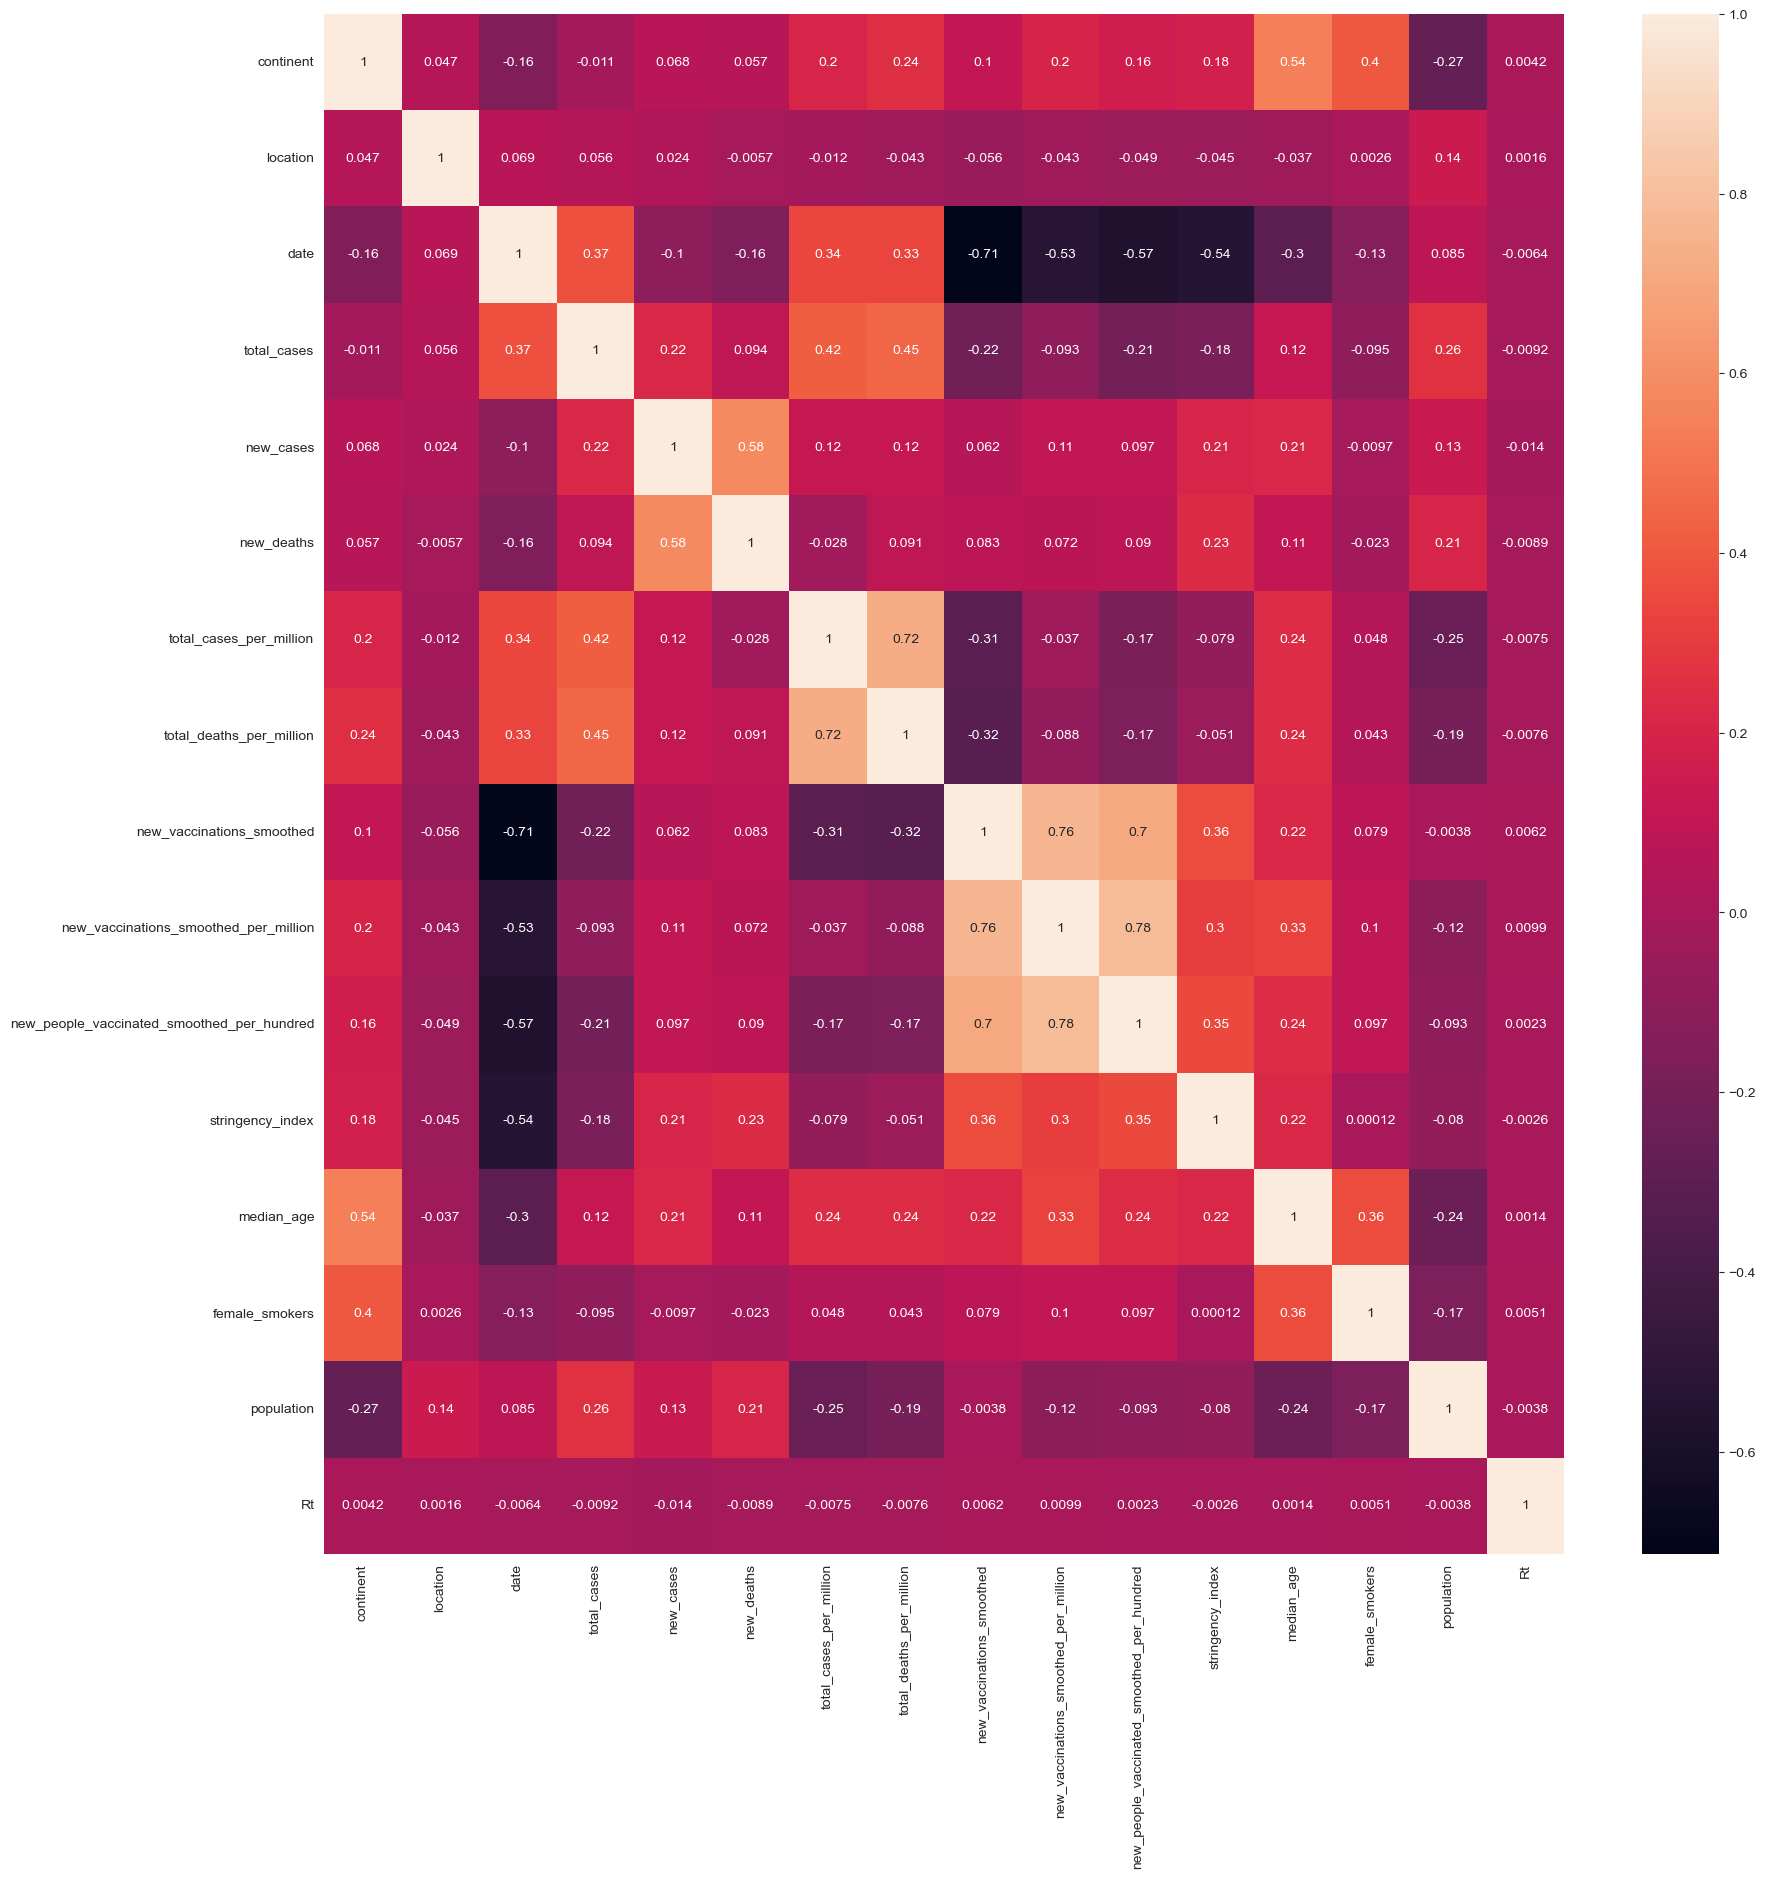

In [81]:
plt.figure(figsize = (20,20))
sns.heatmap(encoded_data.corr(),annot = True)

Нормализуем дату

In [65]:
def norm(x):
    x_std = x.copy(deep=True)
    for column in encoded_data.drop(columns = ['location','continent','date']):
       x_std[column] = (x_std[column]-x_std[column].min())/(x_std[column].max()-x_std[column].min())
    return x_std

In [66]:
encoded_data = norm(encoded_data)

In [67]:
encoded_data

continent  location  date   total_cases  new_cases  new_deaths  \
0               1         0    54  1.702918e-08   0.000003    0.009890   
1               1         0    55  1.702918e-08   0.000000    0.009890   
2               1         0    56  1.702918e-08   0.000000    0.009890   
3               1         0    57  1.702918e-08   0.000000    0.009890   
4               1         0    58  1.702918e-08   0.000000    0.009890   
...           ...       ...   ...           ...        ...         ...   
211193          0       240  1019  1.097922e-03   0.000036    0.000144   
211194          0       240  1020  1.097922e-03   0.000000    0.000000   
211195          0       240  1021  1.097922e-03   0.000000    0.000000   
211196          0       240  1022  1.097922e-03   0.000000    0.000000   
211197          0       240  1023  1.097922e-03   0.000000    0.000000   

        total_cases_per_million  total_deaths_per_million  \
0                  1.863247e-07                  0.107546   
1                  1.863247e-07                  0.107546   
2                  1.863247e-07                  0.107546   
3                  1.863247e-07                  0.107546   
4                  1.863247e-07                  0.107546   
...                         ...                       ...   
211193             2.422948e-02                  0.054491   
211194             2.422948e-02                  0.054491   
211195             2.422948e-02                  0.054491   
211196             2.422948e-02                  0.054491   
211197             2.422948e-02                  0.054491   

        new_vaccinations_smoothed  new_vaccinations_smoothed_per_million  \
0                        0.005881                               0.021448   
1                        0.005881                               0.021448   
2                        0.005881                               0.021448   
3                        0.005881                               0.021448   
4                        0.005881                               0.021448   
...                           ...                                    ...   
211193                   0.005881                               0.021448   
211194                   0.005881                               0.021448   
211195                   0.005881                               0.021448   
211196                   0.005881                               0.021448   
211197                   0.005881                               0.021448   

        new_people_vaccinated_smoothed_per_hundred  stringency_index  \
0                                         0.008898          0.083300   
1                                         0.008898          0.083300   
2                                         0.008898          0.083300   
3                                         0.008898          0.083300   
4                                         0.008898          0.083300   
...                                            ...               ...   
211193                                    0.008898          0.477987   
211194                                    0.008898          0.477987   
211195                                    0.008898          0.477987   
211196                                    0.008898          0.477987   
211197                                    0.008898          0.477987   

        median_age  female_smokers  population        Rt  
0         0.105740        0.241617    0.008544  0.000000  
1         0.105740        0.241617    0.008544  0.000000  
2         0.105740        0.241617    0.008544  0.000000  
3         0.105740        0.241617    0.008544  0.000000  
4         0.105740        0.241617    0.008544  0.000000  
...            ...             ...         ...       ...  
211193    0.135952        0.034169    0.003408  0.000001  
211194    0.135952        0.034169    0.003408  0.000002  
211195    0.135952        0.034169    0.003408  0.000003  
211196    0.135952

Удаляем все бесконечные и nan значения и сбрасываем индексы

In [87]:
encoded_data = encoded_data[np.isfinite(encoded_data).all(1)]

In [88]:
encoded_data.reset_index(drop = True,inplace = True)

In [89]:
encoded_data.shape

(68524, 16)

In [90]:
#for column in encoded_data.drop(columns = ['location','continent','date']):
   # encoded_data[column] = np.round(encoded_data[column],decimals = 8) 

Начинаем потихоньку подводить данные к кластеризации, попытаемся построить график оставшихся даных по точкам в пространстве

Для начала снижаем количество колонок для того чтобы построить точки в двухмерном пространстве, метод PCA (Principal Component Analysis) - метод главных компонент, который поможет снизить размерность наших данных без их сильной потери 

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(encoded_data.drop(columns = ['location','continent','date']))
pca_2d = pca.transform(encoded_data.drop(columns = ['location','continent','date']))
df_pca_2d = pd.DataFrame(pca_2d, columns=(['x', 'y']))

In [92]:
df_pca_2d

x              y
0      2.635573e+07 -164024.122304
1      2.635573e+07 -164022.164816
2      2.635573e+07 -163990.821326
3      2.635573e+07 -163984.949599
4      2.635573e+07 -163974.175693
...             ...            ...
68519  2.250689e+06  160733.254236
68520  2.250689e+06  160733.239135
68521  2.250689e+06  160733.239127
68522  2.250689e+06  160733.239138
68523  2.250689e+06  160733.239138

[68524 rows x 2 columns]

In [93]:
encoded_data.shape

(68524, 16)

Дальше по подготовленным данным строим график в котором видно как предполагаемые кластеры опасности могут быть расположены в группах слева на право

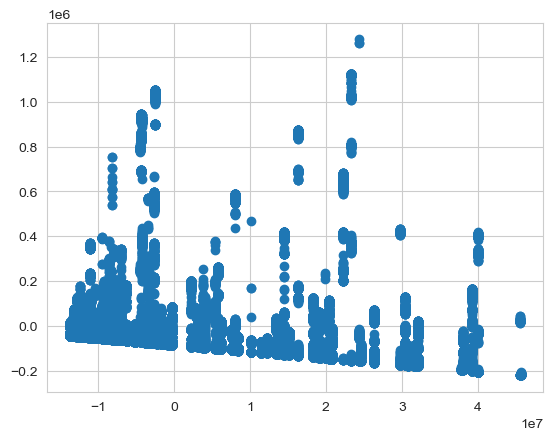

In [94]:
plt.scatter(df_pca_2d.iloc[:, 0], df_pca_2d.iloc[:, 1])
plt.show()

И для начала из методов кластеризации выберем несколько, и сравним, как они создадут нам 3 кластера опасности из наших данных и посмотрим как они определяются на графике

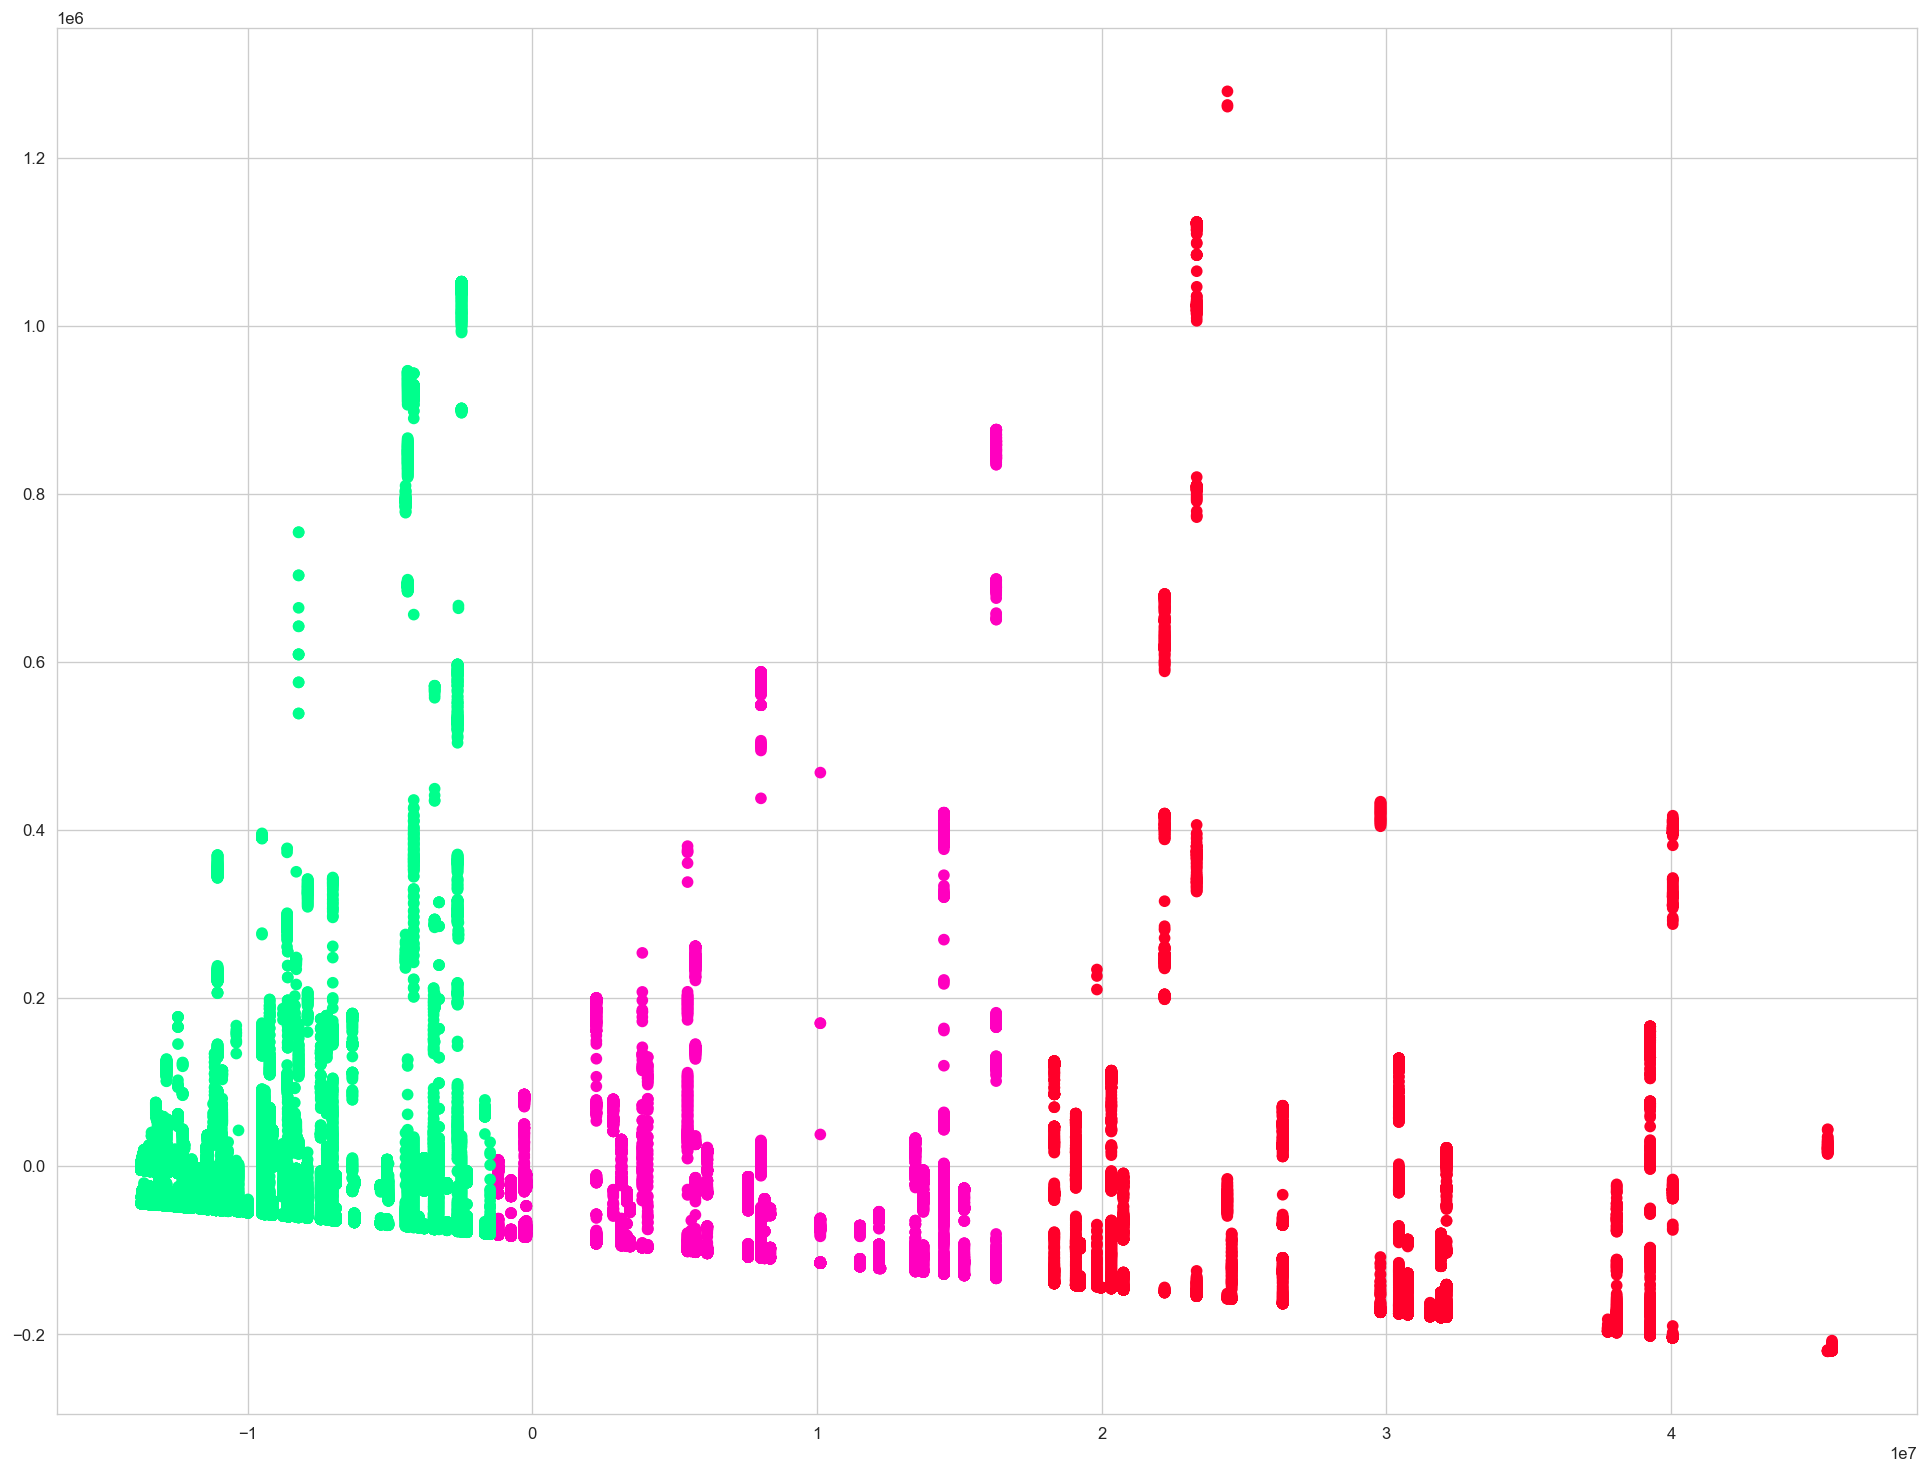

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_init = 300,n_clusters = 3)
kmeans.fit(encoded_data)

plt.figure(figsize=(20, 15), dpi=120)
plt.scatter(df_pca_2d.iloc[:, 0], df_pca_2d.iloc[:, 1], c = kmeans.labels_,cmap='gist_rainbow')
plt.show()

In [100]:
from sklearn.cluster import OPTICS

op = OPTICS(min_samples = 10, eps = 15).fit(encoded_data)


plt.figure(figsize=(20, 15), dpi=120)
plt.scatter(df_pca_2d.iloc[:, 0], df_pca_2d.iloc[:, 1], c = op.labels_,cmap='gist_rainbow')
plt.show()

KeyboardInterrupt: 

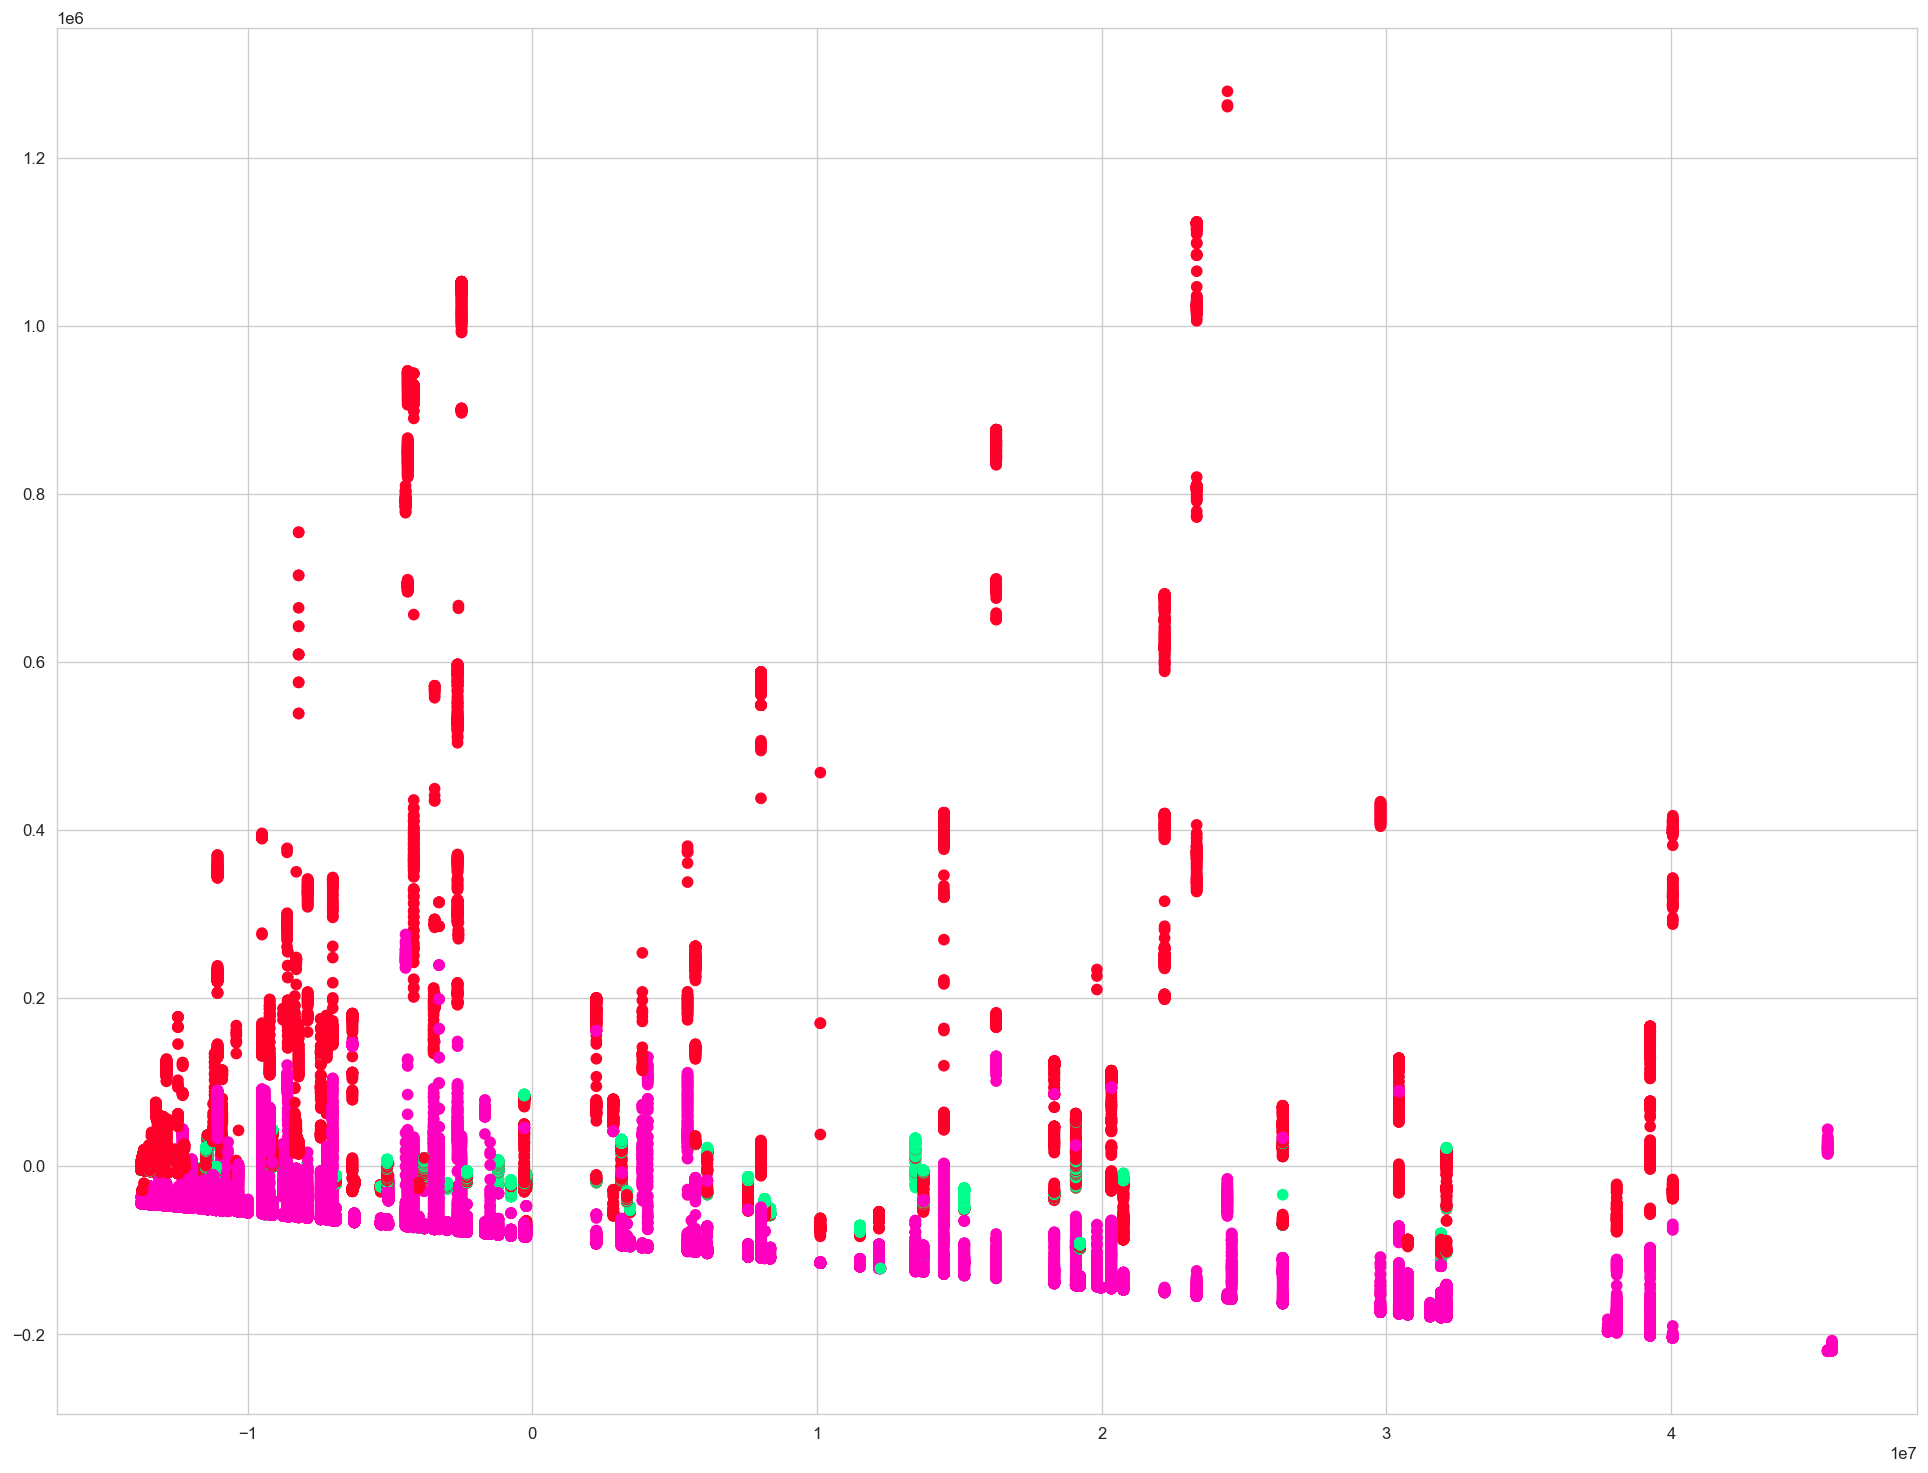

In [101]:
from sklearn.utils import resample
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0, n_init = 20).fit(encoded_data)
gm.predict(encoded_data)
    
plt.figure(figsize=(20, 15), dpi=120)
plt.scatter(df_pca_2d.iloc[:, 0], df_pca_2d.iloc[:, 1], c = gm.predict(encoded_data),cmap='gist_rainbow')
plt.show()

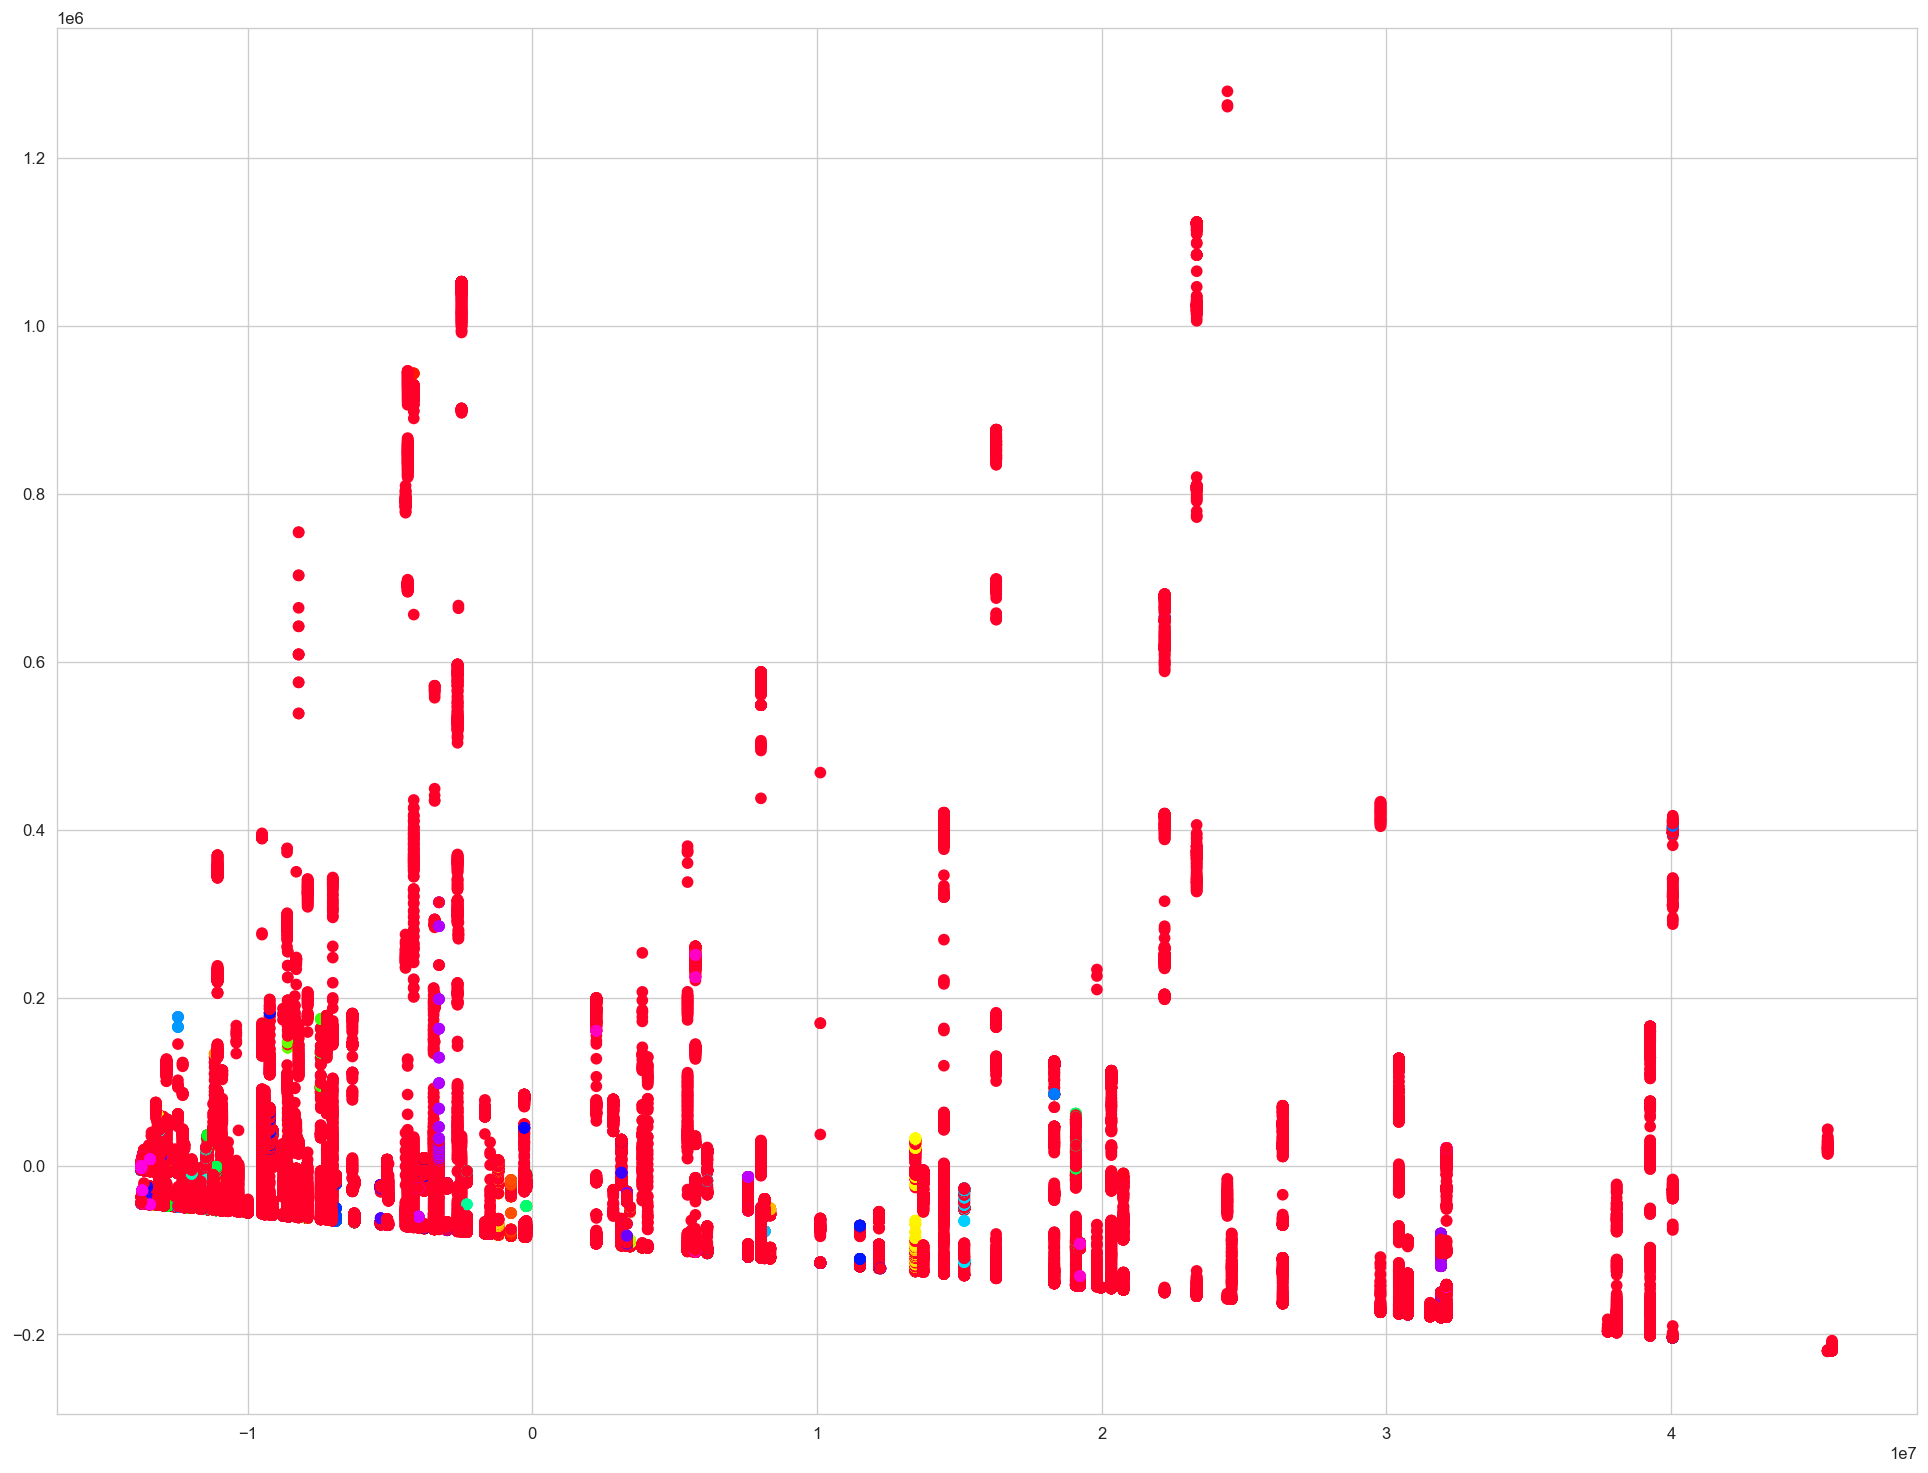

In [104]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 3, min_samples = 3)
dbscan.fit(encoded_data)
plt.figure(figsize=(20, 15), dpi=120)
plt.scatter(df_pca_2d.iloc[:, 0], df_pca_2d.iloc[:, 1], c = dbscan.labels_,cmap='gist_rainbow')
plt.show()

In [97]:
#sns.set_style("whitegrid")
#plt.figure(figsize=(12,8))
#plt.title("Total cases of covid19", fontsize=16)
#plt.ylabel("Cases", fontsize=14)
#plt.xlabel("Date", fontsize=14)
#plt.tight_layout()

#ax = sns.lineplot(x='date', y='total_cases', data=df_copy, hue = 'continent')
#ax.tick_params(labelright=True)

#plt.show()